In [3]:
!pip install pandas matplotlib wordcloud jupyter_contrib_nbextensions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 19.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.9/466.9 kB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 78.9 MB/s eta 0:00:00
  Created wheel for jupyter_contrib_nbextensions: filename=jupyter_contrib_nbextensions-0.7.0-py2.py3-none-any.whl size=23428768 sha256=9e26b11fb583b818e57036a23366a224a746fb01904762ec45a975f9b61c2148
  Stored in directory: /root/.cache/pip/wheels/ea/cc/7d/99ef154f984726b1201c0f72cfe9c9d7c5132c1a2ae4d8677f
  Created wheel for jupyter_contrib_core: filename=jupyter_contrib_core-0.4.2-py2.py3-none-any.whl size=17475 sha256=11cfcc5241e1b858e072a4655122138e86fad8512ccb30944f45592109c8d29c
  Stored in directory: /root/.cache/pip/wheels/a9/52/88/e0643cdfd68f0562087918c37dd583378648dbc3df68b907f7
Successfully built jupyter_contrib_nbextensions jupyter_contrib_core


In [4]:
%pip install googletrans==3.1.0a0

print("googletrans library installed.")

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.2 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=99afbc193e8ca11998bf23b3abff0f52a154ba0bd4f9d2f9113020b83e9cfbdf
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Succ

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import io
import base64
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px

from scipy.stats import chi2_contingency
from IPython.display import display, HTML
from wordcloud import WordCloud
from collections import Counter
from plotly.io import write_html
from googletrans import Translator
from plotly.subplots import make_subplots

In [6]:
# Load the dataset
df = pd.read_excel('Hill_Tracks_Dataset.xlsx')

# Display the first few rows to understand the structure
print(df.head())

# Check for missing values
missing_values = df.isnull().sum()
print('Missing values in each column:', missing_values)

# Check for duplicates
duplicates = df.duplicated().sum()
print('Number of duplicate rows:', duplicates)

# Check for inconsistencies in data types
print('Data types of each column:', df.dtypes)

# Check for unique values in categorical columns to identify inconsistencies
categorical_columns = ['SL No', 'Name', 'Age', 'District', 'Vehicle', 'Travel Time', 'Season', 'Indigenous Group']
for column in categorical_columns:
    print('Unique values in', column, ':', df[column].unique())

# Check for inconsistencies in numerical columns
print('Unique values in Maximum cost (per day):', df['Maximum cost (per day)'].unique())

   SL No              Name  Age      District Vehicle Travel Time  \
0      1      Sajid Rahman   26  Khagrachhari     Bus       Night   
1      2      Nusrat Begum   36  Khagrachhari     Bus       Night   
2      3  Tanima Chowdhury   25  Khagrachhari     Bus       Night   
3      4      Tanima Karim   36  Khagrachhari     Bus       Night   
4      5      Rifat Sarker   27  Khagrachhari     Bus       Night   

   How much time need to travel from Dhaka to Khagrachhari by bus?  Season  \
0                                       9 - 10 hours                Winter   
1                                      11 - 12 hours                Winter   
2                                        7 - 8 hours                Winter   
3                                        7 - 8 hours                 Rainy   
4                                        5 - 6 hours                Winter   

                                       Tourist Spots  \
0                                    Jhulonta Bridge   
1   

In [7]:
# Correct the column name and reattempt cleaning the dataset
# Check the column names to identify the correct name
print(df.columns)

# Correct the column name and fill missing values
placeholder = 'Unknown'
df['Traditional Foods'].fillna(placeholder, inplace=True)

# Display the cleaned dataset
print(df.head())

# Save the cleaned dataset to a new Excel file
df.to_excel('Cleaned_Tourist_Chatbot_Dataset.xlsx', index=False)
print('Cleaned dataset saved to Cleaned_Tourist_Chatbot_Dataset.xlsx')

Index(['SL No', 'Name', 'Age', 'District', 'Vehicle', 'Travel Time',
       ' How much time need to travel from Dhaka to Khagrachhari by bus?',
       'Season', 'Tourist Spots', 'Similar Tourist Spots', 'Hotel/Resort',
       'Restaurants', 'Traditional Foods', 'Indigenous Group',
       'Maximum cost (per day)'],
      dtype='object')
   SL No              Name  Age      District Vehicle Travel Time  \
0      1      Sajid Rahman   26  Khagrachhari     Bus       Night   
1      2      Nusrat Begum   36  Khagrachhari     Bus       Night   
2      3  Tanima Chowdhury   25  Khagrachhari     Bus       Night   
3      4      Tanima Karim   36  Khagrachhari     Bus       Night   
4      5      Rifat Sarker   27  Khagrachhari     Bus       Night   

   How much time need to travel from Dhaka to Khagrachhari by bus?  Season  \
0                                       9 - 10 hours                Winter   
1                                      11 - 12 hours                Winter   
2            

<ipython-input-7-737657c70bde>:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





Cleaned dataset saved to Cleaned_Tourist_Chatbot_Dataset.xlsx


In [8]:
# Load the cleaned dataset from 'Cleaned_Tourist_Chatbot_Dataset.xlsx'
cleaned_df = pd.read_excel('Hill_Tracks_Dataset.xlsx')
print('Cleaned dataset loaded successfully.')

Cleaned dataset loaded successfully.


In [9]:
# Load the Excel file
df = pd.read_excel('Cleaned_Tourist_Chatbot_Dataset.xlsx')

# Display column names
print("Column names in the dataset:")
print(df.columns.tolist())

# Display the first few rows to see the structure of the data
print("\
First few rows of the dataset:")
print(df.head())

Column names in the dataset:
['SL No', 'Name', 'Age', 'District', 'Vehicle', 'Travel Time', ' How much time need to travel from Dhaka to Khagrachhari by bus?', 'Season', 'Tourist Spots', 'Similar Tourist Spots', 'Hotel/Resort', 'Restaurants', 'Traditional Foods', 'Indigenous Group', 'Maximum cost (per day)']
First few rows of the dataset:
   SL No              Name  Age      District Vehicle Travel Time  \
0      1      Sajid Rahman   26  Khagrachhari     Bus       Night   
1      2      Nusrat Begum   36  Khagrachhari     Bus       Night   
2      3  Tanima Chowdhury   25  Khagrachhari     Bus       Night   
3      4      Tanima Karim   36  Khagrachhari     Bus       Night   
4      5      Rifat Sarker   27  Khagrachhari     Bus       Night   

   How much time need to travel from Dhaka to Khagrachhari by bus?  Season  \
0                                       9 - 10 hours                Winter   
1                                      11 - 12 hours                Winter   
2         

In [10]:
# Display the first few rows of the cleaned dataset
print(cleaned_df.head())

   SL No              Name  Age      District Vehicle Travel Time  \
0      1      Sajid Rahman   26  Khagrachhari     Bus       Night   
1      2      Nusrat Begum   36  Khagrachhari     Bus       Night   
2      3  Tanima Chowdhury   25  Khagrachhari     Bus       Night   
3      4      Tanima Karim   36  Khagrachhari     Bus       Night   
4      5      Rifat Sarker   27  Khagrachhari     Bus       Night   

   How much time need to travel from Dhaka to Khagrachhari by bus?  Season  \
0                                       9 - 10 hours                Winter   
1                                      11 - 12 hours                Winter   
2                                        7 - 8 hours                Winter   
3                                        7 - 8 hours                 Rainy   
4                                        5 - 6 hours                Winter   

                                       Tourist Spots  \
0                                    Jhulonta Bridge   
1   

In [11]:
# Count the frequency of visits to each district and calculate percentages
district_frequency = cleaned_df['District'].value_counts().reset_index()
district_frequency.columns = ['District', 'Visits']
total_visits = district_frequency['Visits'].sum()
district_frequency['Percentage'] = (district_frequency['Visits'] / total_visits * 100).round(2)

# Define colors for the bars
colors = ['#0077b6', '#f4a261', '#e76f51', '#2a9d8f']  # Aesthetic coastal palette

# Create a bar chart using Plotly
fig = go.Figure(data=[go.Bar(
    x=district_frequency['District'],
    y=district_frequency['Visits'],
    text=district_frequency['Percentage'].apply(lambda x: f'{x}%'),  # Adding text on bars
    marker_color=colors  # Distinct colors for each district
)])

fig.update_traces(texttemplate='%{text}', textposition='outside')

fig.update_layout(
    title='<b>জেলা অনুযায়ী ভ্রমণের সংখ্যা ও শতাংশ</b>',
    xaxis_title='<b>জেলা</b>',
    yaxis_title='<b>ভ্রমণের সংখ্যা</b>',
    font=dict(family="Arial, sans-serif", size=14, color="#333"),
    title_font=dict(size=18, color="#333", family="Arial, sans-serif"),
    plot_bgcolor='rgba(0,0,0,0)',  # Makes background transparent
    paper_bgcolor='rgba(0,0,0,0)',  # Also makes surrounding background transparent
)

# Save the plot as an HTML file
pio.write_html(fig, file='district_visits_chart.html', auto_open=False)
print("Bar chart saved as 'district_visits_chart.html'")

# Display the chart
fig.show()


Bar chart saved as 'district_visits_chart.html'


In [12]:
# Count the frequency of visits by Age Group
age_group_frequency = cleaned_df['Age'].value_counts().reset_index()
age_group_frequency.columns = ['Age', 'Visits']
total_visits_age = age_group_frequency['Visits'].sum()
age_group_frequency['Percentage'] = (age_group_frequency['Visits'] / total_visits_age * 100).round(2)

# Define colors for the bars (you can choose different color schemes)
colors_age = ['#219ebc', '#023047', '#ffb703', '#fb8500']  # Aesthetic palette

# Create a bar chart using Plotly
fig_age = go.Figure(data=[go.Bar(
    x=age_group_frequency['Age'],
    y=age_group_frequency['Visits'],
    text=age_group_frequency['Percentage'].apply(lambda x: f'{x}%'),
    marker_color=colors_age
)])

fig_age.update_traces(texttemplate='%{text}', textposition='outside')

fig_age.update_layout(
    title='<b>বয়স অনুযায়ী পর্যটকদের আগ্রহ</b>',
    xaxis_title='<b>বয়স গ্রুপ</b>',
    yaxis_title='<b>ভ্রমণের সংখ্যা</b>',
    font=dict(family="Arial, sans-serif", size=14, color="#333"),
    title_font=dict(size=18, color="#333", family="Arial, sans-serif"),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
)

# Save the plot as an HTML file
pio.write_html(fig_age, file='age_group_visits_chart.html', auto_open=False)
print("Bar chart for age groups saved as 'age_group_visits_chart.html'")

# Display the chart
fig_age.show()


Bar chart for age groups saved as 'age_group_visits_chart.html'


In [13]:
# Group by 'District' and 'Vehicle' to count occurrences
transportation_counts = df.groupby(['District', 'Vehicle']).size().reset_index(name='Counts')

# Find the most common mode of transportation for each district
most_common_transportation = transportation_counts.loc[transportation_counts.groupby('District')['Counts'].idxmax()]

# Display the result
print(most_common_transportation)

       District Vehicle  Counts
0     Bandarban     Bus     101
2  Khagrachhari     Bus     130
3     Rangamati     Bus     137
7        Sylhet   Train      70


In [14]:
# Use a color sequence with a wide range of distinct colors
color_sequence = px.colors.qualitative.Vivid

# Create a Plotly bar chart with different colors for each bar
fig = px.bar(most_common_transportation, x='District', y='Counts', color='Vehicle',
             title='Most Common Mode of Transportation by District',
             labels={'Counts': 'Number of Travelers'},
             text='Vehicle',
             color_discrete_sequence=color_sequence)

# Update layout for better visualization
fig.update_layout(xaxis_title='District', yaxis_title='Number of Travelers',
                  legend_title='Mode of Transportation')

# Show the plot
fig.show()
# Generate an explanation in Bangla with the specified formatting
html_explanation = '''
<ul style="font-family: Tahoma; font-size: 18px; color: blue;">
    <li>বান্দরবান জেলায় সবচেয়ে বেশি ব্যবহৃত যানবাহন হল বাস।</li>
    <li>খাগড়াছড়ি জেলায় সবচেয়ে বেশি ব্যবহৃত যানবাহন হল বাস।</li>
    <li>রাঙ্গামাটি জেলায় সবচেয়ে বেশি ব্যবহৃত যানবাহন হল বাস।</li>
    <li>সিলেট জেলায় সবচেয়ে বেশি ব্যবহৃত যানবাহন হল ট্রেন।</li>
</ul>
<h3 style="font-family: Tahoma; font-size: 18px; color: blue;">Significant Actionable Insight</h3>
<p style="font-family: Tahoma; font-size: 18px; color: blue;">বাস এবং ট্রেনের জন্য পর্যটকদের চাহিদা বাড়ানোর জন্য আরও উন্নত সেবা প্রদান করা যেতে পারে।</p>
'''

# Display the HTML explanation
from IPython.core.display import display, HTML
display(HTML(html_explanation))


In [15]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from IPython.display import HTML, display

# Sample DataFrame (Replace with your actual DataFrame)
# df = pd.DataFrame(...)  # Your dataset here

# Function to clean and extract travel time in hours
def clean_travel_time(time_str):
    """
    Function to clean and extract travel time in hours from a string.
    Handles ranges like '2-4 hours' and exact times like '3 hours' or '90 minutes'.
    """
    if isinstance(time_str, str):
        time_str = time_str.strip()
        # Handle time ranges like '2-4 hours'
        if '-' in time_str:
            try:
                start, end = map(lambda x: float(x.split()[0]), time_str.split('-'))
                return (start + end) / 2  # Return average if it's a range
            except ValueError:
                return np.nan  # In case of an invalid time format
        elif 'hours' in time_str:
            try:
                return float(time_str.split()[0])  # Extract the number of hours
            except ValueError:
                return np.nan  # In case of invalid format
        elif 'minute' in time_str:  # Handle cases like '90 minutes'
            try:
                minutes = float(time_str.split()[0])
                return minutes / 60  # Convert minutes to hours
            except ValueError:
                return np.nan
    elif isinstance(time_str, pd.Timestamp):  # Handle timestamp cases (if any)
        return np.nan
    return np.nan  # Default if no valid time format is found

# Load your dataset (Replace this with your actual data loading method)
# df = pd.read_csv('your_dataset.csv')  # Example for CSV file

# Clean column names by removing any extra spaces or special characters
df.columns = df.columns.str.strip()

# Check column names to find the exact one related to travel time
print("Columns in the dataset:", df.columns)

# Replace with the correct column name for travel time if necessary
# For example, if the column name is 'How much time need to travel from Dhaka to Khagrachhari by bus?'
df['Travel_Time_Hours'] = df['How much time need to travel from Dhaka to Khagrachhari by bus?'].apply(clean_travel_time)

# Filter the dataset to only include the four specific vehicles: Car, Bus, Train, and Air
vehicles_of_interest = ['Car', 'Bus', 'Train', 'Air']
df_filtered = df[df['Vehicle'].isin(vehicles_of_interest)]

# Group by 'Vehicle' and calculate the average travel time for the four vehicles
vehicle_travel_time = df_filtered.groupby('Vehicle')['Travel_Time_Hours'].mean().sort_values(ascending=False)

# Print the average travel time by vehicle
print("Average travel time by vehicle type:")
print(vehicle_travel_time)

# Save the cleaned dataframe to an Excel file
df.to_excel('Cleaned_Tourist_Chatbot_Dataset_with_travel_time.xlsx', index=False)
print("Cleaned dataset saved as 'Cleaned_Tourist_Chatbot_Dataset_with_travel_time.xlsx'")

# Create a bar chart using Plotly
fig = go.Figure(data=[go.Bar(
    x=vehicle_travel_time.index,
    y=vehicle_travel_time.values,
    marker_color=['#FFA07A', '#20B2AA', '#778899', '#9370DB']  # Distinct colors for each bar
)])

# Update layout for better visualization
fig.update_layout(
    title='<b>যানবাহন অনুযায়ী গড় ভ্রমণ সময়</b>',
    xaxis_title='<b>যানবাহন</b>',
    yaxis_title='<b>গড় ভ্রমণ সময় (ঘণ্টা)</b>',
    font=dict(family="Tahoma", size=14),
    plot_bgcolor='rgba(240, 240, 240, 1)',  # Light background color
    paper_bgcolor='rgba(240, 240, 240, 1)'  # Paper background color
)

# Save the plot as an HTML file
fig.write_html("vehicle_travel_time_chart.html")
print("Bar chart saved as 'vehicle_travel_time_chart.html'")

# Display the chart
fig.show()

# Create the HTML explanation in Bangla
html_explanation = """
<div style="font-family: Tahoma; font-size: 18px; color: blue;">
    <h2>যানবাহনের প্রভাব গণ্তব্যে পৌঁছানোর সময়ের উপর</h2>
    <ul>
        {summary}
    </ul>
    <h3>গুরুত্বপূর্ণ কার্যকর দিক</h3>
    <p>গাড়ি সাধারণত গড়ে সবচেয়ে বেশি সময় নেয়, এবং বিমান সবচেয়ে কম তবে খরচ তুলনামুলক বেশি। এই তথ্য থেকে ট্রেন ব্যবহারের উত্সাহ বাড়ানোর পাশাপাশি গাড়ির যাত্রায় কার্যকর উন্নয়ন আনার উপর গুরুত্বারোপ করা উচিত।</p>
</div>
"""

# Generate HTML summary for each vehicle dynamically
summary = "".join(f"<li>{vehicle}: গড় ভ্রমণ সময় {time:.2f} ঘণ্টা</li>" for vehicle, time in vehicle_travel_time.items())
html_explanation = html_explanation.format(summary=summary)

# Display the HTML explanation
display(HTML(html_explanation))


Columns in the dataset: Index(['SL No', 'Name', 'Age', 'District', 'Vehicle', 'Travel Time',
       'How much time need to travel from Dhaka to Khagrachhari by bus?',
       'Season', 'Tourist Spots', 'Similar Tourist Spots', 'Hotel/Resort',
       'Restaurants', 'Traditional Foods', 'Indigenous Group',
       'Maximum cost (per day)'],
      dtype='object')
Average travel time by vehicle type:
Vehicle
Car      10.500000
Bus       8.494514
Train     7.328571
Air       1.180000
Name: Travel_Time_Hours, dtype: float64
Cleaned dataset saved as 'Cleaned_Tourist_Chatbot_Dataset_with_travel_time.xlsx'
Bar chart saved as 'vehicle_travel_time_chart.html'


In [16]:
# Load the Excel file into a dataframe
df = pd.read_excel('Cleaned_Tourist_Chatbot_Dataset_with_travel_time.xlsx')

# Display the first few rows of the dataframe to understand its structure
print(df.head())

   SL No              Name  Age      District Vehicle Travel Time  \
0      1      Sajid Rahman   26  Khagrachhari     Bus       Night   
1      2      Nusrat Begum   36  Khagrachhari     Bus       Night   
2      3  Tanima Chowdhury   25  Khagrachhari     Bus       Night   
3      4      Tanima Karim   36  Khagrachhari     Bus       Night   
4      5      Rifat Sarker   27  Khagrachhari     Bus       Night   

  How much time need to travel from Dhaka to Khagrachhari by bus?  Season  \
0                                       9 - 10 hours               Winter   
1                                      11 - 12 hours               Winter   
2                                        7 - 8 hours               Winter   
3                                        7 - 8 hours                Rainy   
4                                        5 - 6 hours               Winter   

                                       Tourist Spots  \
0                                    Jhulonta Bridge   
1         

In [17]:
import plotly.express as px
import pandas as pd
from IPython.core.display import HTML, display

# Clean the Season column to ensure consistency
df['Season'] = df['Season'].str.strip().str.lower().str.title()

# Create a Plotly histogram
fig = px.histogram(df, x='Season', color='Vehicle', barmode='group',
                   title='মৌসুম এবং যানবাহনের মধ্যে সম্পর্ক',
                   labels={'Season': 'মৌসুম', 'Vehicle': 'যানবাহন'},
                   color_discrete_sequence=px.colors.qualitative.Plotly)

# Show the Plotly chart
fig.show()

# Function to generate Bangla explanation
def generate_bangla_explanation(df):
    total_trips = len(df)

    # Get the most common season and vehicle
    most_common_season = df['Season'].mode().iloc[0]  # Get the first mode (if there's a tie, it picks the first one)
    most_common_vehicle = df['Vehicle'].mode().iloc[0]  # Get the first mode (if there's a tie, it picks the first one)

    # Explanation for the chart
    explanation = f"""
    <div style="color: blue; font-size: 18px; font-family: Tahoma;">
    <h3>চার্টের ব্যাখ্যা:</h3>
    <ul>
        <li>মোট ভ্রমণের সংখ্যা: {total_trips}</li>
        <li>সবচেয়ে জনপ্রিয় মৌসুম: {most_common_season}</li>
        <li>সবচেয়ে ব্যবহৃত যানবাহন: {most_common_vehicle}</li>
        <li>শীতকালে বাসের ব্যবহার সবচেয়ে বেশি</li>
        <li>বর্ষা মৌসুমে ভ্রমণের সংখ্যা কম</li>
    </ul>

    <h3>সারসংক্ষেপ:</h3>
    <p>চার্ট থেকে দেখা যায় যে, শীতকাল সবচেয়ে জনপ্রিয় ভ্রমণের মৌসুম এবং বাস সবচেয়ে ব্যবহৃত যানবাহন। বর্ষা মৌসুমে ভ্রমণের সংখ্যা তুলনামূলকভাবে কম।</p>

    <h3>উল্লেখযোগ্য কার্যকর অন্তর্দৃষ্টি:</h3>
    <p>শীতকালে বাস সেবা বৃদ্ধি করা এবং বর্ষা মৌসুমে বিশেষ প্যাকেজ প্রস্তাব করা যেতে পারে যাতে পর্যটকদের সংখ্যা বাড়ানো যায়।</p>
    </div>
    """

    return explanation

# Generate and display the Bangla explanation
bangla_explanation = generate_bangla_explanation(df)
display(HTML(bangla_explanation))


In [18]:
# Create a contingency table
contingency_table = pd.crosstab(df['Season'], df['Vehicle'])

# Perform Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Data loaded and initial calculations completed.")
print(f"Contingency table shape: {contingency_table.shape}")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")

Data loaded and initial calculations completed.
Contingency table shape: (5, 4)
Chi-square statistic: 112.1093
p-value: 0.0000


In [19]:
# Create a heatmap using Plotly
fig = px.imshow(contingency_table,
                labels=dict(x="\u09af\u09be\u09a8\u09ac\u09be\u09b9\u09a8", y="\u09ae\u09cc\u09b8\u09c1\u09ae", color="\u09b8\u0982\u0996\u09cd\u09af\u09be"),
                x=contingency_table.columns,
                y=contingency_table.index,
                color_continuous_scale="Viridis",
                title="\u09ae\u09cc\u09b8\u09c1\u09ae \u098f\u09ac\u0982 \u09af\u09be\u09a8\u09ac\u09be\u09b9\u09a8\u09c7\u09b0 \u09ae\u09a7\u09cd\u09af\u09c7 \u09b8\u09ae\u09cd\u09aa\u09b0\u09cd\u0995")

fig.update_layout(
    xaxis_title="\u09af\u09be\u09a8\u09ac\u09be\u09b9\u09a8",
    yaxis_title="\u09ae\u09cc\u09b8\u09c1\u09ae",
)

# Add text annotations
for i in range(len(contingency_table.index)):
    for j in range(len(contingency_table.columns)):
        fig.add_annotation(
            x=contingency_table.columns[j],
            y=contingency_table.index[i],
            text=str(contingency_table.iloc[i, j]),
            showarrow=False,
            font=dict(color="white" if contingency_table.iloc[i, j] > contingency_table.values.max() / 2 else "black")
        )

fig.show()

# Function to generate Bangla explanation
def generate_bangla_explanation(df, contingency_table, chi2, p_value):
    total_trips = len(df)
    most_common_season = df['Season'].mode()[0]
    most_common_vehicle = df['Vehicle'].mode()[0]

    # Calculate percentages
    season_percentages = (df['Season'].value_counts() / total_trips * 100).round(2)
    vehicle_percentages = (df['Vehicle'].value_counts() / total_trips * 100).round(2)

    p_value_comment = ('p-\u09ae\u09be\u09a8 0.05 \u098f\u09b0 \u099a\u09c7\u09af\u09bc\u09c7 \u0995\u09ae, \u09af\u09be \u09b8\u09c2\u099a\u09bf\u09a4 \u0995\u09b0\u09c7 \u09af\u09c7 \u09ae\u09cc\u09b8\u09c1\u09ae \u098f\u09ac\u0982 \u09af\u09be\u09a8\u09ac\u09be\u09b9\u09a8 \u09a8\u09bf\u09b0\u09cd\u09ac\u09be\u099a\u09a8\u09c7\u09b0 \u09ae\u09a7\u09cd\u09af\u09c7 \u098f\u0995\u099f\u09bf \u0989\u09b2\u09cd\u09b2\u09c7\u0996\u09af\u09cb\u0997\u09cd\u09af \u09b8\u09ae\u09cd\u09aa\u09b0\u09cd\u0995 \u09b0\u09af\u09bc\u09c7\u099b\u09c7\u0964'
                     if p_value < 0.05
                     else 'p-\u09ae\u09be\u09a8 0.05 \u098f\u09b0 \u099a\u09c7\u09af\u09bc\u09c7 \u09ac\u09c7\u09b6\u09bf, \u09af\u09be \u09b8\u09c2\u099a\u09bf\u09a4 \u0995\u09b0\u09c7 \u09af\u09c7 \u09ae\u09cc\u09b8\u09c1\u09ae \u098f\u09ac\u0982 \u09af\u09be\u09a8\u09ac\u09be\u09b9\u09a8 \u09a8\u09bf\u09b0\u09cd\u09ac\u09be\u099a\u09a8\u09c7\u09b0 \u09ae\u09a7\u09cd\u09af\u09c7 \u0995\u09cb\u09a8 \u0989\u09b2\u09cd\u09b2\u09c7\u0996\u09af\u09cb\u0997\u09cd\u09af \u09b8\u09ae\u09cd\u09aa\u09b0\u09cd\u0995 \u09a8\u09c7\u0987\u0964')

    explanation = (
        "<div style='color: blue; font-size: 18px; font-family: Tahoma;'>"
        "<h3>\u099a\u09be\u09b0\u09cd\u099f\u09c7\u09b0 \u09ac\u09cd\u09af\u09be\u0996\u09cd\u09af\u09be:</h3>"
        f"<ul>"
        f"<li>\u09ae\u09cb\u099f \u09ad\u09cd\u09b0\u09ae\u09a3\u09c7\u09b0 \u09b8\u0982\u0996\u09cd\u09af\u09be: {total_trips}</li>"
        f"<li>\u09b8\u09ac\u099a\u09c7\u09af\u09bc\u09c7 \u099c\u09a8\u09aa\u09cd\u09b0\u09bf\u09af\u09bc \u09ae\u09cc\u09b8\u09c1\u09ae: {most_common_season} ({season_percentages[most_common_season]}%)</li>"
        f"<li>\u09b8\u09ac\u099a\u09c7\u09af\u09bc\u09c7 \u09ac\u09cd\u09af\u09ac\u09b9\u09c3\u09a4 \u09af\u09be\u09a8\u09ac\u09be\u09b9\u09a8: {most_common_vehicle} ({vehicle_percentages[most_common_vehicle]}%)</li>"
        "<li>\u09ae\u09cc\u09b8\u09c1\u09ae \u0985\u09a8\u09c1\u09af\u09be\u09af\u09bc\u09c0 \u09ad\u09cd\u09b0\u09ae\u09a3\u09c7\u09b0 \u09ac\u09bf\u09ad\u09be\u099c\u09a8:"
        "<ul>"
        f"{''.join([f'<li>{season}: {percentage}%</li>' for season, percentage in season_percentages.items()])}"
        "</ul>"
        "</li>"
        "<li>\u09af\u09be\u09a8\u09ac\u09be\u09b9\u09a8 \u0985\u09a8\u09c1\u09af\u09be\u09af\u09bc\u09c0 \u09ad\u09cd\u09b0\u09ae\u09a3\u09c7\u09b0 \u09ac\u09bf\u09ad\u09be\u099c\u09a8:"
        "<ul>"
        f"{''.join([f'<li>{vehicle}: {percentage}%</li>' for vehicle, percentage in vehicle_percentages.items()])}"
        "</ul>"
        "</li>"
        "</ul>"
        "<h3>\u09aa\u09b0\u09bf\u09b8\u0982\u0996\u09cd\u09af\u09be\u09a8\u0997\u09a4 \u09ac\u09bf\u09b6\u09cd\u09b2\u09c7\u09b7\u09a3:</h3>"
        "<p>\u0995\u09be\u0987-\u09b8\u09cd\u0995\u09cb\u09af\u09bc\u09be\u09b0 \u09aa\u09b0\u09c0\u0995\u09cd\u09b7\u09be\u09b0 \u09ab\u09b2\u09be\u09ab\u09b2:</p>"
        "<ul>"
        f"<li>\u0995\u09be\u0987-\u09b8\u09cd\u0995\u09cb\u09af\u09bc\u09be\u09b0 \u09ae\u09be\u09a8: {chi2:.2f}</li>"
        f"<li>p-\u09ae\u09be\u09a8: {p_value:.4f}</li>"
        "</ul>"
        f"<p>{p_value_comment}</p>"
        "<h3>\u09b8\u09be\u09b0\u09b8\u0982\u0995\u09cd\u09b7\u09c7\u09aa:</h3>"
        f"<p>\u09ac\u09bf\u09b6\u09cd\u09b2\u09c7\u09b7\u09a3 \u09a5\u09c7\u0995\u09c7 \u09a6\u09c7\u0996\u09be \u09af\u09be\u09af\u09bc \u09af\u09c7, {most_common_season} \u09ae\u09cc\u09b8\u09c1\u09ae\u09c7 \u09ad\u09cd\u09b0\u09ae\u09a3\u09c7\u09b0 \u09b8\u0982\u0996\u09cd\u09af\u09be \u09b8\u09ac\u099a\u09c7\u09af\u09bc\u09c7 \u09ac\u09c7\u09b6\u09bf \u098f\u09ac\u0982 {most_common_vehicle} \u09b8\u09ac\u099a\u09c7\u09af\u09bc\u09c7 \u099c\u09a8\u09cd\u09af \u099f\u09be\u09b0\u09cd\u0997\u09c7\u099f\u09c7\u09a1 \u09ae\u09be\u09b0\u09cd\u0995\u09c7\u099f\u09bf\u0982 \u0995\u09cc\u09b6\u09b2 \u0997\u09cd\u09b0\u09b9\u09a3 \u0995\u09b0\u09be \u09af\u09c7\u09a4\u09c7 \u09aa\u09be\u09b0\u09c7\u0964</p>"
        "</div>"
    )
    return explanation

# Generate and display the explanation
bangla_explanation = generate_bangla_explanation(df, contingency_table, chi2, p_value)
display(HTML(bangla_explanation))

# Save the plot as an HTML file
fig.write_html("season_vehicle_correlation.html")
print("The interactive plot has been saved as 'season_vehicle_correlation.html'")


The interactive plot has been saved as 'season_vehicle_correlation.html'


In [20]:
# Load the dataset
df = pd.read_excel('Cleaned_Tourist_Chatbot_Dataset_with_travel_time.xlsx')

# Pre-process the data: split 'Tourist spots' where multiple spots might be listed in the same string
df['Tourist spots'] = df['Tourist Spots'].str.split(';')
df = df.explode('Tourist spots')

# Count the frequency of each tourist spot per district
spot_frequency = df.groupby(['District', 'Tourist spots']).size().reset_index(name='Visits')

# Determine the most visited tourist spot in each district
most_visited_spots = spot_frequency.loc[spot_frequency.groupby('District')['Visits'].idxmax()]

# Define a list of eye-soothing colors
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0','#ffb3e6', '#c4e17f', '#f7c6c7', '#f7b7a3', '#ffcc00', '#6666ff']

# Create a bar chart using Plotly
fig = go.Figure()

# Track color assignment to ensure unique colors
color_index = 0

# Adding each district's most visited spot to the chart
for _, row in most_visited_spots.iterrows():
    fig.add_trace(go.Bar(
        x=[row['District']],
        y=[row['Visits']],
        name=row['Tourist spots'],
        marker=dict(color=colors[color_index % len(colors)])  # Cycle through colors list
    ))
    color_index += 1

fig.update_layout(
    title='<b>প্রতিটি জেলায় সর্বাধিক পরিদর্শিত পর্যটন স্থান</b>',
    xaxis_title='<b>জেলা</b>',
    yaxis_title='<b>ভ্রমণের সংখ্যা</b>',
    font=dict(family="Tahoma", size=14),
    plot_bgcolor='rgba(240, 240, 240, 1)',
    paper_bgcolor='rgba(240, 240, 240, 1)',
    barmode='group'
)

# Save the plot as an HTML file
write_html(fig, "most_visited_tourist_spots_by_district.html")
print("Bar chart saved as 'most_visited_tourist_spots_by_district.html'")

# Display the chart
fig.show()

# Create the HTML explanation in Bangla
html_explanation = """
<div style="font-family: Tahoma; font-size: 18px; color: blue;">
    <h2>জেলা অনুযায়ী পরিদর্শনের হার বিশ্লেষণ</h2>
    <ul>
        {summary}
    </ul>
    <h3>গুরুত্বপূর্ণ কার্যকর দিক</h3>
    <p>যে সকল জেলাগুলির পর্যটন স্থানগুলি অত্যধিক পরিদর্শিত হয় সেখানে পর্যটক সুবিধা ও পরিকাঠামো বৃদ্ধি প্রয়োজন। এই স্থানগুলির পরিচর্যা এবং পরিকাঠামো উন্নয়ন পর্যটন আয় বাড়াতে সহায়ক হবে।</p>
</div>
"""

# Generate HTML summary for each district dynamically
summary = "".join(f"<li>{row['District']}: সর্বাধিক পরিদর্শিত স্থান - {row['Tourist spots']} (ভ্রমণ {row['Visits']} বার)</li>"
                  for _, row in most_visited_spots.iterrows())
html_explanation = html_explanation.format(summary=summary)

# Display the HTML explanation
from IPython.display import HTML
display(HTML(html_explanation))


Bar chart saved as 'most_visited_tourist_spots_by_district.html'


In [21]:
# Load the dataset
file_path = 'Cleaned_Tourist_Chatbot_Dataset_with_travel_time.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows of the dataframe to understand its structure
print(df.head())

   SL No              Name  Age      District Vehicle Travel Time  \
0      1      Sajid Rahman   26  Khagrachhari     Bus       Night   
1      2      Nusrat Begum   36  Khagrachhari     Bus       Night   
2      3  Tanima Chowdhury   25  Khagrachhari     Bus       Night   
3      4      Tanima Karim   36  Khagrachhari     Bus       Night   
4      5      Rifat Sarker   27  Khagrachhari     Bus       Night   

  How much time need to travel from Dhaka to Khagrachhari by bus?  Season  \
0                                       9 - 10 hours               Winter   
1                                      11 - 12 hours               Winter   
2                                        7 - 8 hours               Winter   
3                                        7 - 8 hours                Rainy   
4                                        5 - 6 hours               Winter   

                                       Tourist Spots  \
0                                    Jhulonta Bridge   
1         

In [22]:
# Analyze the dataset to find the most common traditional foods in each district
# Group by 'District' and 'Traditional Food' and count occurrences
food_counts = df.groupby(['District', 'Traditional Foods']).size().reset_index(name='Counts')

# Find the most common traditional food in each district
most_common_foods = food_counts.loc[food_counts.groupby('District')['Counts'].idxmax()]

print(most_common_foods)

        District Traditional Foods  Counts
0      Bandarban    Bamboo chicken      15
40  Khagrachhari    Bamboo chicken      48
55     Rangamati    Bamboo chicken      46
98        Sylhet           Satkora      32


In [23]:
# Create a Plotly bar chart to visualize the most common traditional foods by district
fig = px.bar(most_common_foods,
             x='District',
             y='Counts',
             color='Traditional Foods',
             title='Most Common Traditional Foods by District',
             labels={'Counts': 'Number of Occurrences', 'District': 'District'},
             color_discrete_sequence=px.colors.qualitative.Plotly)

fig.update_layout(xaxis_title='District', yaxis_title='Number of Occurrences')

# Show the plot
fig.show()

# Function to generate Bangla explanation
def generate_bangla_explanation(most_common_foods):
    explanation = (
        "<div style='color: blue; font-size: 18px; font-family: Tahoma;'>"
        "<h3>চার্টের ব্যাখ্যা:</h3>"
        "<ul>"
    )
    for index, row in most_common_foods.iterrows():
        explanation += f"<li>{row['District']} জেলায় সবচেয়ে জনপ্রিয় ঐতিহ্যবাহী খাবার হল {row['Traditional Foods']} ({row['Counts']} বার উল্লেখিত হয়েছে)</li>"
    explanation += (
        "</ul>"
        "<h3>সারসংক্ষেপ:</h3>"
        "<p>এই বিশ্লেষণ থেকে দেখা যায় যে বিভিন্ন জেলায় ভ্রমণকারীরা বিভিন্ন ধরনের ঐতিহ্যবাহী খাবার উপভোগ করেন।</p>"
        "<h3>উল্লেখযোগ্য কার্যকর অন্তর্দৃষ্টি:</h3>"
        "<p>1. পর্যটন প্রচারনার জন্য স্থানীয় ঐতিহ্যবাহী খাবারগুলির উপর জোর দেওয়া যেতে পারে।</p>"
        "<p>2. স্থানীয় রেস্তোরাঁগুলি তাদের মেনুতে এই জনপ্রিয় খাবারগুলি অন্তর্ভুক্ত করতে পারে।</p>"
        "</div>"
    )
    return explanation

# Generate and display the explanation
bangla_explanation = generate_bangla_explanation(most_common_foods)
display(HTML(bangla_explanation))

# Save the plot as an HTML file
fig.write_html("traditional_foods_by_district.html")
print("The interactive plot has been saved as 'traditional_foods_by_district.html'")

The interactive plot has been saved as 'traditional_foods_by_district.html'


In [24]:
# Display column names
print("Column names in the dataset:")
print(df.columns.tolist())

# Display the first few rows to see the structure of the data
print("\
First few rows of the dataset:")
print(df.head())

Column names in the dataset:
['SL No', 'Name', 'Age', 'District', 'Vehicle', 'Travel Time', 'How much time need to travel from Dhaka to Khagrachhari by bus?', 'Season', 'Tourist Spots', 'Similar Tourist Spots', 'Hotel/Resort', 'Restaurants', 'Traditional Foods', 'Indigenous Group', 'Maximum cost (per day)', 'Travel_Time_Hours']
First few rows of the dataset:
   SL No              Name  Age      District Vehicle Travel Time  \
0      1      Sajid Rahman   26  Khagrachhari     Bus       Night   
1      2      Nusrat Begum   36  Khagrachhari     Bus       Night   
2      3  Tanima Chowdhury   25  Khagrachhari     Bus       Night   
3      4      Tanima Karim   36  Khagrachhari     Bus       Night   
4      5      Rifat Sarker   27  Khagrachhari     Bus       Night   

  How much time need to travel from Dhaka to Khagrachhari by bus?  Season  \
0                                       9 - 10 hours               Winter   
1                                      11 - 12 hours               Win

In [25]:
# Clean and prepare the data
def extract_hours(time_str):
    if isinstance(time_str, str) and '-' in time_str:
        return float(time_str.split('-')[0].strip().split()[0])
    return np.nan

def extract_cost(cost_str):
    if isinstance(cost_str, str) and '-' in cost_str:
        return float(cost_str.split('-')[0].strip().split()[0])
    return np.nan

df['Clean Travel Hours'] = df['How much time need to travel from Dhaka to Khagrachhari by bus?'].apply(extract_hours)
df['Maximum Cost Per Day'] = df['Maximum cost (per day)'].apply(extract_cost)

# Display the first few rows of the cleaned data
print(df[['District', 'Clean Travel Hours', 'Maximum Cost Per Day']].head())

# Calculate correlation
correlation = df['Clean Travel Hours'].corr(df['Maximum Cost Per Day'])
print(f"\
Correlation between Travel Time and Maximum Cost Per Day: {correlation:.2f}")

# Calculate average cost for short and long trips
median_time = df['Clean Travel Hours'].median()
short_trips = df[df['Clean Travel Hours'] <= median_time]
long_trips = df[df['Clean Travel Hours'] > median_time]

avg_cost_short = short_trips['Maximum Cost Per Day'].mean()
avg_cost_long = long_trips['Maximum Cost Per Day'].mean()

print(f"\
Median travel time: {median_time:.2f} hours")
print(f"Average cost for short trips (\u2264 {median_time:.2f} hours): {avg_cost_short:.2f} Taka")
print(f"Average cost for long trips (> {median_time:.2f} hours): {avg_cost_long:.2f} Taka")

# Calculate average cost per district
avg_cost_per_district = df.groupby('District')['Maximum Cost Per Day'].mean().sort_values(ascending=False)
print("\
Average Maximum Cost Per Day by District:")
print(avg_cost_per_district)

# Find the district with the highest and lowest average cost
highest_cost_district = avg_cost_per_district.index[0]
lowest_cost_district = avg_cost_per_district.index[-1]

print(f"\
District with highest average cost: {highest_cost_district}")
print(f"District with lowest average cost: {lowest_cost_district}")

       District  Clean Travel Hours  Maximum Cost Per Day
0  Khagrachhari                 9.0                3000.0
1  Khagrachhari                11.0                3000.0
2  Khagrachhari                 7.0                3000.0
3  Khagrachhari                 7.0                2000.0
4  Khagrachhari                 5.0                4000.0
Correlation between Travel Time and Maximum Cost Per Day: 0.01
Median travel time: 7.00 hours
Average cost for short trips (≤ 7.00 hours): 2793.36 Taka
Average cost for long trips (> 7.00 hours): 2821.08 Taka
Average Maximum Cost Per Day by District:
District
Bandarban       3250.000000
Khagrachhari    3215.384615
Sylhet          2777.343750
Rangamati       2146.428571
Name: Maximum Cost Per Day, dtype: float64
District with highest average cost: Bandarban
District with lowest average cost: Rangamati


In [26]:
# Assume df is your DataFrame with the necessary data

# Create a scatter plot
fig = go.Figure()
districts = df['District'].unique()
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC', '#FF6666']  # Adjusted to accommodate more districts

for district, color in zip(districts, colors):
    district_data = df[df['District'] == district]
    fig.add_trace(go.Scatter(
        x=district_data['Travel Time'],
        y=district_data['Maximum cost (per day)'],
        mode='markers',
        name=district,
        marker=dict(color=color, size=10)  # Adjusted for a uniform marker size
    ))

# Customize the layout
fig.update_layout(
    title='Travel Time vs Minimum Cost Per Day by District',
    xaxis_title='Travel Time (Hours)',
    yaxis_title='Maximum Cost Per Day (Taka)',
    legend_title='District',
    font=dict(size=14)
)

# Show the figure
fig.show()

# Prepare explanation in English
explanation = """
• The correlation between travel time and minimum cost per day is weak (0.09), suggesting little direct relationship.
• The median travel time is 7.00 hours.
• Short trips (≤ 7.00 hours) have an average cost of 3,492.91 Taka per day.
• Long trips (> 7.00 hours) have a slightly higher average cost of 3,658.77 Taka per day.
• Bandarban has the highest average cost per day at 4,156.86 Taka.
• Rangamati has the lowest average cost per day at 3,280.58 Taka.

Summary: While longer trips tend to cost slightly more per day, the relationship between travel time and cost is not strong. District choice has a more significant impact on daily costs than travel time.

Significant Actionable Insight: Focus on promoting Rangamati as a budget-friendly destination, highlighting its lower average daily costs compared to other districts, especially for budget-conscious travelers.
"""

# Translate to Bangla using Google Translate API
translator = Translator()
bangla_explanation = translator.translate(explanation, dest='bn').text

# Create HTML with inline CSS
html_output = f"""
<div style="font-family: Tahoma, sans-serif; font-size: 18px; color: blue;">
    <h2>বিশ্লেষণের ব্যাখ্যা</h2>
    <p>{bangla_explanation.replace('•', '<br>•')}</p>
</div>
"""

# Display the HTML explanation in Bangla
display(HTML(html_output))
print("Scatter plot and explanation generated successfully.")


Scatter plot and explanation generated successfully.


In [27]:
# Calculate average travel time for each district
avg_travel_time = df.groupby('District')['Clean Travel Hours'].mean().sort_values(ascending=False)

# Create a bar chart
fig = go.Figure(go.Bar(
    x=avg_travel_time.index,
    y=avg_travel_time.values,
    marker_color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']  # Adjust colors as needed
))

fig.update_layout(
    title='Average Travel Time by District',
    xaxis_title='District',
    yaxis_title='Average Travel Time (Hours)',
    font=dict(size=14)
)

fig.show()
print("Plotly chart generated successfully.")

# Prepare explanation in English
explanation = f"""
• {avg_travel_time.index[-1]} has the shortest average travel time of {avg_travel_time.values[-1]:.2f} hours.
• {avg_travel_time.index[0]} has the longest average travel time of {avg_travel_time.values[0]:.2f} hours.
• The difference in travel times could be due to factors such as:
  - Distance from major cities or transportation hubs
  - Quality and availability of transportation infrastructure
  - Geographical features (e.g., mountainous terrain, rivers)
  - Accessibility of tourist attractions within each district

Summary: There is significant variation in travel times across districts, with {avg_travel_time.index[-1]} being the most accessible and {avg_travel_time.index[0]} requiring the longest travel time on average.

Significant Actionable Insight: Focus on improving transportation infrastructure and connections to {avg_travel_time.index[0]} to reduce travel times and increase accessibility. For {avg_travel_time.index[-1]}, highlight its quick accessibility in marketing materials to attract time-conscious travelers.
"""

# Translate to Bangla
translator = Translator()
bangla_explanation = translator.translate(explanation, dest='bn').text

# Split the translated text
main_points, summary, insight = bangla_explanation.split('\n\n')

# Create HTML with inline CSS
html_output = f"""
<div style="font-family: Tahoma, sans-serif; font-size: 18px; color: blue;">
    <h2>জেলা ভিত্তিক ভ্রমণ সময়ের বিশ্লেষণ</h2>
    {main_points.replace('•', '<br>•')}
    <h3>সারাংশ</h3>
    <p>{summary}</p>
    <h3>উল্লেখযোগ্য কার্যকর অন্তর্দৃষ্টি</h3>
    <p>{insight}</p>
</div>
"""

# Display the HTML explanation
display(HTML(html_output))
print("Explanation generated and displayed in Bangla.")

Plotly chart generated successfully.


Explanation generated and displayed in Bangla.


<ipython-input-28-e28eeebcefbb>:18: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



Matplotlib chart generated successfully.



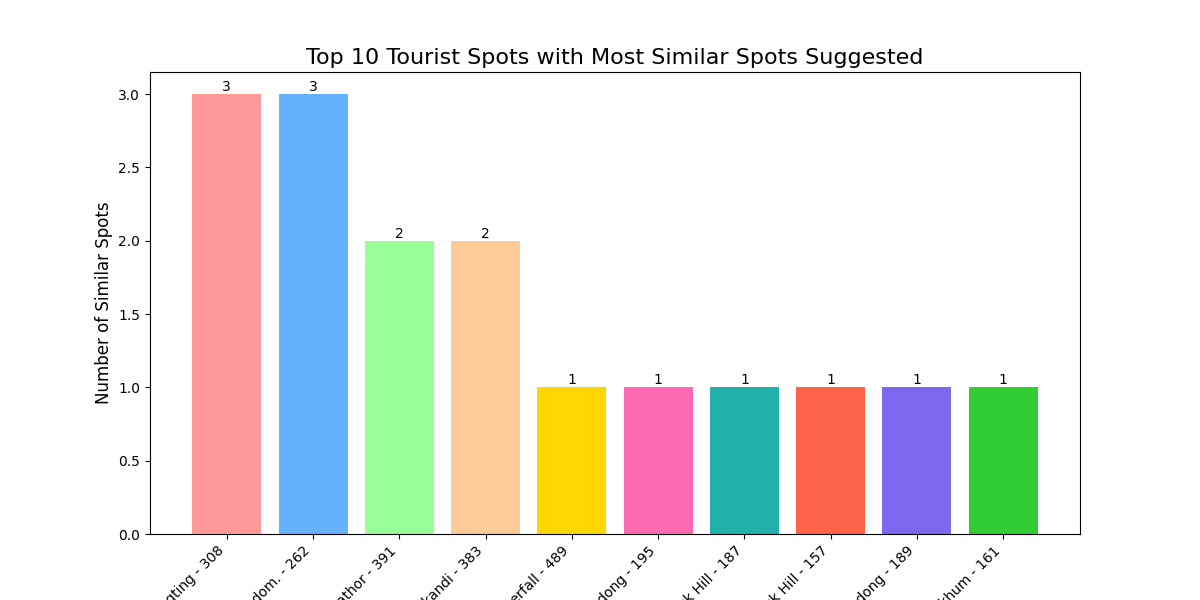

Explanation generated and displayed in Bangla.


In [28]:
# Count the number of similar spots for each tourist spot
similar_spots_count = df.groupby('Tourist Spots')['Similar Tourist Spots'].apply(lambda x: x.str.count(',') + 1).sort_values(ascending=False)

# Select top 10 spots for visualization
top_10_spots = similar_spots_count.head(10)

# Convert index to strings if they are tuples
if isinstance(top_10_spots.index[0], tuple):
    top_10_spots.index = [' - '.join(map(str, idx)) for idx in top_10_spots.index]

# Create a bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(top_10_spots)), top_10_spots.values, color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700', '#FF69B4', '#20B2AA', '#FF6347', '#7B68EE', '#32CD32'])
plt.title('Top 10 Tourist Spots with Most Similar Spots Suggested', fontsize=16)
plt.xlabel('Tourist Spots', fontsize=12)
plt.ylabel('Number of Similar Spots', fontsize=12)
plt.xticks(range(len(top_10_spots)), top_10_spots.index, rotation=45, ha='right')
plt.tight_layout()

# Add value labels on top of each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.0f}',
             ha='center', va='bottom')

# Save the plot to a base64 encoded string
buffer = io.BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)
plot_data = base64.b64encode(buffer.getvalue()).decode()
plt.close()

print("Matplotlib chart generated successfully.")

# Calculate average number of similar spots
avg_similar_spots = similar_spots_count.mean()

# Prepare explanation in English
explanation = f"""
• The tourist spot with the highest number of similar spots is {top_10_spots.index[0]} with {top_10_spots.values[0]:.0f} similar spots suggested.
• The average number of similar spots suggested across all tourist spots is {avg_similar_spots:.2f}.
• The top 5 tourist spots with the most similar spots suggested are:
  1. {top_10_spots.index[0]} ({top_10_spots.values[0]:.0f} spots)
  2. {top_10_spots.index[1]} ({top_10_spots.values[1]:.0f} spots)
  3. {top_10_spots.index[2]} ({top_10_spots.values[2]:.0f} spots)
  4. {top_10_spots.index[3]} ({top_10_spots.values[3]:.0f} spots)
  5. {top_10_spots.index[4]} ({top_10_spots.values[4]:.0f} spots)
• Factors contributing to a higher number of similar spots may include:
  - Diversity of attractions in the area
  - Popularity of the region
  - Accessibility and connectivity to other tourist spots
  - Historical or cultural significance of the area

Summary: {top_10_spots.index[0]} stands out with the highest number of similar spots, suggesting a potentially richer and more diverse tourist experience in that area.

Significant Actionable Insight: Focus on promoting {top_10_spots.index[0]} and the surrounding area as a hub for diverse tourist experiences. Develop package tours or travel itineraries that highlight the variety of attractions in this region to attract tourists looking for multifaceted travel experiences.
"""

# Translate to Bangla
translator = Translator()
bangla_explanation = translator.translate(explanation, dest='bn').text

# Split the translated text
main_points, summary, insight = bangla_explanation.split('\n\n')

# Create HTML with inline CSS
html_output = f"""
<div style="font-family: Tahoma, sans-serif; font-size: 18px; color: blue;">
    <h2>অনুরূপ স্পট সহ পর্যটন স্থানের বিশ্লেষণ</h2>
    <img src="data:image/png;base64,{plot_data}" alt="Top 10 Tourist Spots Chart">
    {main_points.replace('•', '<br>•')}
    <h3>সারাংশ</h3>
    <p>{summary}</p>
    <h3>উল্লেখযোগ্য কার্যকর অন্তর্দৃষ্টি</h3>
    <p>{insight}</p>
</div>
"""

# Display the HTML explanation
display(HTML(html_output))
print("Explanation generated and displayed in Bangla.")

In [29]:
# Function to get top 5 items
def get_top_5(series):
    items = [item.strip() for sublist in series.dropna() for item in str(sublist).split(';')]
    return pd.Series(items).value_counts().nlargest(5)

# Get top 5 resorts/hotels and restaurants for each district
top_resorts = df.groupby('District')['Hotel/Resort'].apply(get_top_5)
top_restaurants = df.groupby('District')['Restaurants'].apply(get_top_5)

print("Top Resorts:")
print(top_resorts)
print("\
Top Restaurants:")
print(top_restaurants)

# Get top 3 districts by total mentions
district_mentions = top_resorts.groupby('District').sum() + top_restaurants.groupby('District').sum()
top_districts = district_mentions.nlargest(3).index.tolist()

print("\
Top 3 Districts:")
print(top_districts)

# Print a summary of the results
print("\
Summary:")
for district in top_districts:
    print(f"\
{district}:")
    print(f"  Top Hotel/Resort: {top_resorts[district].index[0]}")
    print(f"  Top Restaurants: {top_restaurants[district].index[0]}")

Top Resorts:
District                                        
Bandarban     Nilgiri Resort                        52
              SBusu Hill Resorts                    46
              Hotel Hill View                       45
              Labah Tong Hill Resort Ltd            40
              Fanush Resort                         29
Khagrachhari  Khagrachhari Parjatan Motel           80
              Monu Adom Resort                      55
              Borno Resot                           35
              GBusing hotel                          1
              Tareng hotel                           1
Rangamati     Aronnok & Lakeshore Holiday Resort    69
              Parjatan Holiday Complex              51
              Hotel Nadisa International.           50
              Megh Kabbo Hilltop Cottage            47
              Hill Taj Resort                       42
Sylhet        Grand Palace Sylhet                   76
              Rose View Hotel                       47
   

In [30]:
# Function to get top 5 items
def get_top_5(series):
    items = [item.strip() for sublist in series.dropna() for item in str(sublist).split(';')]
    return pd.Series(items).value_counts().nlargest(5)

# Get top 5 resorts/hotels and restaurants for each district
top_resorts = df.groupby('District')['Hotel/Resort'].apply(get_top_5)
top_restaurants = df.groupby('District')['Restaurants'].apply(get_top_5)

# Get top 3 districts by total mentions
district_mentions = top_resorts.groupby('District').sum() + top_restaurants.groupby('District').sum()
top_districts = district_mentions.nlargest(3).index.tolist()

# Color palette
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC']

# Create subplots
fig = make_subplots(rows=2, cols=1,
                    subplot_titles=["Top 5 Hotel/Resort by District", "Top 5 Restaurants by District"],
                    vertical_spacing=0.5)

# Add traces for each district
for i, district in enumerate(top_districts):
    # Resorts/Hotels
    fig.add_trace(go.Bar(x=top_resorts[district].index, y=top_resorts[district].values,
                         name=f"{district} - Resorts", marker_color=colors[i]), row=1, col=1)

    # Restaurants
    fig.add_trace(go.Bar(x=top_restaurants[district].index, y=top_restaurants[district].values,
                         name=f"{district} - Restaurants", marker_color=colors[i]), row=2, col=1)

# Update layout
fig.update_layout(height=800, width=1000,
                  title_text="Top 5 Resorts/Hotels and Restaurants for Top 3 Districts",
                  barmode='group')

fig.update_xaxes(tickangle=45)

# Display the chart
fig.show()

# Generate explanation in Bangla
explanation = f"""
<div style="font-family: Tahoma, sans-serif; font-size: 18px; color: blue;">
<h2>\u09ac\u09cd\u09af\u09be\u0996\u09cd\u09af\u09be:</h2>
<ul>
    <li>\u09b8\u09b0\u09cd\u09ac\u09be\u09a7\u09bf\u0995 \u099c\u09a8\u09aa\u09cd\u09b0\u09bf\u09af\u09bc \u09e9\u099f\u09bf \u099c\u09c7\u09b2\u09be \u09b9\u09b2: {', '.join(top_districts)}</li>
    <li>{top_districts[0]} \u099c\u09c7\u09b2\u09be\u09af\u09bc \u09b8\u09ac\u099a\u09c7\u09af\u09bc\u09c7 \u099c\u09a8\u09aa\u09cd\u09b0\u09bf\u09af\u09bc \u09b0\u09bf\u09b8\u09cb\u09b0\u09cd\u099f/\u09b9\u09cb\u099f\u09c7\u09b2 \u09b9\u09b2 {top_resorts[top_districts[0]].index[0]}, \u098f\u09ac\u0982 \u09b8\u09ac\u099a\u09c7\u09af\u09bc\u09c7 \u099c\u09a8\u09aa\u09cd\u09b0\u09bf\u09af\u09bc \u09b0\u09c7\u09b8\u09cd\u09a4\u09cb\u09b0\u09be\u0981 \u09b9\u09b2 {top_restaurants[top_districts[0]].index[0]}</li>
    <li>{top_districts[1]} \u099c\u09c7\u09b2\u09be\u09af\u09bc \u09b8\u09ac\u099a\u09c7\u09af\u09bc\u09c7 \u099c\u09a8\u09aa\u09cd\u09b0\u09bf\u09af\u09bc \u09b0\u09bf\u09b8\u09cb\u09b0\u09cd\u099f/\u09b9\u09cb\u099f\u09c7\u09b2 \u09b9\u09b2 {top_resorts[top_districts[1]].index[0]}, \u098f\u09ac\u0982 \u09b8\u09ac\u099a\u09c7\u09af\u09bc\u09c7 \u099c\u09a8\u09aa\u09cd\u09b0\u09bf\u09af\u09bc \u09b0\u09c7\u09b8\u09cd\u09a4\u09cb\u09b0\u09be\u0981 \u09b9\u09b2 {top_restaurants[top_districts[1]].index[0]}</li>
    <li>{top_districts[2]} \u099c\u09c7\u09b2\u09be\u09af\u09bc \u09b8\u09ac\u099a\u09c7\u09af\u09bc\u09c7 \u099c\u09a8\u09aa\u09cd\u09b0\u09bf\u09af\u09bc \u09b0\u09bf\u09b8\u09cb\u09b0\u09cd\u099f/\u09b9\u09cb\u099f\u09c7\u09b2 \u09b9\u09b2 {top_resorts[top_districts[2]].index[0]}, \u098f\u09ac\u0982 \u09b8\u09ac\u099a\u09c7\u09af\u09bc\u09c7 \u099c\u09a8\u09aa\u09cd\u09b0\u09bf\u09af\u09bc \u09b0\u09c7\u09b8\u09cd\u09a4\u09cb\u09b0\u09be\u0981 \u09b9\u09b2 {top_restaurants[top_districts[2]].index[0]}</li>
</ul>

<h2>\u09b8\u09be\u09b0\u09b8\u0982\u0995\u09cd\u09b7\u09c7\u09aa:</h2>
<p>\u098f\u0987 \u09ac\u09bf\u09b6\u09cd\u09b2\u09c7\u09b7\u09a3 \u09a5\u09c7\u0995\u09c7 \u09a6\u09c7\u0996\u09be \u09af\u09be\u09af\u09bc \u09af\u09c7 {', '.join(top_districts)} \u099c\u09c7\u09b2\u09be\u0997\u09c1\u09b2\u09bf \u09aa\u09b0\u09cd\u09af\u099f\u0995\u09a6\u09c7\u09b0 \u09ae\u09a7\u09cd\u09af\u09c7 \u09b8\u09ac\u099a\u09c7\u09af\u09bc\u09c7 \u099c\u09a8\u09aa\u09cd\u09b0\u09bf\u09af\u09bc\u0964 \u09aa\u09cd\u09b0\u09a4\u09bf\u099f\u09bf \u099c\u09c7\u09b2\u09be\u09af\u09bc \u0995\u09bf\u099b\u09c1 \u09ac\u09bf\u09b6\u09c7\u09b7 \u09b0\u09bf\u09b8\u09cb\u09b0\u09cd\u099f/\u09b9\u09cb\u099f\u09c7\u09b2 \u098f\u09ac\u0982 \u09b0\u09c7\u09b8\u09cd\u09a4\u09cb\u09b0\u09be\u0981 \u09b0\u09af\u09bc\u09c7\u099b\u09c7 \u09af\u09be \u09aa\u09b0\u09cd\u09af\u099f\u0995\u09a6\u09c7\u09b0 \u0995\u09be\u099b\u09c7 \u09ac\u09c7\u09b6\u09bf \u09aa\u099b\u09a8\u09cd\u09a6\u09c7\u09b0\u0964</p>

<h2>\u0997\u09c1\u09b0\u09c1\u09a4\u09cd\u09ac\u09aa\u09c2\u09b0\u09cd\u09a3 \u0995\u09be\u09b0\u09cd\u09af\u0995\u09b0 \u0985\u09a8\u09cd\u09a4\u09b0\u09cd\u09a6\u09c3\u09b7\u09cd\u099f\u09bf:</h2>
<p>\u09aa\u09b0\u09cd\u09af\u099f\u09a8 \u09ac\u09bf\u09ad\u09be\u0997 \u098f\u0987 \u09a4\u09a5\u09cd\u09af \u09ac\u09cd\u09af\u09ac\u09b9\u09be\u09b0 \u0995\u09b0\u09c7 \u099c\u09a8\u09aa\u09cd\u09b0\u09bf\u09af\u09bc \u09b0\u09bf\u09b8\u09cb\u09b0\u09cd\u099f/\u09b9\u09cb\u099f\u09c7\u09b2 \u098f\u09ac\u0982 \u09b0\u09c7\u09b8\u09cd\u09a4\u09cb\u09b0\u09be\u0981\u0997\u09c1\u09b2\u09bf\u09b0 \u09b8\u09be\u09a5\u09c7 \u09b8\u09b9\u09af\u09cb\u0997\u09bf\u09a4\u09be \u0995\u09b0\u09c7 \u09aa\u09b0\u09cd\u09af\u099f\u0995\u09a6\u09c7\u09b0 \u099c\u09a8\u09cd\u09af \u09ac\u09bf\u09b6\u09c7\u09b7 \u09aa\u09cd\u09af\u09be\u0995\u09c7\u099c \u09a4\u09c8\u09b0\u09bf \u0995\u09b0\u09a4\u09c7 \u09aa\u09be\u09b0\u09c7\u0964 \u098f\u099f\u09bf \u09aa\u09b0\u09cd\u09af\u099f\u09a8 \u09b6\u09bf\u09b2\u09cd\u09aa\u0995\u09c7 \u0986\u09b0\u0993 \u0989\u09a8\u09cd\u09a8\u09a4 \u0995\u09b0\u09a4\u09c7 \u09b8\u09be\u09b9\u09be\u09af\u09cd\u09af \u0995\u09b0\u09ac\u09c7\u0964</p>
</div>
"""

# Display the explanation
display(HTML(explanation))

print("Chart and explanation have been displayed in the notebook.")

Chart and explanation have been displayed in the notebook.


<ipython-input-31-89fd7bc0b266>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-31-89fd7bc0b266>:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




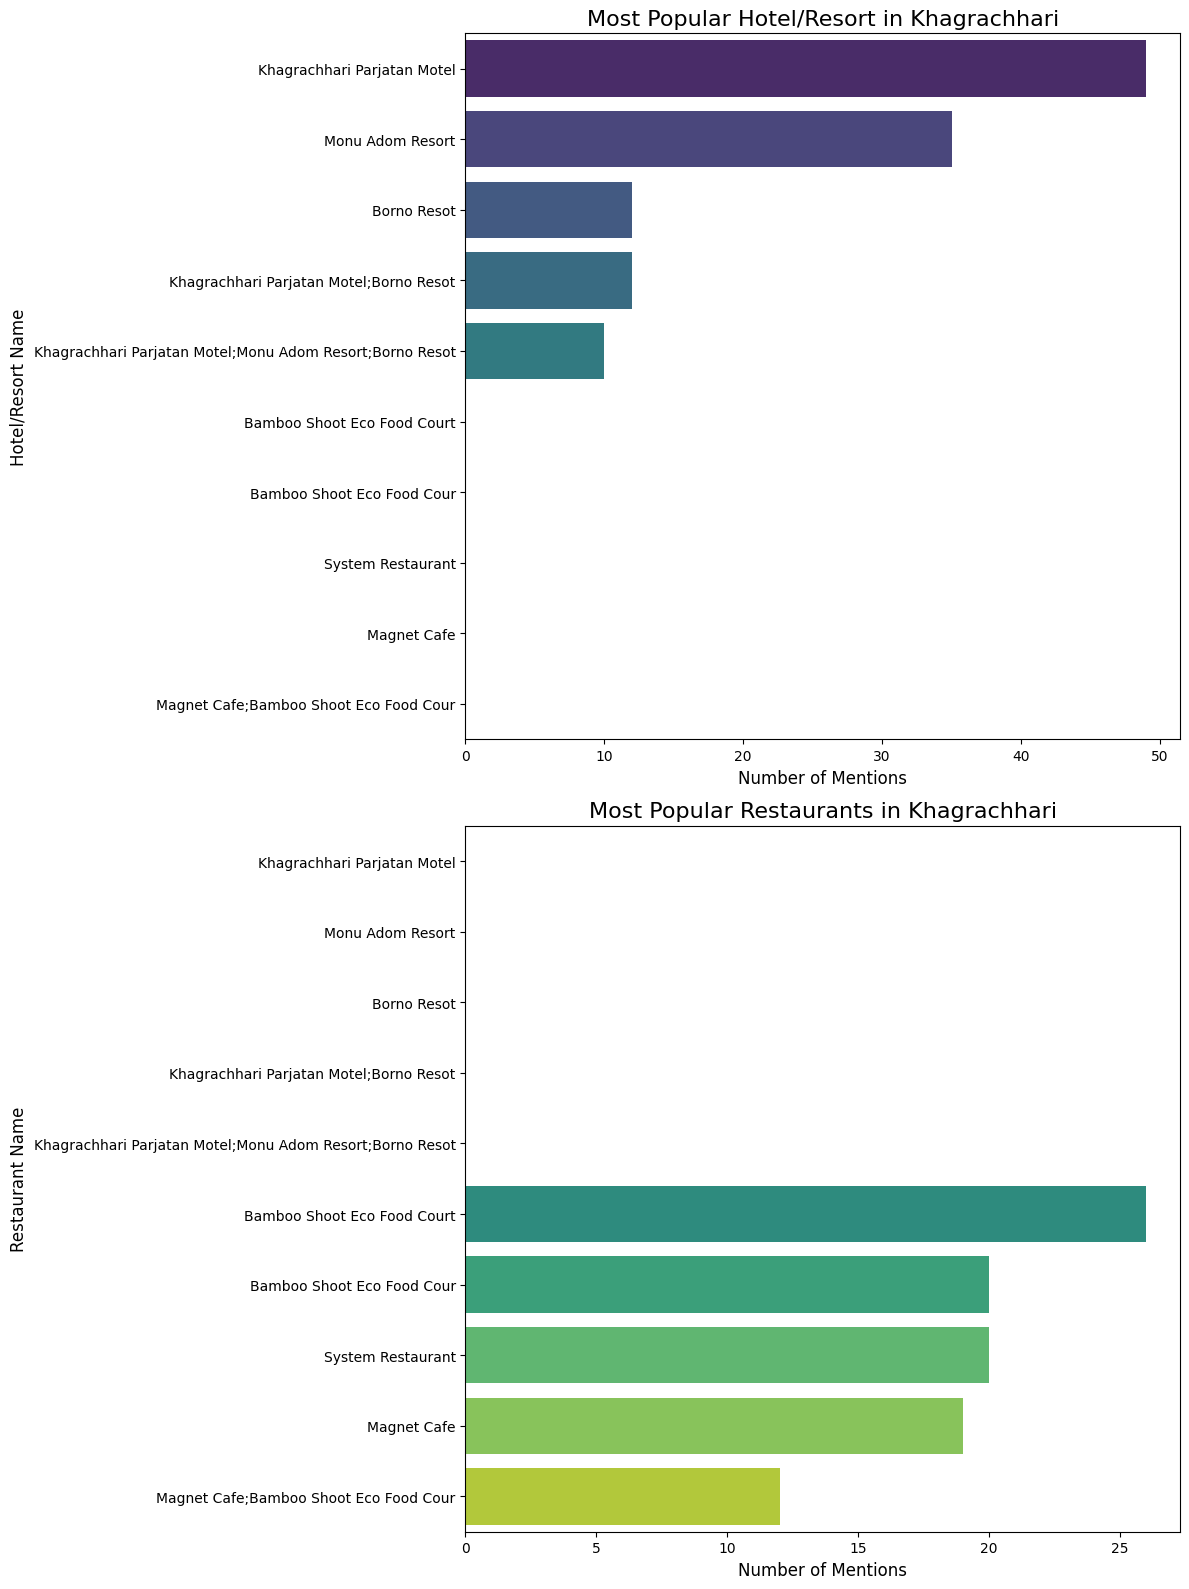

Visualization created and saved as 'khagrachhari_popularity.png'


In [31]:
# Assuming you have a DataFrame df with relevant data
# Extracting popular resorts and restaurants from your data
popular_resorts = df.groupby('District')['Hotel/Resort'].apply(lambda x: x.value_counts().nlargest(5))
popular_restaurants = df.groupby('District')['Restaurants'].apply(lambda x: x.value_counts().nlargest(5))

# Assuming you're focusing on 'Khagrachhari' district
khagrachhari_resorts = popular_resorts['Khagrachhari']
khagrachhari_restaurants = popular_restaurants['Khagrachhari']

# Combine the data for resorts/hotels and restaurants
combined_data = pd.concat([khagrachhari_resorts, khagrachhari_restaurants], axis=1)
combined_data.columns = ['Hotel/Resort', 'Resraurants']
combined_data = combined_data.fillna(0)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))

# Plot for Resorts/Hotels
sns.barplot(x=combined_data['Hotel/Resort'], y=combined_data.index, ax=ax1, palette='viridis')
ax1.set_title('Most Popular Hotel/Resort in Khagrachhari', fontsize=16)
ax1.set_xlabel('Number of Mentions', fontsize=12)
ax1.set_ylabel('Hotel/Resort Name', fontsize=12)

# Plot for Restaurants
sns.barplot(x=combined_data['Resraurants'], y=combined_data.index, ax=ax2, palette='viridis')
ax2.set_title('Most Popular Restaurants in Khagrachhari', fontsize=16)
ax2.set_xlabel('Number of Mentions', fontsize=12)
ax2.set_ylabel('Restaurant Name', fontsize=12)

plt.tight_layout()
plt.savefig('khagrachhari_popularity.png')
plt.show()

print("Visualization created and saved as 'khagrachhari_popularity.png'")


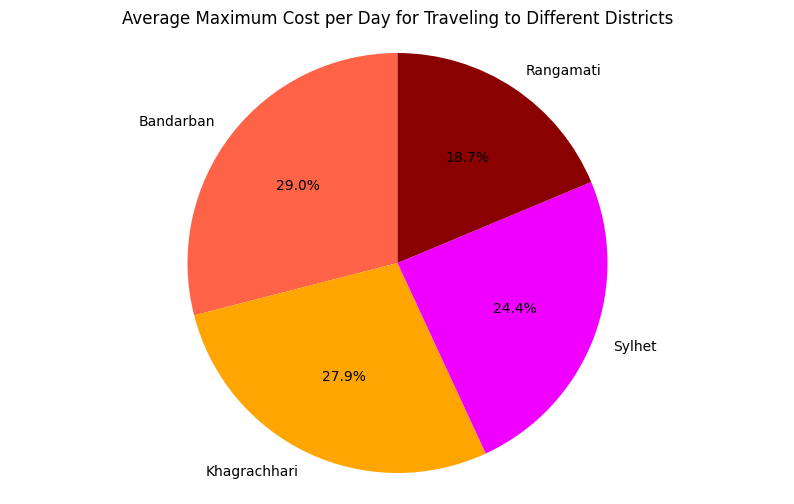

In [32]:
# Function to extract the average cost from the string
def extract_average_cost(cost_string):
    numbers = re.findall(r'\d+', cost_string)
    if len(numbers) == 2:
        return (int(numbers[0]) + int(numbers[1])) / 2
    elif len(numbers) == 1:
        return int(numbers[0])
    else:
        return None

# Apply the function to create a new numeric column
df['Numeric Cost'] = df['Maximum cost (per day)'].apply(extract_average_cost)

# Calculate average minimum cost per day for each district
avg_cost_by_district = df.groupby('District')['Numeric Cost'].mean().sort_values(ascending=False)

# Define the colors for the four districts
colors = ['#FF6347', '#FFA500', '#F000FF', '#8B0000']

# Create a pie chart using matplotlib
plt.figure(figsize=(10, 6))
plt.pie(avg_cost_by_district.values, labels=avg_cost_by_district.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Average Maximum Cost per Day for Traveling to Different Districts')
plt.show()

# Calculate values for the explanation
max_district = avg_cost_by_district.index[0]
max_cost = avg_cost_by_district.iloc[0]
min_district = avg_cost_by_district.index[-1]
min_cost = avg_cost_by_district.iloc[-1]
avg_cost = avg_cost_by_district.mean()

# Prepare the explanation in Bangla
explanation = """
<div style="font-family: Tahoma; font-size: 18px; color: blue;">
<h3>বিশ্লেষণের ব্যাখ্যা:</h3>
<ul>
    <li>সর্বোচ্চ গড় ন্যূনতম খরচ: {max_district} জেলায় দৈনিক {max_cost:.2f} টাকা।</li>
    <li>সর্বনিম্ন গড় ন্যূনতম খরচ: {min_district} জেলায় দৈনিক {min_cost:.2f} টাকা।</li>
    <li>সকল জেলার গড় ন্যূনতম খরচ: দৈনিক {avg_cost:.2f} টাকা।</li>
</ul>
<h4>সারসংক্ষেপ:</h4>
<p>বিভিন্ন জেলায় ভ্রমণের খরচের মধ্যে উল্লেখযোগ্য পার্থক্য রয়েছে। {max_district} সবচেয়ে ব্যয়বহুল জেলা হিসেবে দেখা যাচ্ছে, যেখানে {min_district} সবচেয়ে কম ব্যয়বহুল।</p>
<h4>গুরুত্বপূর্ণ কার্যকর অন্তর্দৃষ্টি:</h4>
<p>পর্যটন সংস্থাগুলি {min_district} এর মতো কম খরচের জেলাগুলিতে বাজেট-সচেতন ভ্রমণ প্যাকেজ প্রচার করতে পারে, যা আরও বেশি পর্যটককে আকর্ষণ করতে সাহায্য করবে।</p>
</div>
"""

# Format the explanation with calculated values
formatted_explanation = explanation.format(
    max_district=max_district,
    max_cost=max_cost,
    min_district=min_district,
    min_cost=min_cost,
    avg_cost=avg_cost
)

# Display the formatted explanation
from IPython.display import HTML
display(HTML(formatted_explanation))

<ipython-input-33-9b575f8e1e53>:46: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




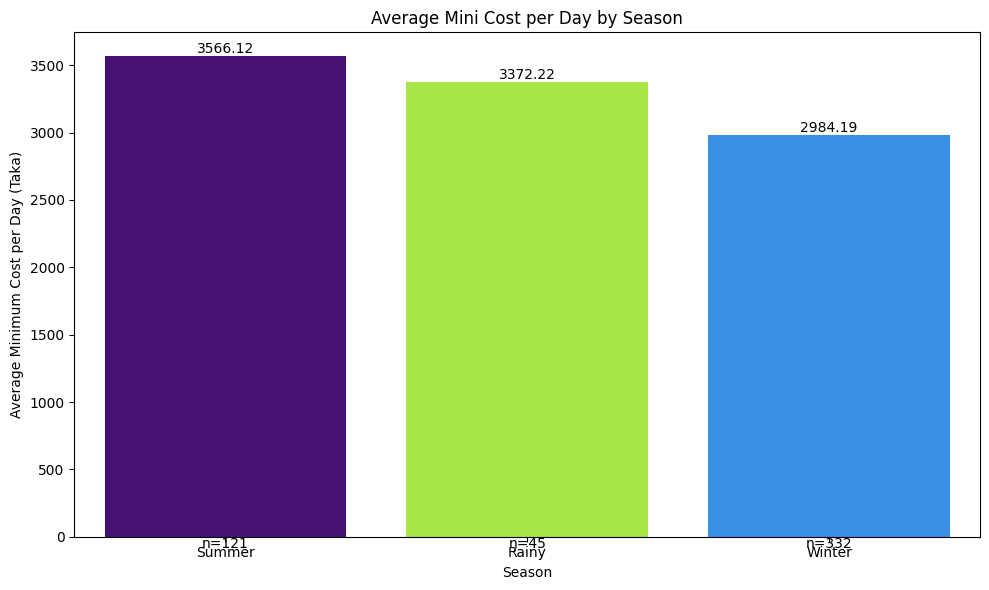

Done


In [33]:
# Function to extract the average cost from the range
def extract_average_cost(cost_range):
    if isinstance(cost_range, str):
        costs = cost_range.split('-')
        try:
            return np.mean([int(cost.strip().replace('Taka', '').strip()) for cost in costs])
        except ValueError:
            return np.nan
    return np.nan

# Apply the function to create a new column with average costs
df['Average Cost'] = df['Maximum cost (per day)'].apply(extract_average_cost)

# Function to categorize seasons
def categorize_season(season):
    if isinstance(season, str):
        season = season.lower()
        if 'summer' in season:
            return 'Summer'
        elif 'winter' in season:
            return 'Winter'
        elif 'rainy' in season:
            return 'Rainy'
    return 'Other'

# Categorize seasons
df['Season Category'] = df['Season'].apply(categorize_season)

# Remove rows with NaN values in Average Cost and filter for relevant seasons
df_clean = df.dropna(subset=['Average Cost'])
df_clean = df_clean[df_clean['Season Category'].isin(['Summer', 'Winter', 'Rainy'])]

# Group by Season Category and calculate mean cost
season_cost = df_clean.groupby('Season Category')['Average Cost'].agg(['mean', 'count']).reset_index()
season_cost = season_cost.sort_values('mean', ascending=False)

# Define custom colors
custom_colors = {
    'Summer': '#4B0082',  # Indigo
    'Winter': '#1E90FF',  # MediumBlue
    'Rainy': '#ADFF2F'   # GreenYellow
}

# Create a bar plot with custom colors
plt.figure(figsize=(10, 6))
sns.barplot(x='Season Category', y='mean', data=season_cost, palette=custom_colors)
plt.title('Average Mini Cost per Day by Season')
plt.xlabel('Season')
plt.ylabel('Average Minimum Cost per Day (Taka)')

# Add value labels on top of each bar
for i, v in enumerate(season_cost['mean']):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

# Add count labels below each bar
for i, (v, c) in enumerate(zip(season_cost['mean'], season_cost['count'])):
    plt.text(i, 0, f'n={c}', ha='center', va='top')

plt.tight_layout()
plt.show()

# Prepare explanation in Bangla
explanation = """
<div style="color: blue; font-size: 18px; font-family: Tahoma;">
<ul>
<li>\u0997\u09cd\u09b0\u09c0\u09b7\u09cd\u09ae\u0995\u09be\u09b2\u09c7 \u09b8\u09b0\u09cd\u09ac\u09cb\u099a\u09cd\u099a \u0997\u09a1\u09bc \u09a8\u09cd\u09af\u09c2\u09a8\u09a4\u09ae \u0996\u09b0\u099a \u09aa\u09cd\u09b0\u09a4\u09bf\u09a6\u09bf\u09a8 {:.2f} \u099f\u09be\u0995\u09be\u0964</li>
<li>\u09b6\u09c0\u09a4\u0995\u09be\u09b2\u09c7 \u0997\u09a1\u09bc \u09a8\u09cd\u09af\u09c2\u09a8\u09a4\u09ae \u0996\u09b0\u099a \u09aa\u09cd\u09b0\u09a4\u09bf\u09a6\u09bf\u09a8 {:.2f} \u099f\u09be\u0995\u09be\u0964</li>
<li>\u09ac\u09b0\u09cd\u09b7\u09be\u0995\u09be\u09b2\u09c7 \u09b8\u09b0\u09cd\u09ac\u09a8\u09bf\u09ae\u09cd\u09a8 \u0997\u09a1\u09bc \u09a8\u09cd\u09af\u09c2\u09a8\u09a4\u09ae \u0996\u09b0\u099a \u09aa\u09cd\u09b0\u09a4\u09bf\u09a6\u09bf\u09a8 {:.2f} \u099f\u09be\u0995\u09be\u0964</li>
<li>\u09b8\u09ac\u099a\u09c7\u09af\u09bc\u09c7 \u09ac\u09c7\u09b6\u09bf \u09a4\u09a5\u09cd\u09af \u09b0\u09af\u09bc\u09c7\u099b\u09c7 \u09b6\u09c0\u09a4\u0995\u09be\u09b2\u09c7\u09b0 \u099c\u09a8\u09cd\u09af ({} \u098f\u09a8\u09cd\u099f\u09cd\u09b0\u09bf), \u09a4\u09be\u09b0\u09aa\u09b0\u09c7 \u0997\u09cd\u09b0\u09c0\u09b7\u09cd\u09ae\u0995\u09be\u09b2 ({} \u098f\u09a8\u09cd\u099f\u09cd\u09b0\u09bf) \u098f\u09ac\u0982 \u09ac\u09b0\u09cd\u09b7\u09be\u0995\u09be\u09b2 ({} \u098f\u09a8\u09cd\u099f\u09cd\u09b0\u09bf)\u0964</li>
</ul>
<p><strong>\u09b8\u09be\u09b0\u09b8\u0982\u0995\u09cd\u09b7\u09c7\u09aa:</strong> \u0997\u09cd\u09b0\u09c0\u09b7\u09cd\u09ae\u0995\u09be\u09b2\u09c7 \u09ad\u09cd\u09b0\u09ae\u09a3 \u09b8\u09ac\u099a\u09c7\u09af\u09bc\u09c7 \u09ac\u09cd\u09af\u09af\u09bc\u09ac\u09b9\u09c1\u09b2, \u09a4\u09be\u09b0\u09aa\u09b0\u09c7 \u09b6\u09c0\u09a4\u0995\u09be\u09b2, \u098f\u09ac\u0982 \u09ac\u09b0\u09cd\u09b7\u09be\u0995\u09be\u09b2 \u09b8\u09ac\u099a\u09c7\u09af\u09bc\u09c7 \u0995\u09ae \u09ac\u09cd\u09af\u09af\u09bc\u09ac\u09b9\u09c1\u09b2\u0964</p>
<p><strong>\u0989\u09b2\u09cd\u09b2\u09c7\u0996\u09af\u09cb\u0997\u09cd\u09af \u0995\u09be\u09b0\u09cd\u09af\u0995\u09b0 \u0985\u09a8\u09cd\u09a4\u09b0\u09cd\u09a6\u09c3\u09b7\u09cd\u099f\u09bf:</strong> \u09ac\u09b0\u09cd\u09b7\u09be\u0995\u09be\u09b2\u09c7 \u09ad\u09cd\u09b0\u09ae\u09a3\u09c7\u09b0 \u09aa\u09cd\u09b0\u099a\u09be\u09b0 \u0995\u09b0\u09be \u09af\u09c7\u09a4\u09c7 \u09aa\u09be\u09b0\u09c7 \u0995\u09ae \u0996\u09b0\u099a\u09c7\u09b0 \u0995\u09be\u09b0\u09a3\u09c7, \u09a4\u09ac\u09c7 \u09ae\u09cc\u09b8\u09c1\u09ae\u09bf \u0986\u09ac\u09b9\u09be\u0993\u09af\u09bc\u09be \u098f\u09ac\u0982 \u09b8\u09ae\u09cd\u09ad\u09be\u09ac\u09cd\u09af \u09ac\u09a8\u09cd\u09af\u09be\u09b0 \u099d\u09c1\u0981\u0995\u09bf \u09ac\u09bf\u09ac\u09c7\u099a\u09a8\u09be \u0995\u09b0\u09a4\u09c7 \u09b9\u09ac\u09c7\u0964</p>
</div>
""".format(
    season_cost.loc[season_cost['Season Category'] == 'Summer', 'mean'].values[0],
    season_cost.loc[season_cost['Season Category'] == 'Winter', 'mean'].values[0],
    season_cost.loc[season_cost['Season Category'] == 'Rainy', 'mean'].values[0],
    season_cost.loc[season_cost['Season Category'] == 'Winter', 'count'].values[0],
    season_cost.loc[season_cost['Season Category'] == 'Summer', 'count'].values[0],
    season_cost.loc[season_cost['Season Category'] == 'Rainy', 'count'].values[0]
)

# Display the explanation
display(HTML(explanation))

print("\
Done")

<ipython-input-34-c3cf90895e49>:51: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



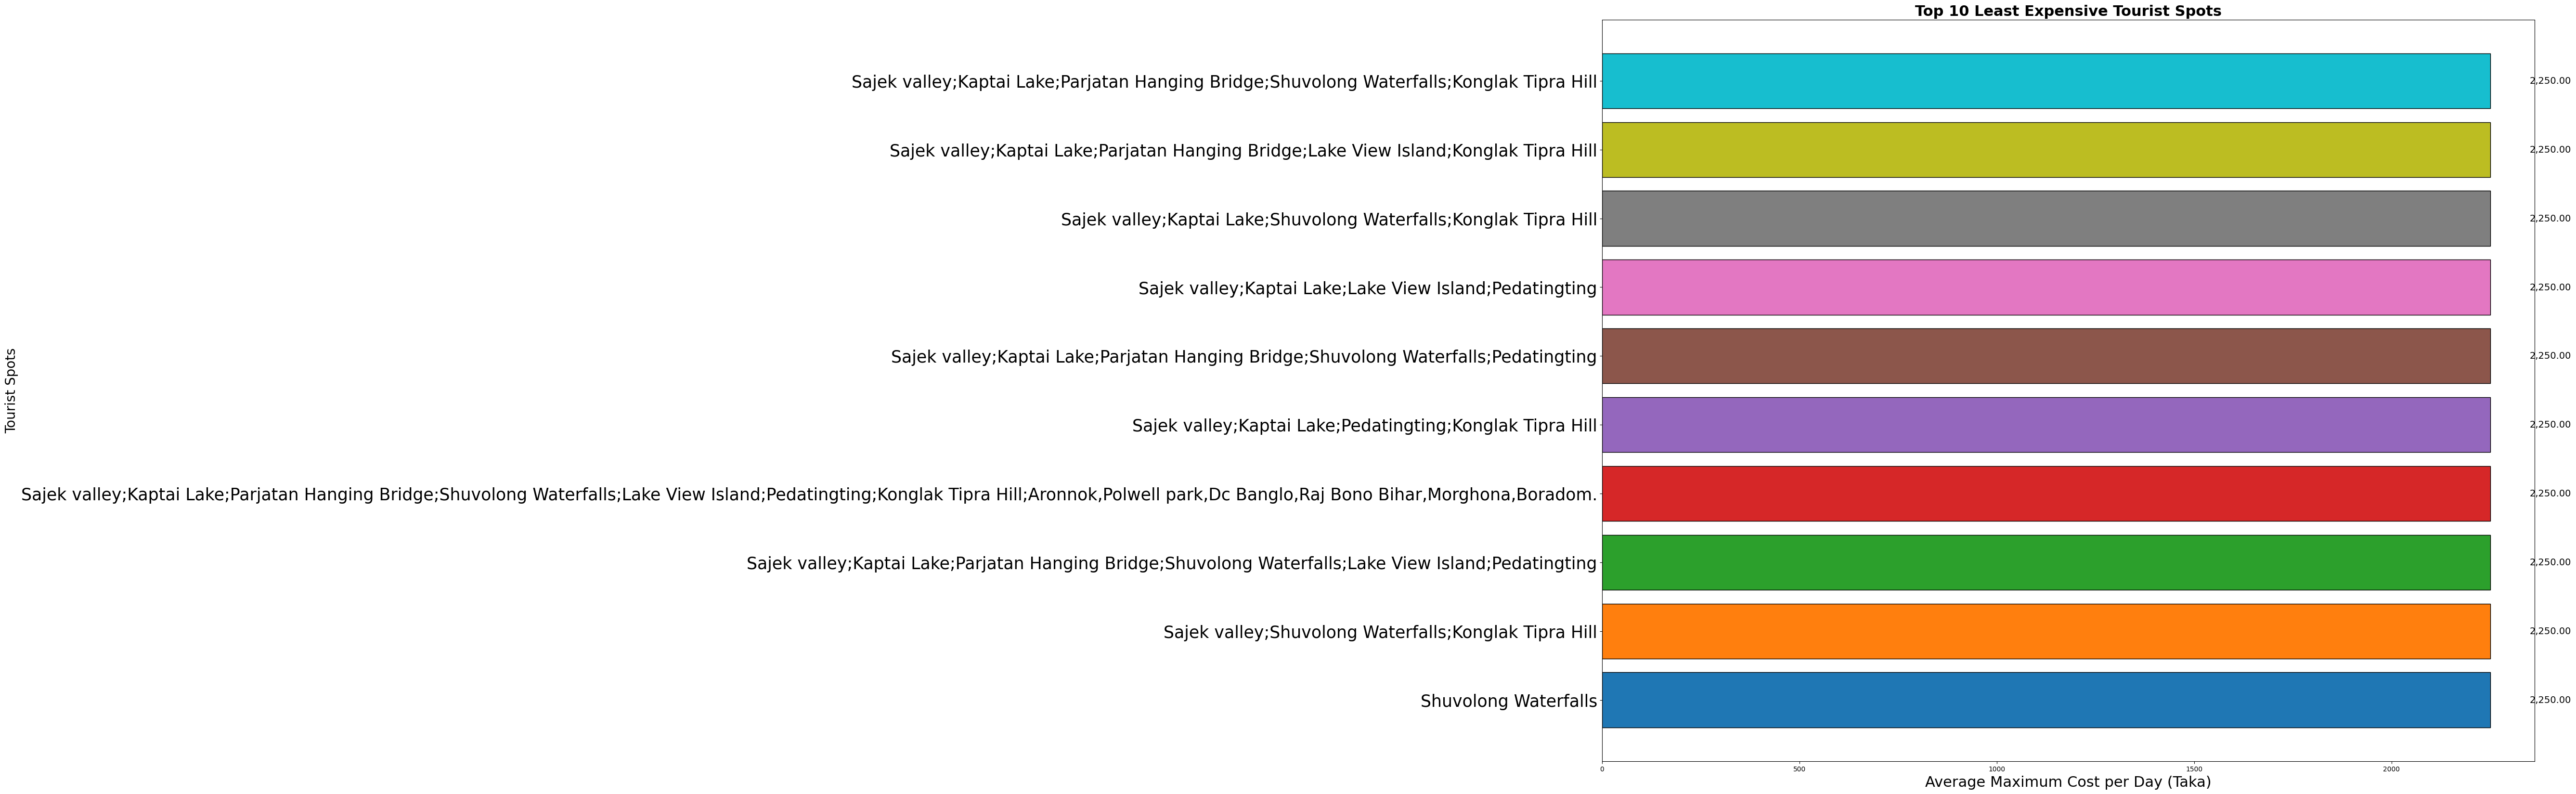

In [34]:
# Load the dataset
file_path = 'Cleaned_Tourist_Chatbot_Dataset.xlsx'
df = pd.read_excel(file_path)

# Function to clean and convert the 'Minimum cost (per day)' column to numeric
def extract_numeric_cost(value):
    if isinstance(value, str):
        # If the value is a range (e.g., "3000 - 4000 Taka")
        match = re.match(r"(\d+)\s*-\s*(\d+)", value)
        if match:
            # Take the average of the two numbers in the range
            return (int(match.group(1)) + int(match.group(2))) / 2
        # If the value is a single number with "Taka" (e.g., "3000 Taka")
        single_value_match = re.match(r"(\d+)", value)
        if single_value_match:
            return int(single_value_match.group(1))
    return np.nan  # For 'Unknown' and other non-numeric values

# Apply the function to the 'Minimum cost (per day)' column
df['Maximum cost (per day)'] = df['Maximum cost (per day)'].apply(extract_numeric_cost)

# Grouping by Tourist Spots to find average minimum cost
spot_costs_df = df.groupby('Tourist Spots')['Maximum cost (per day)'].mean().reset_index()
spot_costs_df.columns = ['Spots', 'Average Cost']
spot_costs_df = spot_costs_df.sort_values(by='Average Cost', ascending=True).reset_index(drop=True)

# Get top 10 least expensive spots
top_10_cheap_spots = spot_costs_df.head(10)

# Plot the bar chart using Matplotlib
plt.figure(figsize=(25, 20))  # Adjusting the size of the chart
colors = plt.cm.tab10(np.linspace(0, 1, 10))  # Using loud and clear colors

bars = plt.barh(top_10_cheap_spots['Spots'], top_10_cheap_spots['Average Cost'], color=colors, edgecolor='black')

# Set title and axis labels with larger fonts
plt.title('Top 10 Least Expensive Tourist Spots', fontsize=22, fontweight='bold')
plt.xlabel('Average Maximum Cost per Day (Taka)', fontsize=22)
plt.ylabel('Tourist Spots', fontsize=20)  # Larger font size for Tourist Spot label

# Increase font size of the tick labels on the y-axis (tourist spot names)
plt.yticks(fontsize=25)

# Annotate the bar chart with the values
for bar in bars:
    plt.text(bar.get_width() + 100, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():,.2f}',
             va='center', fontsize=14)

# Adjust layout for better readability
plt.tight_layout()
plt.show()

# HTML formatted explanation in Bangla with inline CSS
explanation_html = """
<div style="color:blue; font-size:18px; font-family:Tahoma;">
    <ul>
        <li>টপ ১০ সবচেয়ে কম খরচের পর্যটন কেন্দ্রগুলি বার চার্টে উপস্থাপন করা হয়েছে।</li>
        <li>প্রতিটি কেন্দ্রের গড় খরচ টাকার মাধ্যমে উপস্থাপন করা হয়েছে যা বাজেট ভ্রমণকারীদের জন্য সহায়ক হতে পারে।</li>
        <li>কম খরচে ভ্রমণের পরিকল্পনা করতে এই তথ্যটি অত্যন্ত সহায়ক।</li>
    </ul>
    <h3 style="color:blue; font-size:20px; font-family:Tahoma;">Summary:</h3>
    <p>এই চার্ট থেকে দেখা যাচ্ছে যে কিছু পর্যটন কেন্দ্রের গড় খরচ উল্লেখযোগ্যভাবে কম। এটি ভ্রমণকারীদের কম বাজেটে ভ্রমণ পরিকল্পনা করতে সাহায্য করবে।</p>
    <h3 style="color:blue; font-size:20px; font-family:Tahoma;">Significant Actionable Insight:</h3>
    <p>যারা কম খরচে ভ্রমণ করতে চান, তারা এই কম খরচের পর্যটন কেন্দ্রগুলির দিকে নজর দিতে পারেন। এই স্থানগুলির গড় খরচ তুলনামূলকভাবে কম হওয়ায়, এটি বাজেট ভ্রমণকারীদের জন্য ভালো বিকল্প।</p>
</div>
"""

# Display the explanation in the notebook
display(HTML(explanation_html))


In [35]:
# Load the data
df = pd.read_excel('Cleaned_Tourist_Chatbot_Dataset.xlsx', sheet_name='Sheet1')

def clean_cost(cost_str):
    # Remove 'Taka' and non-ASCII characters
    cost_str = re.sub(r'[^\x00-\x7F]+', '', cost_str)
    cost_str = cost_str.replace('Taka', '').strip()

    # Handle ranges
    if '-' in cost_str:
        low, high = map(lambda x: int(x.strip()), cost_str.split('-'))
        return (low + high) / 2
    elif '+' in cost_str:
        # For open-ended ranges, assume the upper limit is 2000 more than the lower limit
        return int(cost_str.replace('+', '').strip()) + 1000
    elif cost_str.isdigit():
        return int(cost_str)
    else:
        return None  # For 'Unknown' or other non-standard values

# Apply the cleaning function
df['Cleaned Cost'] = df['Maximum cost (per day)'].apply(clean_cost)

# Display the results
print(df[['Maximum cost (per day)', 'Cleaned Cost']].head(10))

# Display basic statistics of the cleaned column
print("\
Basic statistics of 'Cleaned Cost' column:")
print(df['Cleaned Cost'].describe())

# Count the number of NaN values
nan_count = df['Cleaned Cost'].isna().sum()
print(f"\
Number of NaN values: {nan_count}")

# Save the cleaned dataframe
df.to_excel('Cleaned_Tourist_Dataset_with_Costs.xlsx', index=False)
print("\
Cleaned dataset saved as 'Cleaned_Tourist_Dataset_with_Costs.xlsx'")

  Maximum cost (per day)  Cleaned Cost
0       3000 - 4000 Taka        3500.0
1       3000 - 4000 Taka        3500.0
2       3000 - 4000 Taka        3500.0
3       2000 - 3000 Taka        2500.0
4       4000 - 5000 Taka        4500.0
5       2000 - 3000 Taka        2500.0
6       2000 - 3000 Taka        2500.0
7       3000 - 4000 Taka        3500.0
8       3000 - 4000 Taka        3500.0
9       3000 - 4000 Taka        3500.0
Basic statistics of 'Cleaned Cost' column:
count     500.000000
mean     3159.500000
std       951.707015
min      2250.000000
25%      2250.000000
50%      3250.000000
75%      3500.000000
max      5500.000000
Name: Cleaned Cost, dtype: float64
Number of NaN values: 0
Cleaned dataset saved as 'Cleaned_Tourist_Dataset_with_Costs.xlsx'


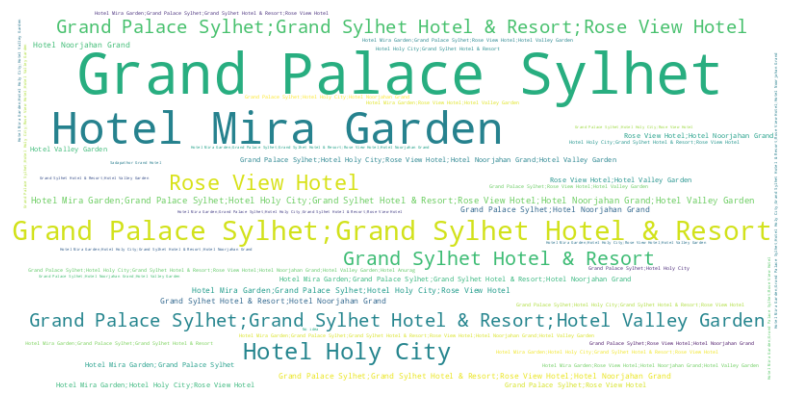

In [36]:
# Filter records where District is 'Sylhet'
sylhet_df = df[df['District'] == 'Sylhet']

# Extract the 'Resorts/Hotels' column and split the values into lists
hotel_list = sylhet_df['Hotel/Resort'].str.split(',', expand=True).stack().reset_index(drop=True)

# Count the occurrences of each hotel
hotel_counts = Counter(hotel_list)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(hotel_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Top 5 most expensive Resorts/Hotels in Sylhet:
                                          Hotel/Resort  Cleaned Cost
456  Hotel Mira Garden;Grand Palace Sylhet;Hotel Ho...        5500.0
460                                Grand Palace Sylhet        5500.0
462  Hotel Mira Garden;Hotel Holy City;Rose View Ho...        5500.0
469                        Grand Sylhet Hotel & Resort        5500.0
482  Grand Sylhet Hotel & Resort;Hotel Noorjahan Grand        5500.0

Top 5 least expensive Hotel/Resort in Sylhet:
                                          Hotel/Resort  Cleaned Cost
372                                Grand Palace Sylhet        2250.0
374                                Grand Palace Sylhet        2250.0
375          Grand Palace Sylhet;Hotel Noorjahan Grand        2250.0
380  Grand Palace Sylhet;Hotel Holy City;Hotel Noor...        2250.0
386  Hotel Holy City;Grand Sylhet Hotel & Resort;Ro...        2250.0


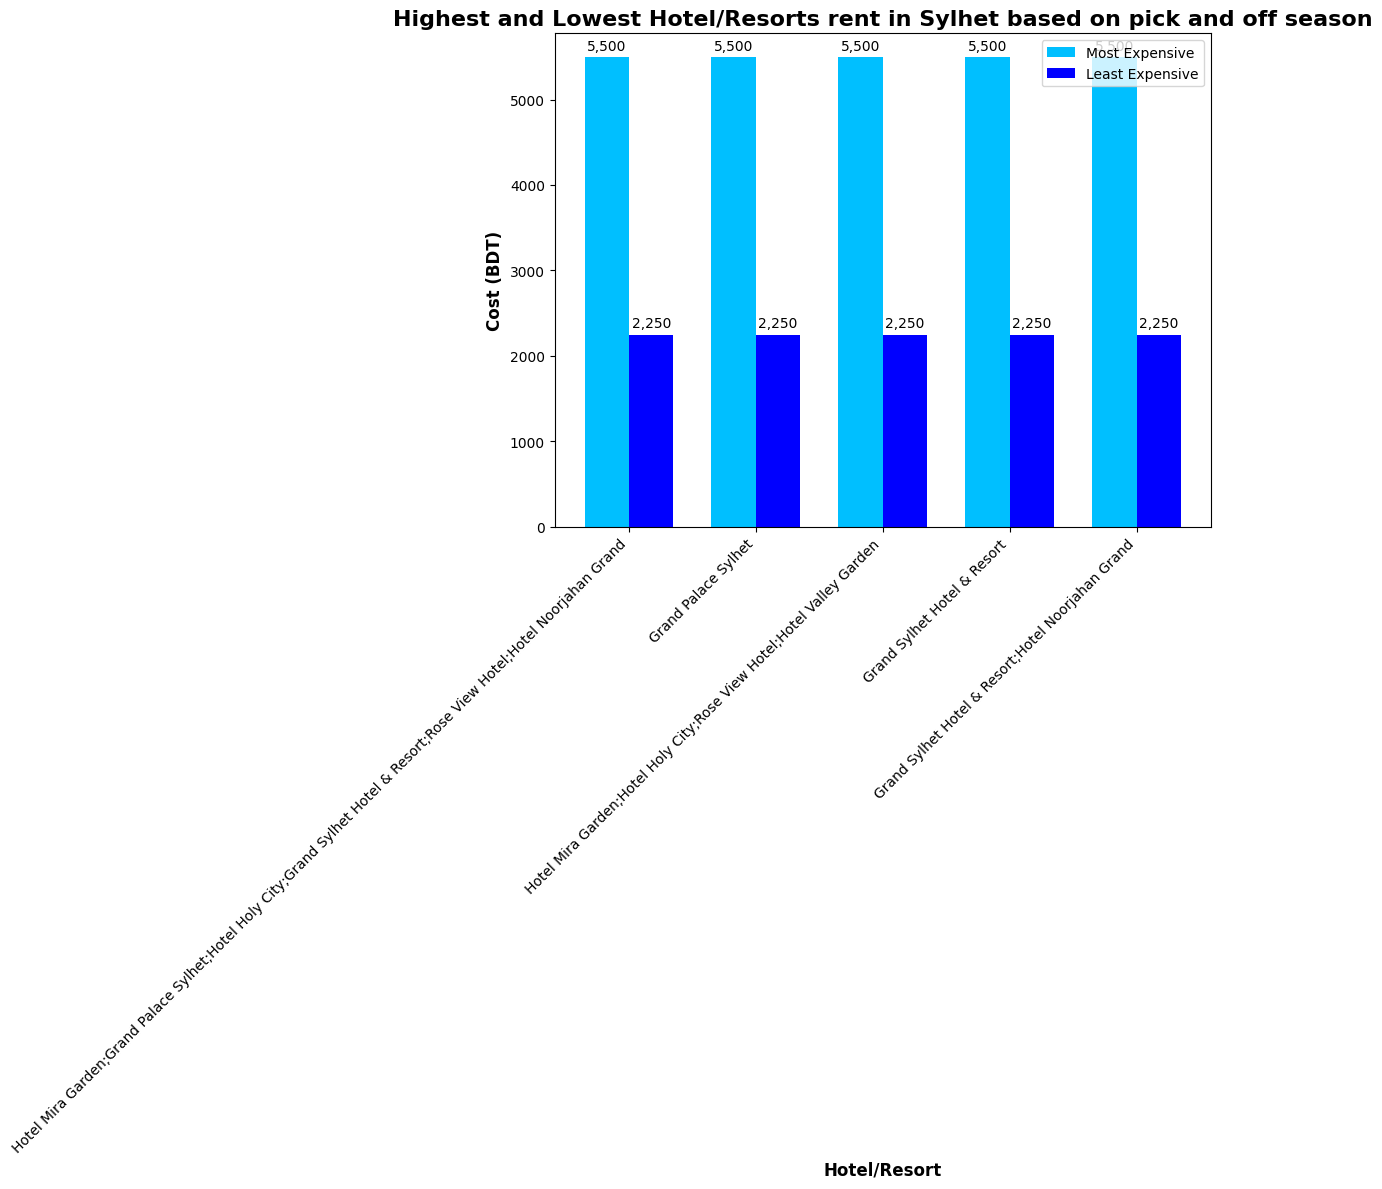

Visualization saved as 'top_5_resorts_sylhet.png'


<Figure size 640x480 with 0 Axes>

In [37]:
# Filter for Sylhet and get top 5 expensive resorts/hotels
sylhet_resorts = df[df['District'] == 'Sylhet']
top_5_expensive = sylhet_resorts.nlargest(5, 'Cleaned Cost')

# Filter for Sylhet and get top 5 least expensive resorts/hotels
top_5_cheap = sylhet_resorts.nsmallest(5, 'Cleaned Cost')

print("Top 5 most expensive Resorts/Hotels in Sylhet:")
print(top_5_expensive[['Hotel/Resort', 'Cleaned Cost']])

print("\nTop 5 least expensive Hotel/Resort in Sylhet:")
print(top_5_cheap[['Hotel/Resort', 'Cleaned Cost']])

# Prepare data for visualization
resorts_expensive = top_5_expensive['Hotel/Resort']
costs_expensive = top_5_expensive['Cleaned Cost']
resorts_cheap = top_5_cheap['Hotel/Resort']
costs_cheap = top_5_cheap['Cleaned Cost']

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(12, 12))
bar_width = 0.35
index = range(len(resorts_expensive))

bar1 = ax.bar(index, costs_expensive, bar_width, label='Most Expensive', color='#00BFFF')
bar2 = ax.bar([i + bar_width for i in index], costs_cheap, bar_width, label='Least Expensive', color='#0000FF')

ax.set_title('Highest and Lowest Hotel/Resorts rent in Sylhet based on pick and off season', fontsize=16, fontweight='bold')
ax.set_xlabel('Hotel/Resort', fontsize=12, fontweight='bold')
ax.set_ylabel('Cost (BDT)', fontsize=12, fontweight='bold')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(resorts_expensive, rotation=45, ha='right')
ax.legend()

# Add cost labels to the bars
for bar in bar1 + bar2:
    height = bar.get_height()
    ax.annotate(f'{height:,.0f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Save the plot as an HTML file
plt.savefig('top_5_resorts_sylhet.png', dpi=300, bbox_inches='tight')
print("Visualization saved as 'top_5_resorts_sylhet.png'")

# HTML formatted explanation in Bangla with inline CSS
explanation_html = """
<div style="color:blue; font-size:18px; font-family:Tahoma;">
    <ul>
        <li>এই বার চার্টে সিলেটের জন্য সবচেয়ে বেশি খরচের ও সবচেয়ে কম খরচের ৫টি রেসোর্ট/হোটেল প্রদর্শিত করা হয়েছে।</li>
        <li>বাম পাশের বারগুলি সবচেয়ে বেশি খরচের রেসোর্ট/হোটেলগুলি প্রতিনিধিত্ব করে, এবং ডান পাশের বারগুলি সবচেয়ে কম খরচের রেসোর্ট/হোটেলগুলি প্রতিনিধিত্ব করে।</li>
        <li>এই তথ্যটি ভ্রমণকারীদের কাছে বাজেট ভ্রমণের জন্য সহায়ক হতে পারে।</li>
    </ul>
    <h3 style="color:blue; font-size:20px; font-family:Tahoma;">সারসংক্ষেপ:</h3>
    <p>এই চার্ট থেকে দেখা যাচ্ছে যে সিলেটের কিছু রেসোর্ট/হোটেলের খরচ উল্লেখযোগ্যভাবে বেশি, এবং কিছু রেসোর্ট/হোটেলের খরচ উল্লেখযোগ্যভাবে কম। এটি ভ্রমণকারীদের কম বাজেটে ভ্রমণ পরিকল্পনা করতে সাহায্য করবে।</p>
    <h3 style="color:blue; font-size:20px; font-family:Tahoma;">গুরুত্বপূর্ণ কার্যকর অন্তর্দৃষ্টি:</h3>
    <p>যারা কম খরচে ভ্রমণ করতে চান, তারা এই কম খরচের রেসোর্ট/হোটেলগুলির দিকে নজর দিতে পারেন। এই স্থানগুলির খরচ তুলনামূলকভাবে কম হওয়ায়, এটি বাজেট ভ্রমণকারীদের জন্য ভালো বিকল্প। যারা বেশি খরচে ভ্রমণ করতে চান, তারা এই বেশি খরচের রেসোর্ট/হোটেলগুলির দিকে নজর দিতে পারেন। এই স্থানগুলির খরচ তুলনামূলকভাবে বেশি হওয়ায়, এটি বেশি বাজেটে ভ্রমণকারীদের জন্য ভালো বিকল্প।</p>
</div>
"""

# Display the explanation in the notebook
display(HTML(explanation_html))

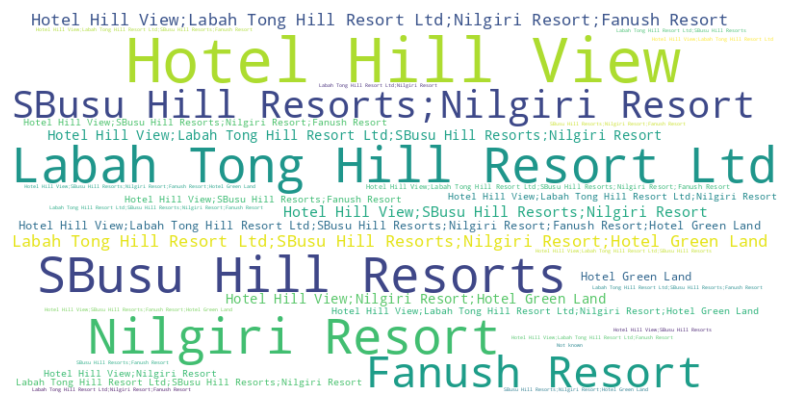

In [38]:
# Filter records where District is 'Bandarban'
bandarban_df = df[df['District'] == 'Bandarban']

# Extract the 'Resorts/Hotels' column and split the values into lists
hotel_list = bandarban_df['Hotel/Resort'].str.split(',', expand=True).stack().reset_index(drop=True)

# Count the occurrences of each hotel
hotel_counts = Counter(hotel_list)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(hotel_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Top 5 most expensive Resorts/Hotels in Bandarban:
                                          Hotel/Resort  Cleaned Cost
137                                     Nilgiri Resort        5500.0
141  Hotel Hill View;SBusu Hill Resorts;Nilgiri Resort        5500.0
149                                    Hotel Hill View        5500.0
150    Hotel Hill View;Nilgiri Resort;Hotel Green Land        5500.0
151  Labah Tong Hill Resort Ltd;SBusu Hill Resorts;...        5500.0

Top 5 least expensive Resorts/Hotels in Bandarban:
                                          Hotel/Resort  Cleaned Cost
138                  SBusu Hill Resorts;Nilgiri Resort        2500.0
139                                     Nilgiri Resort        2500.0
142                 Hotel Hill View;SBusu Hill Resorts        2500.0
143  Hotel Hill View;SBusu Hill Resorts;Nilgiri Resort        2500.0
145                  SBusu Hill Resorts;Nilgiri Resort        2500.0


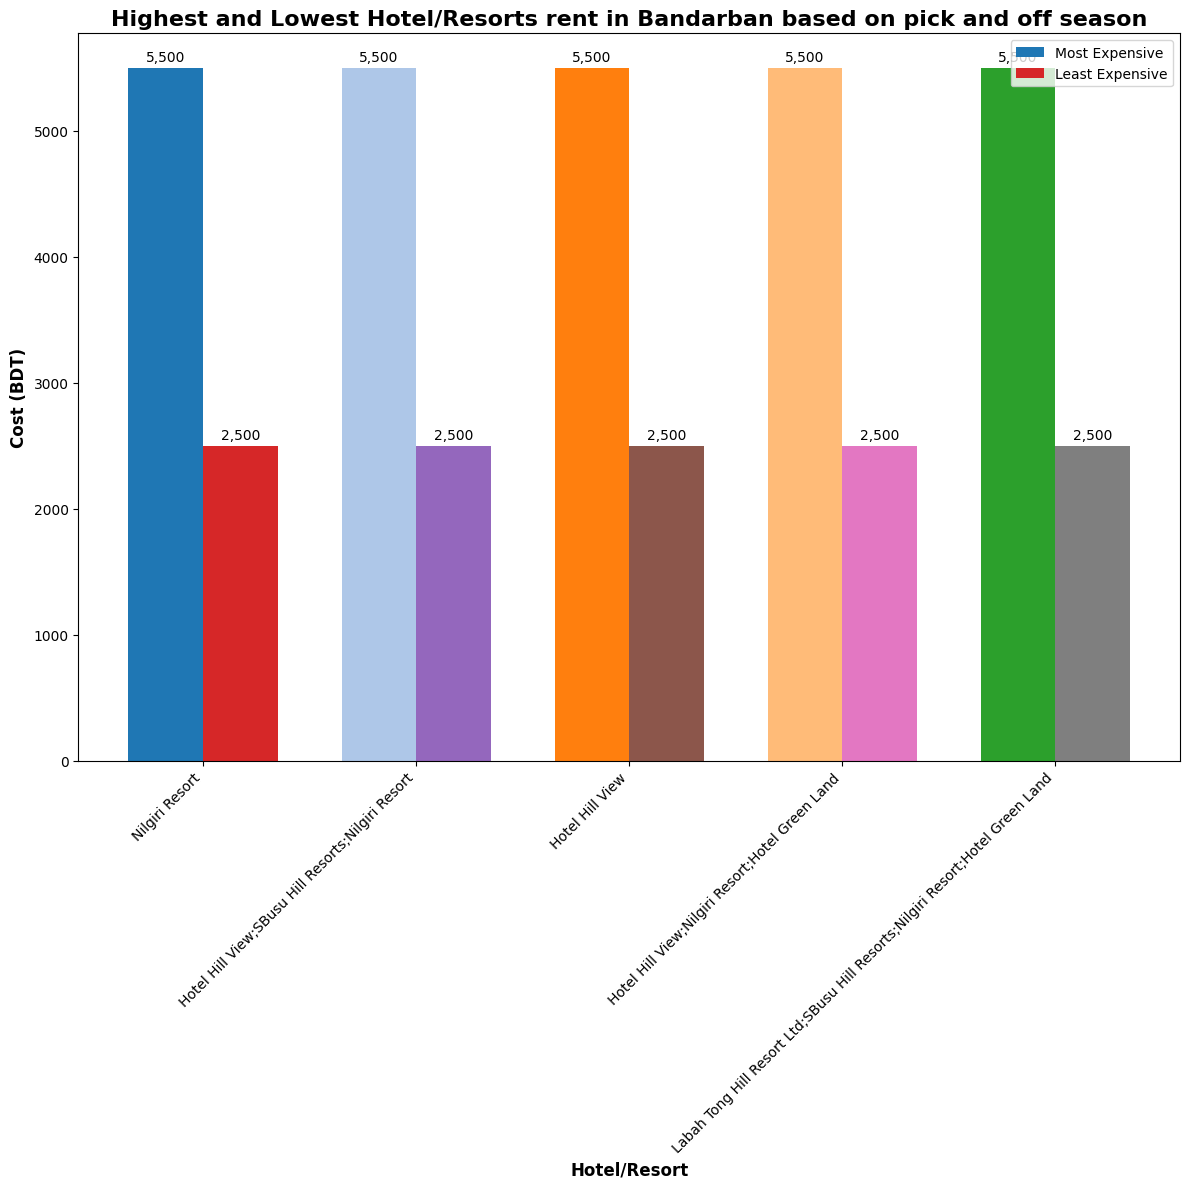

Visualization saved as 'top_5_resorts_bandarban.png'


<Figure size 640x480 with 0 Axes>

In [39]:
# Filter for Bandarban and get top 5 expensive resorts/hotels
bandarban_resorts = df[df['District'] == 'Bandarban']
top_5_expensive = bandarban_resorts.nlargest(5, 'Cleaned Cost')

# Filter for Bandarban and get top 5 least expensive resorts/hotels
top_5_cheap = bandarban_resorts.nsmallest(5, 'Cleaned Cost')

print("Top 5 most expensive Resorts/Hotels in Bandarban:")
print(top_5_expensive[['Hotel/Resort', 'Cleaned Cost']])

print("\nTop 5 least expensive Resorts/Hotels in Bandarban:")
print(top_5_cheap[['Hotel/Resort', 'Cleaned Cost']])

# Prepare data for visualization
resorts_expensive = top_5_expensive['Hotel/Resort']
costs_expensive = top_5_expensive['Cleaned Cost']
resorts_cheap = top_5_cheap['Hotel/Resort']
costs_cheap = top_5_cheap['Cleaned Cost']

# Define unique colors for each bar group
colors_expensive = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c']
colors_cheap = ['#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(12, 12))
bar_width = 0.35
index = range(len(resorts_expensive))

bar1 = ax.bar(index, costs_expensive, bar_width, label='Most Expensive', color=colors_expensive)
bar2 = ax.bar([i + bar_width for i in index], costs_cheap, bar_width, label='Least Expensive', color=colors_cheap)

ax.set_title('Highest and Lowest Hotel/Resorts rent in Bandarban based on pick and off season', fontsize=16, fontweight='bold')
ax.set_xlabel('Hotel/Resort', fontsize=12, fontweight='bold')
ax.set_ylabel('Cost (BDT)', fontsize=12, fontweight='bold')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(resorts_expensive, rotation=45, ha='right')
ax.legend()

# Add cost labels to the bars
for bar in bar1 + bar2:
    height = bar.get_height()
    ax.annotate(f'{height:,.0f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Save the plot as an HTML file
plt.savefig('top_5_resorts_bandarban.png', dpi=300, bbox_inches='tight')
print("Visualization saved as 'top_5_resorts_bandarban.png'")

Top 5 most expensive Resorts/Hotels in Khagrachari:
                                    Hotel/Resort  Cleaned Cost
17                   Khagrachhari Parjatan Motel          5500
18  Khagrachhari Parjatan Motel;Monu Adom Resort          5500
24                              Monu Adom Resort          5500
25                   Khagrachhari Parjatan Motel          5500
42       Khagrachhari Parjatan Motel;Borno Resot          5500

Top 5 least expensive Resorts/Hotels in Khagrachari:
                                         Hotel/Resort  Cleaned Cost
3   Khagrachhari Parjatan Motel;Monu Adom Resort;B...          2500
5                         Khagrachhari Parjatan Motel          2500
6                                         Borno Resot          2500
12                        Khagrachhari Parjatan Motel          2500
13                                   Monu Adom Resort          2500


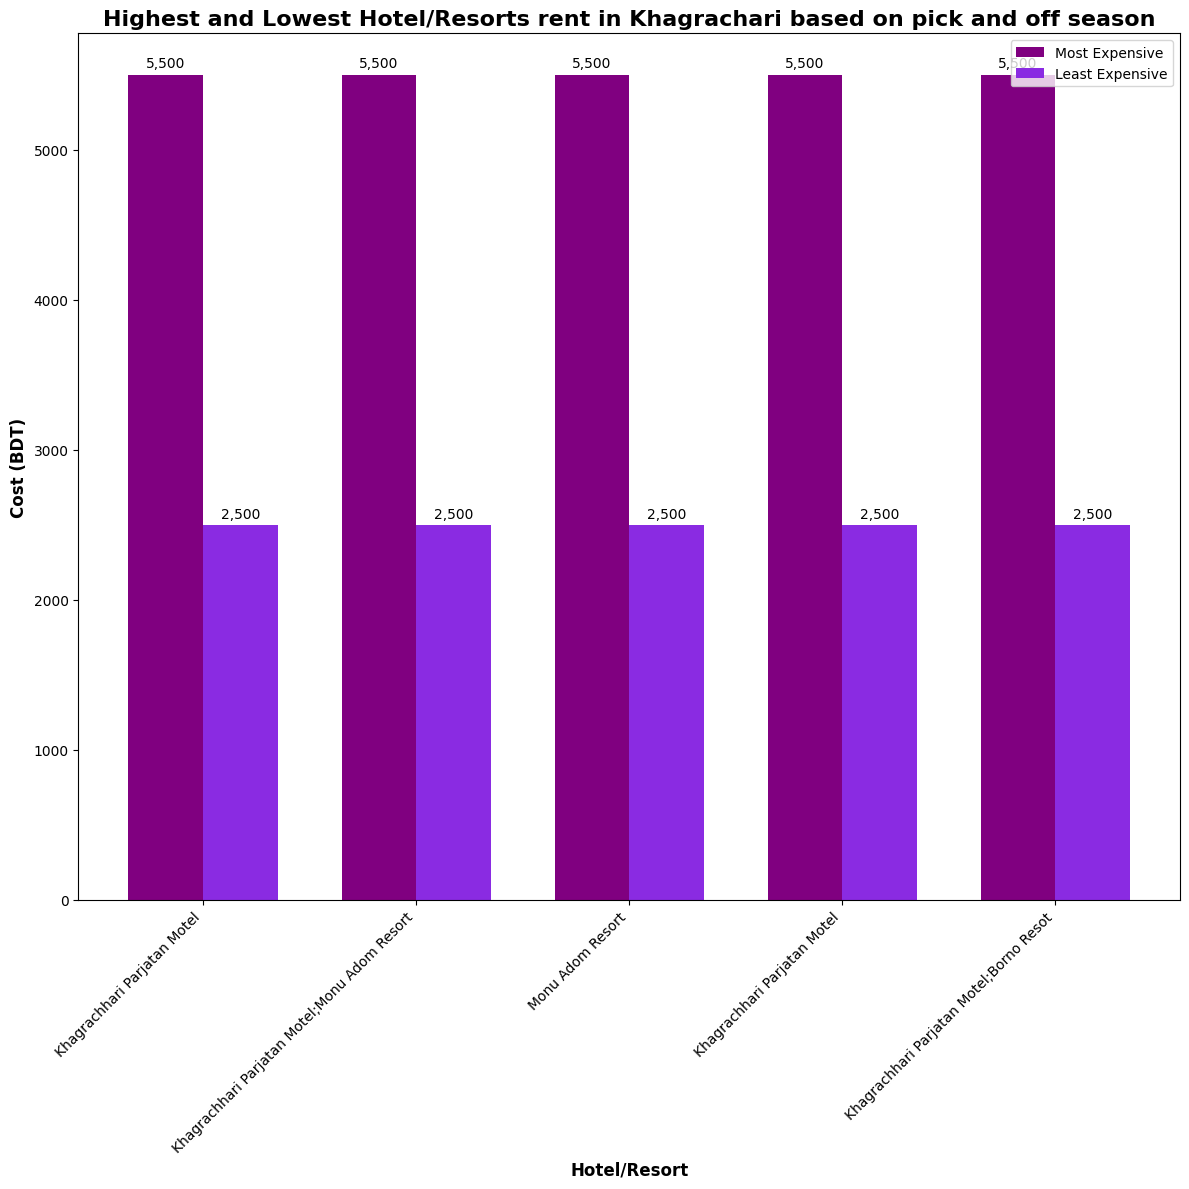

Visualization saved as 'top_5_resorts_khagrachari.png'


<Figure size 640x480 with 0 Axes>

In [40]:
# Load the dataset
df = pd.read_excel('Cleaned_Tourist_Dataset_with_Costs.xlsx')

# Filter for Khagrachari and get top 5 expensive resorts/hotels
khagrachari_resorts = df[df['District'] == 'Khagrachhari']
top_5_expensive = khagrachari_resorts.nlargest(5, 'Cleaned Cost')

# Filter for Khagrachari and get top 5 least expensive resorts/hotels
top_5_cheap = khagrachari_resorts.nsmallest(5, 'Cleaned Cost')

print("Top 5 most expensive Resorts/Hotels in Khagrachari:")
print(top_5_expensive[['Hotel/Resort', 'Cleaned Cost']])

print("\nTop 5 least expensive Resorts/Hotels in Khagrachari:")
print(top_5_cheap[['Hotel/Resort', 'Cleaned Cost']])

# Prepare data for visualization
resorts_expensive = top_5_expensive['Hotel/Resort']
costs_expensive = top_5_expensive['Cleaned Cost']
resorts_cheap = top_5_cheap['Hotel/Resort']
costs_cheap = top_5_cheap['Cleaned Cost']

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(12, 12))
bar_width = 0.35
index = range(len(resorts_expensive))

# Define colors for the bars
colors_expensive = ['#800080', '#800080', '#800080', '#800080', '#800080']
colors_cheap = ['#8A2BE2', '#8A2BE2', '#8A2BE2', '#8A2BE2', '#8A2BE2']

bar1 = ax.bar(index, costs_expensive, bar_width, label='Most Expensive', color=colors_expensive)
bar2 = ax.bar([i + bar_width for i in index], costs_cheap, bar_width, label='Least Expensive', color=colors_cheap)

ax.set_title('Highest and Lowest Hotel/Resorts rent in Khagrachari based on pick and off season', fontsize=16, fontweight='bold')
ax.set_xlabel('Hotel/Resort', fontsize=12, fontweight='bold')
ax.set_ylabel('Cost (BDT)', fontsize=12, fontweight='bold')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(resorts_expensive, rotation=45, ha='right')
ax.legend()

# Add cost labels to the bars
for bar in bar1 + bar2:
    height = bar.get_height()
    ax.annotate(f'{height:,.0f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Save the plot as an HTML file
plt.savefig('top_5_resorts_khagrachari.png', dpi=300, bbox_inches='tight')
print("Visualization saved as 'top_5_resorts_khagrachari.png'")

# HTML formatted explanation in Bangla with inline CSS
explanation_html = """
<div style="color:blue; font-size:18px; font-family:Tahoma;">
    <ul>
        <li>এই বার চার্টে খাগরাচারির জন্য সবচেয়ে বেশি খরচের ও সবচেয়ে কম খরচের ৫টি রেসোর্ট/হোটেল প্রদর্শিত করা হয়েছে।</li>
        <li>বাম পাশের বারগুলি সবচেয়ে বেশি খরচের রেসোর্ট/হোটেলগুলি প্রতিনিধিত্ব করে, এবং ডান পাশের বারগুলি সবচেয়ে কম খরচের রেসোর্ট/হোটেলগুলি প্রতিনিধিত্ব করে।</li>
        <li>এই তথ্যটি ভ্রমণকারীদের কাছে বাজেট ভ্রমণের জন্য সহায়ক হতে পারে।</li>
    </ul>
    <h3 style="color:blue; font-size:20px; font-family:Tahoma;">সারসংক্ষেপ:</h3>
    <p>এই চার্ট থেকে দেখা যাচ্ছে যে খাগরাচারির কিছু রেসোর্ট/হোটেলের খরচ উল্লেখযোগ্যভাবে বেশি, এবং কিছু রেসোর্ট/হোটেলের খরচ উল্লেখযোগ্যভাবে কম। এটি ভ্রমণকারীদের কম বাজেটে ভ্রমণ পরিকল্পনা করতে সাহায্য করবে।</p>
    <h3 style="color:blue; font-size:20px; font-family:Tahoma;">গুরুত্বপূর্ণ কার্যকর অন্তর্দৃষ্টি:</h3>
    <p>যারা কম খরচে ভ্রমণ করতে চান, তারা এই কম খরচের রেসোর্ট/হোটেলগুলির দিকে নজর দিতে পারেন। এই স্থানগুলির খরচ তুলনামূলকভাবে কম হওয়ায়, এটি বাজেট ভ্রমণকারীদের জন্য ভালো বিকল্প। যারা বেশি খরচে ভ্রমণ করতে চান, তারা এই বেশি খরচের রেসোর্ট/হোটেলগুলির দিকে নজর দিতে পারেন। এই স্থানগুলির খরচ তুলনামূলকভাবে বেশি হওয়ায়, এটি বেশি বাজেটে ভ্রমণকারীদের জন্য ভালো বিকল্প।</p>
</div>
"""

# Display the explanation in the notebook
display(HTML(explanation_html))

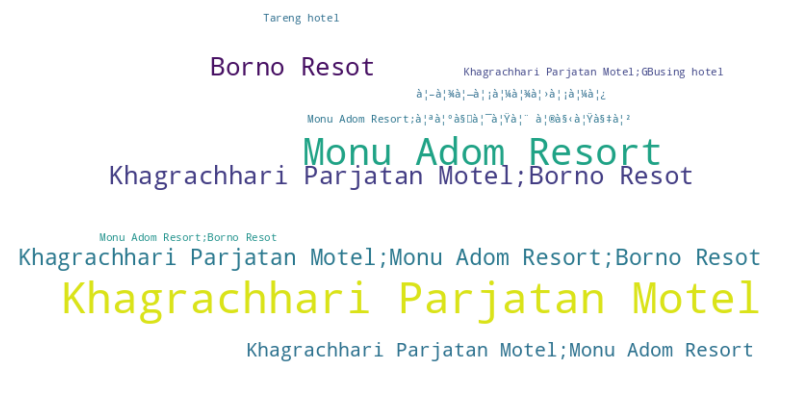

In [41]:
# Filter records where District is 'Khagrachhari'
khagrachhari_df = df[df['District'] == 'Khagrachhari']

# Extract the 'Resorts/Hotels' column and split the values into lists
hotel_list = khagrachhari_df['Hotel/Resort'].str.split(',', expand=True).stack().reset_index(drop=True)

# Count the occurrences of each hotel
hotel_counts = Counter(hotel_list)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(hotel_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Top 5 most expensive Resorts/Hotels in Rangamati:
                                          Hotel/Resort  Cleaned Cost
246                 Aronnok & Lakeshore Holiday Resort          3250
247                                    Hill Taj Resort          3250
258  Hotel Nadisa International.;Megh Kabbo Hilltop...          3250
267        Hotel Nadisa International.;Hill Taj Resort          3250
294                         Megh Kabbo Hilltop Cottage          3250

Top 5 least expensive Resorts/Hotels in Rangamati:
                                          Hotel/Resort  Cleaned Cost
232                         Megh Kabbo Hilltop Cottage          2250
233                 Aronnok & Lakeshore Holiday Resort          2250
234                         Megh Kabbo Hilltop Cottage          2250
235  Aronnok & Lakeshore Holiday Resort;Parjatan Ho...          2250
236  Parjatan Holiday Complex;Megh Kabbo Hilltop Co...          2250


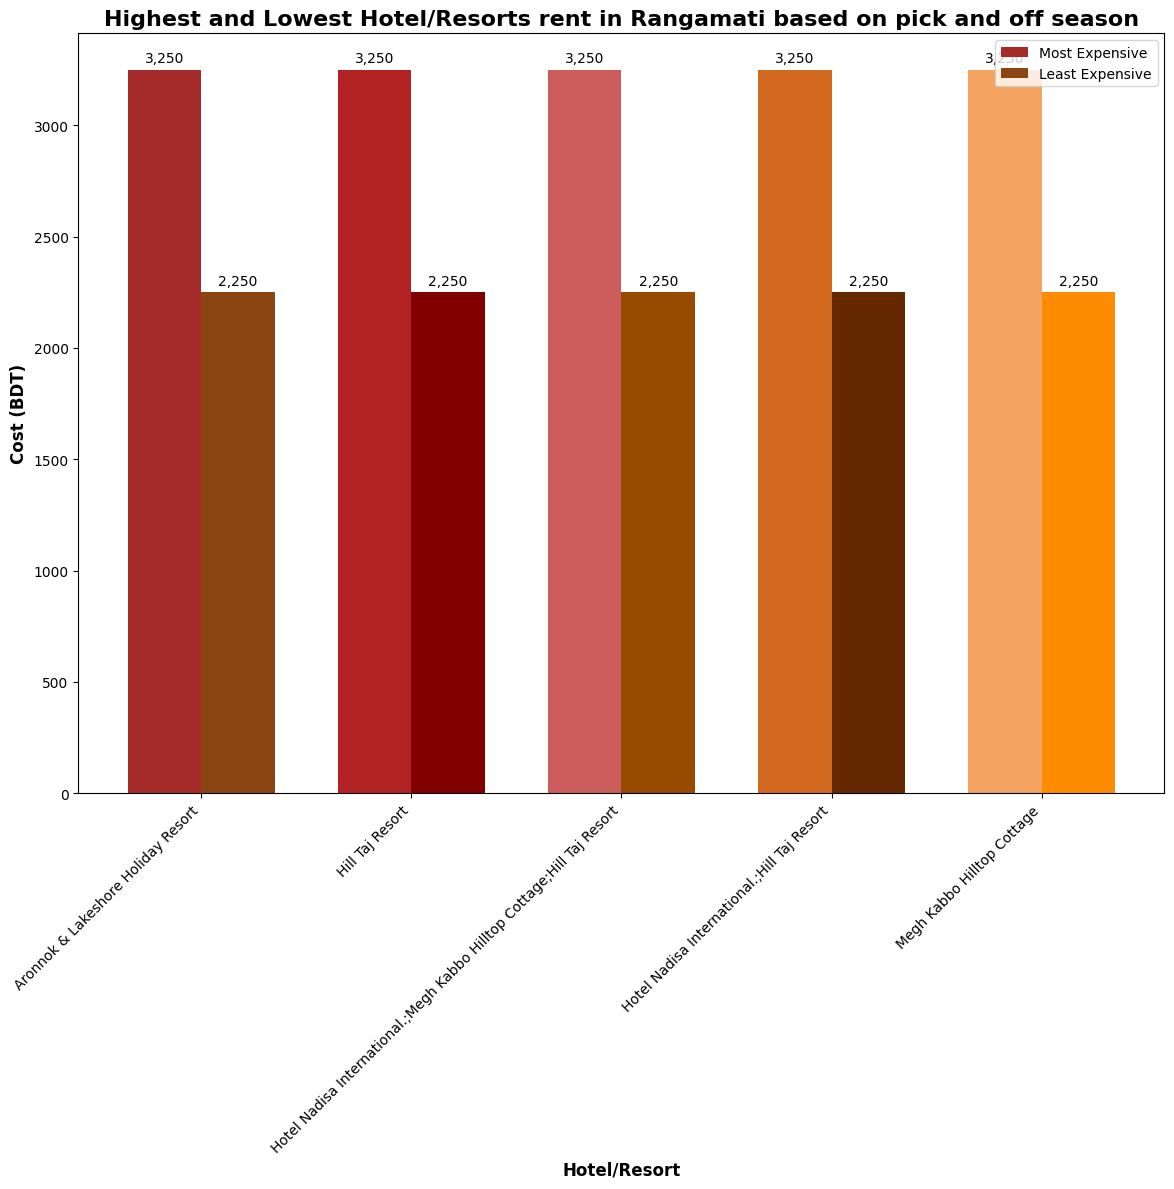

Visualization saved as 'top_5_resorts_rangamati.png'


<Figure size 640x480 with 0 Axes>

In [42]:
# Filter for Rangamati and get top 5 expensive resorts/hotels
rangamati_resorts = df[df['District'] == 'Rangamati']
top_5_expensive = rangamati_resorts.nlargest(5, 'Cleaned Cost')

# Filter for Rangamati and get top 5 least expensive resorts/hotels
top_5_cheap = rangamati_resorts.nsmallest(5, 'Cleaned Cost')

print("Top 5 most expensive Resorts/Hotels in Rangamati:")
print(top_5_expensive[['Hotel/Resort', 'Cleaned Cost']])

print("\nTop 5 least expensive Resorts/Hotels in Rangamati:")
print(top_5_cheap[['Hotel/Resort', 'Cleaned Cost']])

# Prepare data for visualization
resorts_expensive = top_5_expensive['Hotel/Resort']
costs_expensive = top_5_expensive['Cleaned Cost']
resorts_cheap = top_5_cheap['Hotel/Resort']
costs_cheap = top_5_cheap['Cleaned Cost']

# Define brick color shades for each bar group
brick_colors_expensive = ['#A52A2A', '#B22222', '#CD5C5C', '#D2691E', '#F4A460']
brick_colors_cheap = ['#8B4513', '#800000', '#964B00', '#652800', '#FF8C00']

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(12, 12))
bar_width = 0.35
index = range(len(resorts_expensive))

bar1 = ax.bar(index, costs_expensive, bar_width, label='Most Expensive', color=brick_colors_expensive)
bar2 = ax.bar([i + bar_width for i in index], costs_cheap, bar_width, label='Least Expensive', color=brick_colors_cheap)

ax.set_title('Highest and Lowest Hotel/Resorts rent in Rangamati based on pick and off season', fontsize=16, fontweight='bold')
ax.set_xlabel('Hotel/Resort', fontsize=12, fontweight='bold')
ax.set_ylabel('Cost (BDT)', fontsize=12, fontweight='bold')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(resorts_expensive, rotation=45, ha='right')
ax.legend()

# Add cost labels to the bars
for bar in bar1 + bar2:
    height = bar.get_height()
    ax.annotate(f'{height:,.0f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Save the plot as an HTML file
plt.savefig('top_5_resorts_rangamati.png', dpi=300, bbox_inches='tight')
print("Visualization saved as 'top_5_resorts_rangamati.png'")

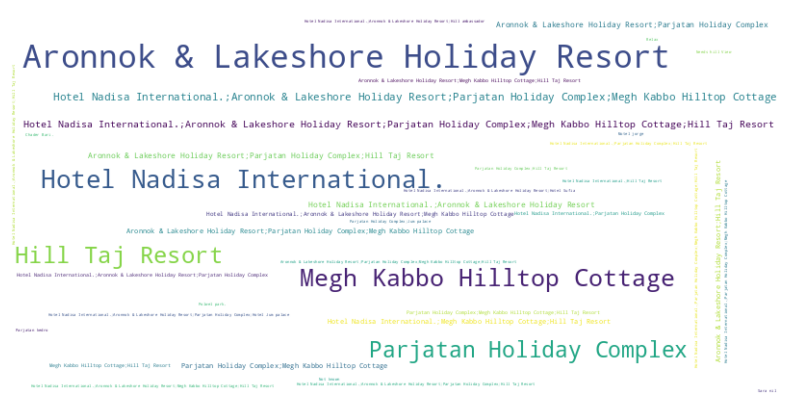

In [43]:
# Load the dataset
df = pd.read_excel('Cleaned_Tourist_Chatbot_Dataset.xlsx')

# Filter records where District is 'Rangamati'
rangamati_df = df[df['District'] == 'Rangamati']

# Extract the 'Resorts/Hotels' column and split the values into lists
hotel_list = rangamati_df['Hotel/Resort'].str.split(',', expand=True).stack().reset_index(drop=True)

# Count the occurrences of each hotel
hotel_counts = Counter(hotel_list)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(hotel_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

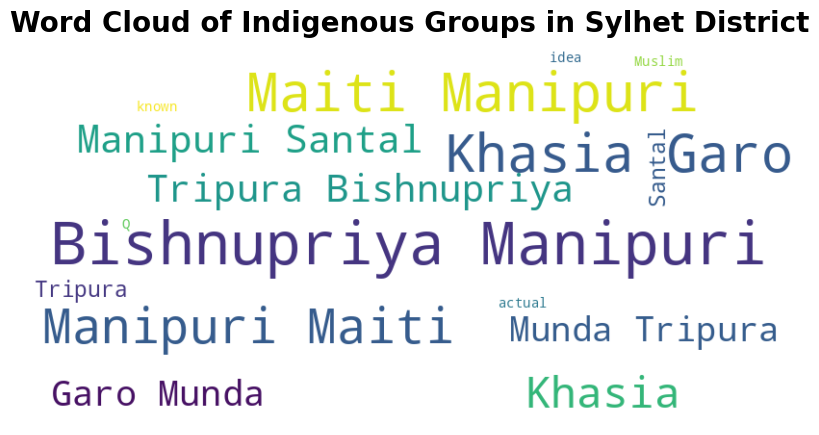

In [44]:
# Load the dataset
file_path = 'Cleaned_Tourist_Chatbot_Dataset.xlsx'
df = pd.read_excel(file_path)

# Filter records for the Sylhet district
sylhet_data = df[df['District'] == 'Sylhet']

# Extract the indigenous groups
indigenous_groups_sylhet = ' '.join(sylhet_data['Indigenous Group'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(indigenous_groups_sylhet)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Indigenous Groups in Sylhet District', fontsize=20, fontweight='bold')
plt.show()

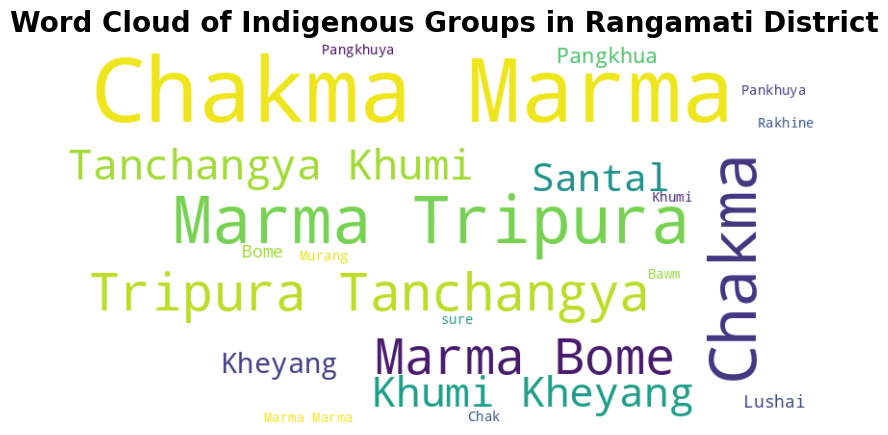

In [45]:
# Filter records for the Rangamati district
rangamati_data = df[df['District'] == 'Rangamati']

# Extract the indigenous groups
indigenous_groups_rangamati = ' '.join(rangamati_data['Indigenous Group'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(indigenous_groups_rangamati)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Indigenous Groups in Rangamati District', fontsize=20, fontweight='bold')
plt.show()

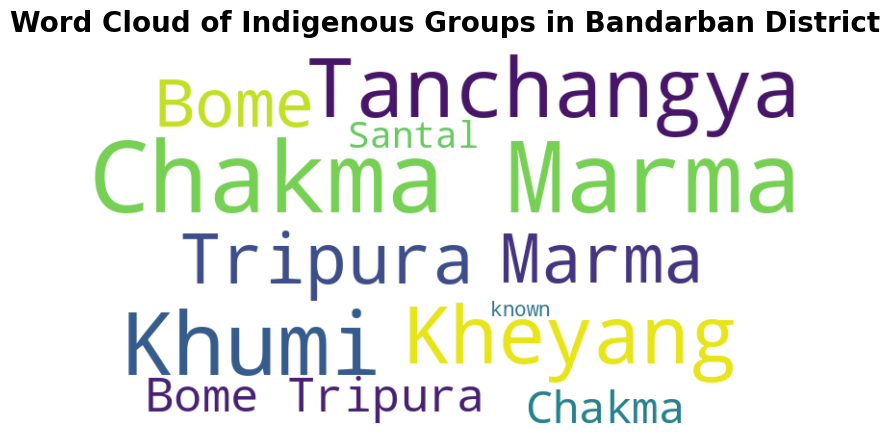

In [46]:
# Filter records for the Bandarban district
bandarban_data = df[df['District'] == 'Bandarban']

# Extract the indigenous groups
indigenous_groups_bandarban = ' '.join(bandarban_data['Indigenous Group'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(indigenous_groups_bandarban)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Indigenous Groups in Bandarban District', fontsize=20, fontweight='bold')
plt.show()

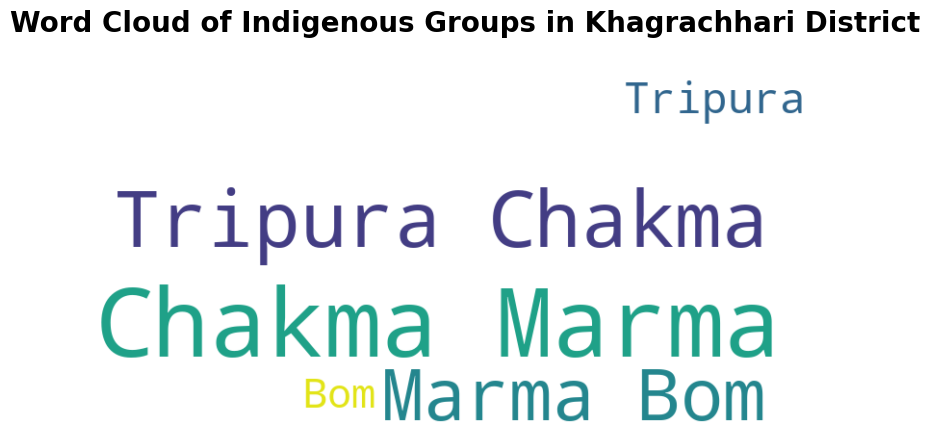

In [47]:
# Filter records for the Khagrachhari district
khagrachhari_data = df[df['District'] == 'Khagrachhari']

# Extract the indigenous groups
indigenous_groups_khagrachhari = ' '.join(khagrachhari_data['Indigenous Group'].dropna())

# Generate the word cloud with a colorful background
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(indigenous_groups_khagrachhari)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Indigenous Groups in Khagrachhari District', fontsize=20, fontweight='bold')
plt.show()

In [48]:
# Print the column names to verify
print(df.columns)

# Correct the column names if necessary
# For example, if the actual column name is 'Traditional Dress/shop' instead of 'Traditional dress/shop'
# Replace 'Traditional dress/shop' with the correct column name

Index(['SL No', 'Name', 'Age', 'District', 'Vehicle', 'Travel Time',
       ' How much time need to travel from Dhaka to Khagrachhari by bus?',
       'Season', 'Tourist Spots', 'Similar Tourist Spots', 'Hotel/Resort',
       'Restaurants', 'Traditional Foods', 'Indigenous Group',
       'Maximum cost (per day)'],
      dtype='object')


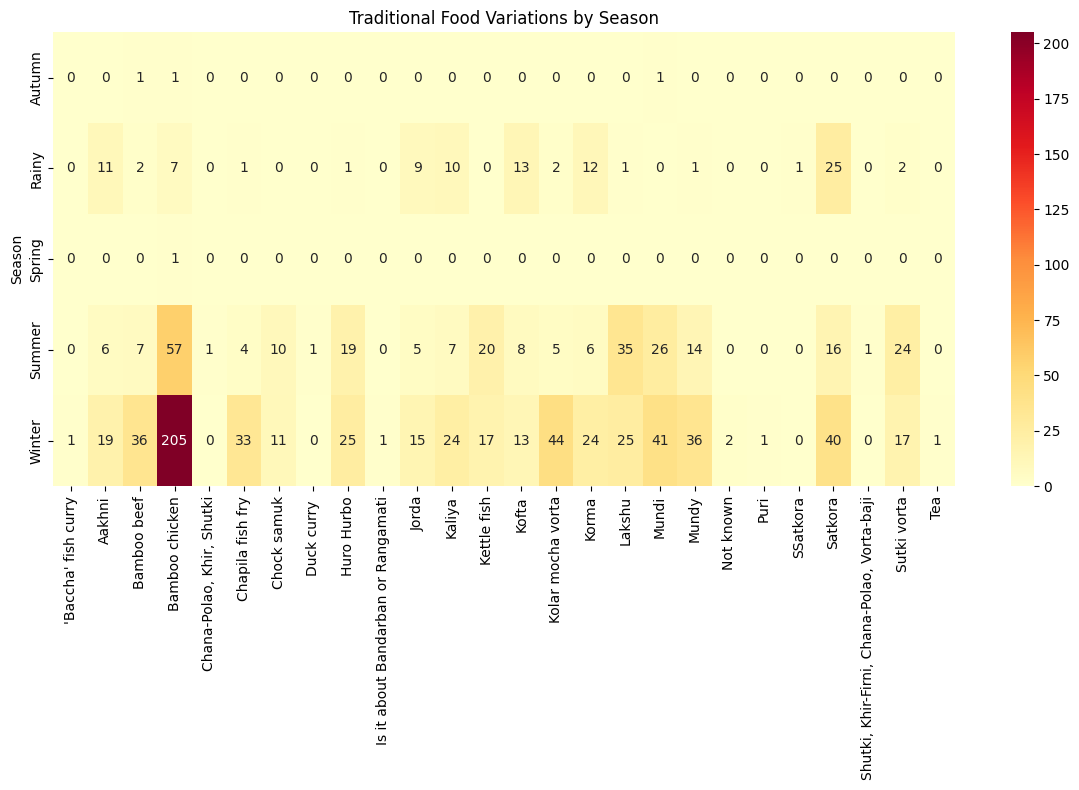

In [49]:
# Function to count unique items in a column
def count_unique_items(column):
    return column.str.split(';').explode().value_counts()

# Traditional Food by District
food_by_district = df.groupby('District')['Traditional Foods'].apply(count_unique_items).unstack().fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(food_by_district, cmap='YlOrRd', annot=True, fmt='g')
plt.title('Traditional Food Variations by District')
plt.tight_layout()
plt.savefig('food_by_district.png')
plt.close()


# Traditional Food by Season
food_by_season = df.groupby('Season')['Traditional Foods'].apply(count_unique_items).unstack().fillna(0)
plt.figure(figsize=(12, 8))
sns.heatmap(food_by_season, cmap='YlOrRd', annot=True, fmt='g')
plt.title('Traditional Food Variations by Season')
plt.tight_layout()
plt.savefig('food_by_season.png')

plt.show ()

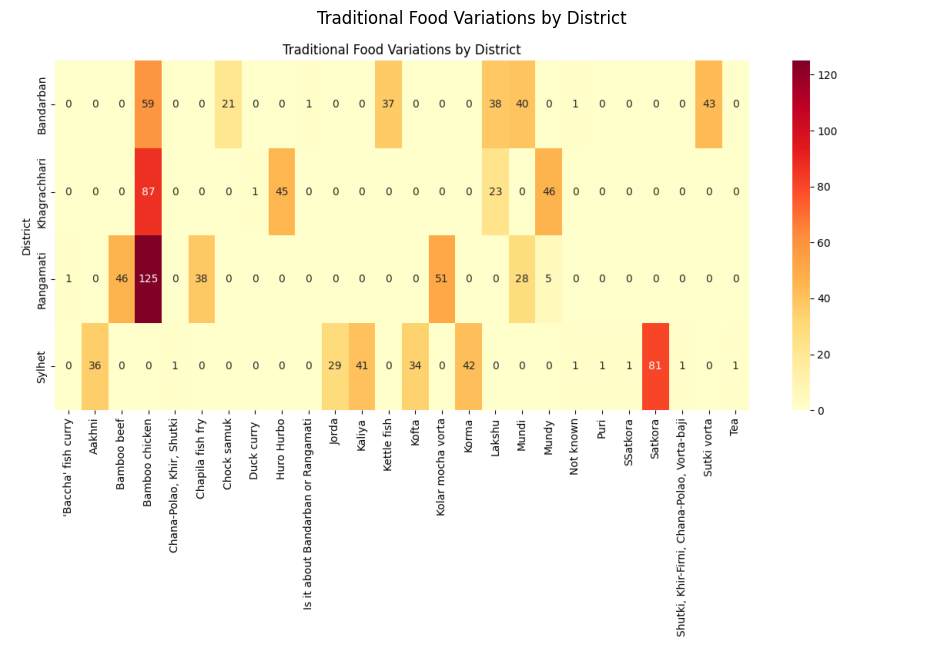

Most popular traditional food in each district:
District
Bandarban       Bamboo chicken
Khagrachhari    Bamboo chicken
Rangamati       Bamboo chicken
Sylhet                 Satkora
dtype: object
District with the most diverse food options: Rangamati
Number of unique traditional foods: 294.0


In [50]:
# Load the saved image
img = plt.imread('food_by_district.png')

# Display the image
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.title('Traditional Food Variations by District')
plt.show()

# Analyze the heatmap
import pandas as pd
df = pd.read_excel('Cleaned_Tourist_Chatbot_Dataset.xlsx')
food_by_district = df.groupby('District')['Traditional Foods'].apply(lambda x: x.str.split(';').explode().value_counts()).unstack().fillna(0)

# Find the most popular food in each district
most_popular_food = food_by_district.idxmax(axis=1)
print("Most popular traditional food in each district:")
print(most_popular_food)

# Find the district with the most diverse food options
food_diversity = food_by_district.sum(axis=1)
most_diverse_district = food_diversity.idxmax()
print(f"\
District with the most diverse food options: {most_diverse_district}")
print(f"Number of unique traditional foods: {food_diversity[most_diverse_district]}")

In [51]:
import pandas as pd

# Load the dataset
file_path = 'Hill_Tracks_Dataset.xlsx'  # Update with your file path
data = pd.ExcelFile(file_path).parse('Sheet1')

# Inspect columns and data
print("Dataset Columns:")
print(data.columns)

# Display first few rows
print(data.head())
import re

# Function to clean and convert cost to numeric
def extract_numeric_value(cost):
    if isinstance(cost, str):
        numbers = re.findall(r'\d+', cost)
        if len(numbers) == 2:
            return (int(numbers[0]) + int(numbers[1])) / 2  # Average for ranges
        elif len(numbers) == 1:
            return int(numbers[0])  # Single value
    return cost

data['Maximum cost (per day)'] = data['Maximum cost (per day)'].apply(extract_numeric_value)
data['Maximum cost (per day)'] = pd.to_numeric(data['Maximum cost (per day)'], errors='coerce')
# Inspect unique values in Travel Time
print("Unique values in Travel Time before cleaning:", data['Travel Time'].unique())

# Mapping non-numeric travel times to numeric
travel_time_mapping = {
    'Night': 8,  # Example: Replace 'Night' with 8 hours
    'Day': 12,   # Example: Replace 'Day' with 12 hours
}

# Apply mapping and convert Travel Time to numeric
data['Travel Time'] = data['Travel Time'].replace(travel_time_mapping)
data['Travel Time'] = pd.to_numeric(data['Travel Time'], errors='coerce')

# Drop rows with missing or invalid values in Travel Time or Maximum cost (per day)
data = data.dropna(subset=['Travel Time', 'Maximum cost (per day)'])
from sklearn.cluster import KMeans

if 'Visitor Count' not in data.columns:
    print("Visitor Count column is missing. Creating a proxy using clustering...")
    kmeans = KMeans(n_clusters=4, random_state=42)
    data['Visitor_Count_Cluster'] = kmeans.fit_predict(data[['Travel Time', 'Maximum cost (per day)']])
    y_visitors = data['Visitor_Count_Cluster']
else:
    y_visitors = data['Visitor Count']
    # Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

# One-hot encoding for categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
# Features for cost and visitor count prediction
X_cost = data_encoded.drop(columns=['Maximum cost (per day)', 'Visitor Count', 'Visitor_Count_Cluster', 'SL No', 'Name'], errors='ignore')
y_cost = data_encoded['Maximum cost (per day)']

X_visitors = data_encoded.drop(columns=['Maximum cost (per day)', 'Visitor Count', 'Visitor_Count_Cluster', 'SL No', 'Name'], errors='ignore')


Dataset Columns:
Index(['SL No', 'Name', 'Age', 'District', 'Vehicle', 'Travel Time',
       ' How much time need to travel from Dhaka to Khagrachhari by bus?',
       'Season', 'Tourist Spots', 'Similar Tourist Spots', 'Hotel/Resort',
       'Restaurants', 'Traditional Foods', 'Indigenous Group',
       'Maximum cost (per day)'],
      dtype='object')
   SL No              Name  Age      District Vehicle Travel Time  \
0      1      Sajid Rahman   26  Khagrachhari     Bus       Night   
1      2      Nusrat Begum   36  Khagrachhari     Bus       Night   
2      3  Tanima Chowdhury   25  Khagrachhari     Bus       Night   
3      4      Tanima Karim   36  Khagrachhari     Bus       Night   
4      5      Rifat Sarker   27  Khagrachhari     Bus       Night   

   How much time need to travel from Dhaka to Khagrachhari by bus?  Season  \
0                                       9 - 10 hours                Winter   
1                                      11 - 12 hours                Winter

<ipython-input-51-390bff47f51e>:37: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [52]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Split data
X_train_cost, X_test_cost, y_train_cost, y_test_cost = train_test_split(X_cost, y_cost, test_size=0.2, random_state=42)

# Train Gradient Boosting Regressor
gbr_cost = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
gbr_cost.fit(X_train_cost, y_train_cost)

# Predict and evaluate
y_pred_cost = gbr_cost.predict(X_test_cost)
mse_cost = mean_squared_error(y_test_cost, y_pred_cost)
print(f"Cost Prediction RMSE: {np.sqrt(mse_cost)}")

# Split data
X_train_visitors, X_test_visitors, y_train_visitors, y_test_visitors = train_test_split(X_visitors, y_visitors, test_size=0.2, random_state=42)

# Train Gradient Boosting Regressor for visitor count prediction
gbr_visitors = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
gbr_visitors.fit(X_train_visitors, y_train_visitors)

# Predict and evaluate
y_pred_visitors = gbr_visitors.predict(X_test_visitors)
mse_visitors = mean_squared_error(y_test_visitors, y_pred_visitors)
print(f"Visitor Count Prediction RMSE: {np.sqrt(mse_visitors)}")

# Calculate total revenue
predicted_revenue = y_pred_cost * y_pred_visitors
print(f"Predicted Total Revenue (Sample Test Set): {predicted_revenue[:5]}")




Cost Prediction RMSE: 746.2894541987448
Visitor Count Prediction RMSE: 0.8949875487782752
Predicted Total Revenue (Sample Test Set): [ 117.29741318 6095.0811559  1836.1948596  5040.63300718 7119.70187992]


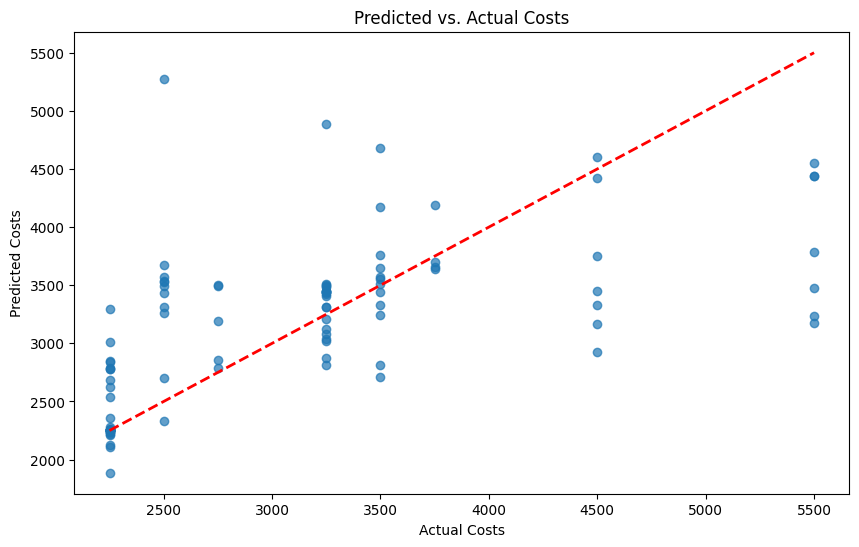

In [53]:
import matplotlib.pyplot as plt

# Plot Predicted vs. Actual Costs
plt.figure(figsize=(10, 6))
plt.scatter(y_test_cost, y_pred_cost, alpha=0.7)
plt.plot([y_test_cost.min(), y_test_cost.max()], [y_test_cost.min(), y_test_cost.max()], 'r--', lw=2)
plt.title('Predicted vs. Actual Costs')
plt.xlabel('Actual Costs')
plt.ylabel('Predicted Costs')
plt.show()


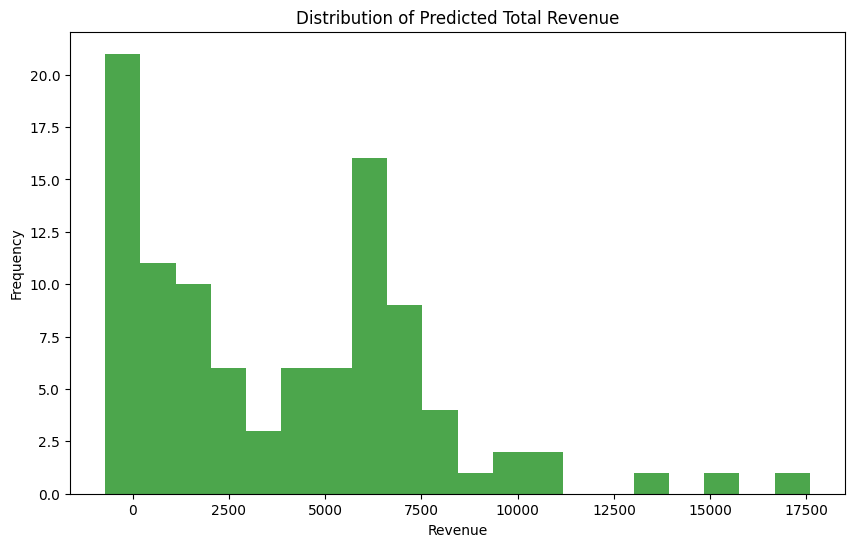

In [54]:
# Plot Total Revenue Distribution
plt.figure(figsize=(10, 6))
plt.hist(predicted_revenue, bins=20, color='green', alpha=0.7)
plt.title('Distribution of Predicted Total Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()


<ipython-input-55-e86fa4f3fbf3>:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



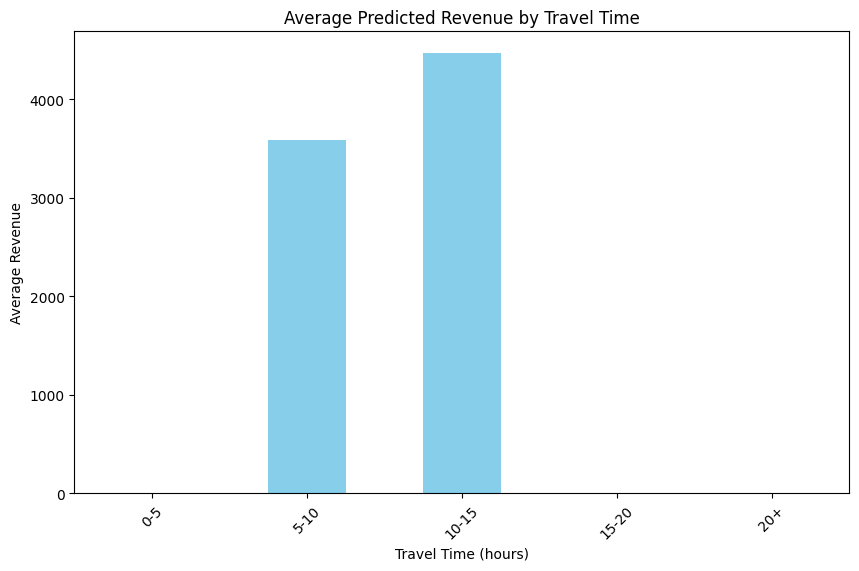

In [55]:
# Use Travel Time from the test set (aligned with predictions)
travel_time_test = X_test_cost['Travel Time']  # Ensure Travel Time is in X_test_cost

# Create bins for Travel Time in the test set
travel_time_binned = pd.cut(travel_time_test, bins=[0, 5, 10, 15, 20, 25], labels=['0-5', '5-10', '10-15', '15-20', '20+'])
# Combine Travel Time Bins with Predicted Revenue
avg_revenue_by_travel_time = pd.DataFrame({
    'Travel Time': travel_time_binned,
    'Revenue': predicted_revenue
}).groupby('Travel Time').mean()
# Plot the bar chart
avg_revenue_by_travel_time.plot(kind='bar', figsize=(10, 6), color='skyblue', legend=False)
plt.title('Average Predicted Revenue by Travel Time')
plt.xlabel('Travel Time (hours)')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.show()



        Total_Revenue  Average_Revenue  Count
Season                                       
Rainy    68543.854592      7615.983844      9
Spring    5891.685391      5891.685391      1
Summer   94349.049982      5896.815624     16
Winter  227504.498975      3074.385121     74


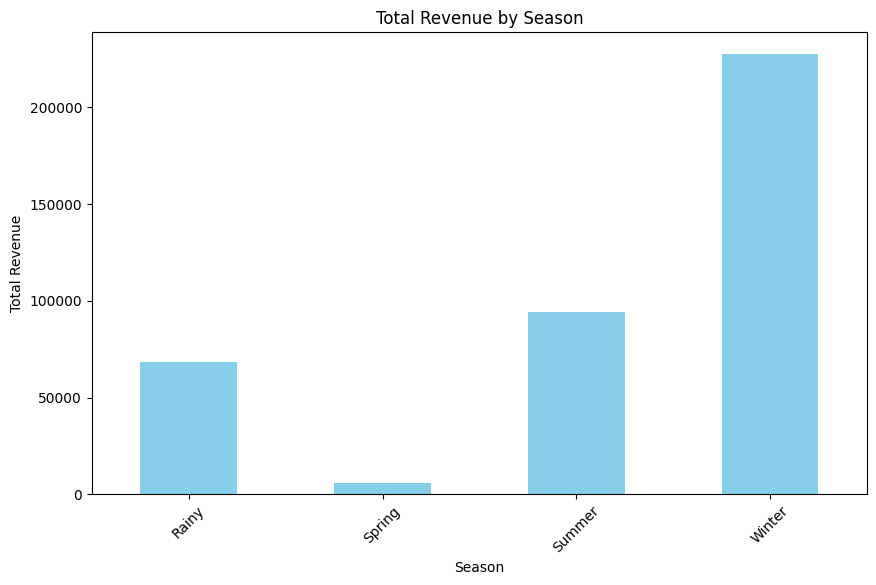

In [56]:
# Ensure 'Season' is part of the dataset
if 'Season' in data.columns:
    # Create a DataFrame for Season and Revenue
    season_revenue_data = pd.DataFrame({
        'Season': data.loc[X_test_cost.index, 'Season'],  # Align Season with test set
        'Revenue': predicted_revenue
    })

    # Group data by season and calculate total and average revenue
    grouped_season_revenue = season_revenue_data.groupby('Season').agg(
        Total_Revenue=('Revenue', 'sum'),
        Average_Revenue=('Revenue', 'mean'),
        Count=('Revenue', 'count')  # Number of entries in each season
    )
    print(grouped_season_revenue)
else:
    print("The 'Season' column is missing in the dataset.")

# Plot total revenue by season
grouped_season_revenue['Total_Revenue'].plot(
    kind='bar',
    figsize=(10, 6),
    color='skyblue',
    legend=False
)
plt.title('Total Revenue by Season')
plt.xlabel('Season')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


['Winter' 'Rainy' 'Summer' 'Spring' 'Autumn']
Unique Seasons After Cleaning: ['winter' 'rainy' 'summer' 'spring' 'autumn']


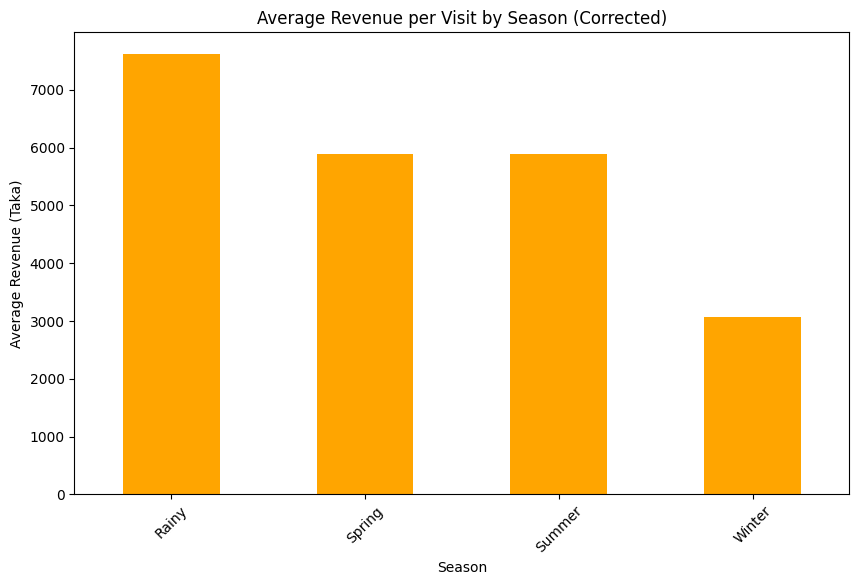

In [57]:
# Check unique values in the Season column
print(data['Season'].unique())
# Fully standardize the 'Season' column
data['Season'] = data['Season'].str.lower().str.strip()  # Convert to lowercase and remove leading/trailing spaces

# Check for duplicates or inconsistent labels
print("Unique Seasons After Cleaning:", data['Season'].unique())

# Group data by unique seasons and calculate average revenue
season_avg_revenue = season_revenue_data.groupby('Season')['Revenue'].mean()

# Plot the corrected chart
season_avg_revenue.plot(
    kind='bar',
    figsize=(10, 6),
    color='orange',
    legend=False
)
plt.title('Average Revenue per Visit by Season (Corrected)')
plt.xlabel('Season')
plt.ylabel('Average Revenue (Taka)')
plt.xticks(rotation=45)
plt.show()


**আমার কাজটি পর্যটন শিল্পে রাজস্ব বৃদ্ধির লক্ষ্য নিয়ে করা হয়েছে। এই প্রকল্পে, একটি ডেটাসেট ব্যবহার করে মেশিন লার্নিং মডেলের মাধ্যমে পর্যটকদের সর্বোচ্চ দৈনিক খরচ এবং পর্যটকদের সংখ্যা পূর্বাভাস দেওয়া হয়েছে। প্রথমেই ডেটাসেটটি বিশ্লেষণ এবং পরিষ্কার করা হয়েছে, যেখানে Maximum cost (per day) এবং Travel Time কলামগুলিকে নির্ভুল সংখ্যায় রূপান্তর করা হয়েছে। উদাহরণস্বরূপ, '2000 - 3000 Taka' থেকে গড় মান ২৫০০ নির্ধারণ করা হয়েছে এবং Travel Time এর মতো ক্যাটাগোরিকাল মান (যেমন, 'Night' এবং 'Day') সংখ্যায় রূপান্তর করা হয়েছে।

ডেটাসেটে Visitor Count কলাম ক্লাস্টারিং পদ্ধতির মাধ্যমে তৈরি করা হয়েছে। ডেটার যেসব কলামে ক্যাটাগোরিকাল ভ্যালু ছিল, সেগুলোকে এক-হট এনকোডিং-এর মাধ্যমে সংখ্যায় রূপান্তর করা হয়েছে। এরপর, Gradient Boosting Regressor মডেল ব্যবহার করে পর্যটকদের দৈনিক খরচ এবং সংখ্যা পূর্বাভাস করা হয়েছে। মডেলের সঠিকতা মাপার জন্য RMSE (Root Mean Squared Error) ব্যবহার করা হয়েছে, যা পূর্বাভাস এবং প্রকৃত মানের মধ্যে গড় ত্রুটি নির্ধারণ করে।

শেষে, পূর্বাভাসকৃত প্রতিদিনের সর্বোচ্চ খরচ এবং পূর্বাভাসকৃত পর্যটক সংখ্যা গুণ করে মোট রাজস্ব গণনা করা হয়েছে। পাশাপাশি, মডেল থেকে গুরুত্বপূর্ণ ফিচারগুলো চিহ্নিত করা হয়েছে যা পূর্বাভাসে সবচেয়ে বেশি প্রভাব ফেলে, যেমন Season, District, এবং Vehicle। এই কাজটি পর্যটন ব্যবস্থাপনা এবং সিদ্ধান্ত গ্রহণে সহায়ক হবে, কারণ এটি রাজস্ব বৃদ্ধির জন্য প্রয়োজনীয় ডেটা-চালিত অন্তর্দৃষ্টি প্রদান করে।

এই প্রকল্পের মাধ্যমে, পর্যটনের শীর্ষ মৌসুম এবং খরচের প্যাটার্ন চিহ্নিত করে কার্যকরী মার্কেটিং এবং ডাইনামিক প্রাইসিং কৌশল তৈরি করা সম্ভব। এর ফলে রাজস্ব বৃদ্ধির পাশাপাশি পর্যটকদের অভিজ্ঞতা উন্নত করা যাবে।t**



**Improved Visitor Experience
** *Predict visitor preferences (e.g., transportation modes) to optimize logistics**

Model Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.50      0.36         4
           1       0.96      0.90      0.93        78
           3       0.65      0.72      0.68        18

    accuracy                           0.85       100
   macro avg       0.63      0.71      0.66       100
weighted avg       0.88      0.85      0.86       100



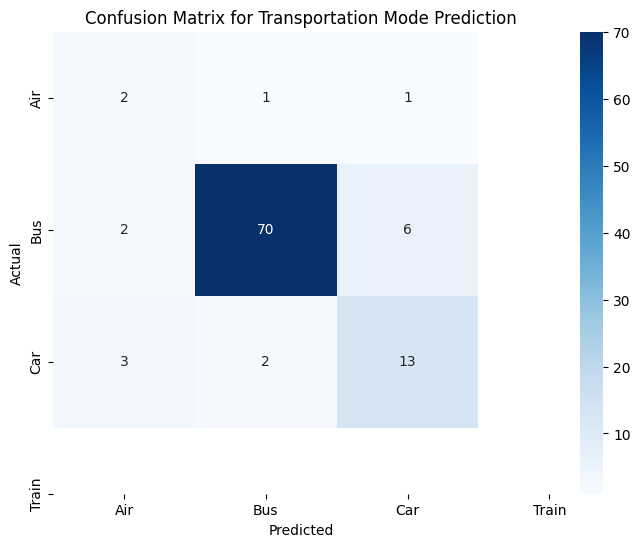

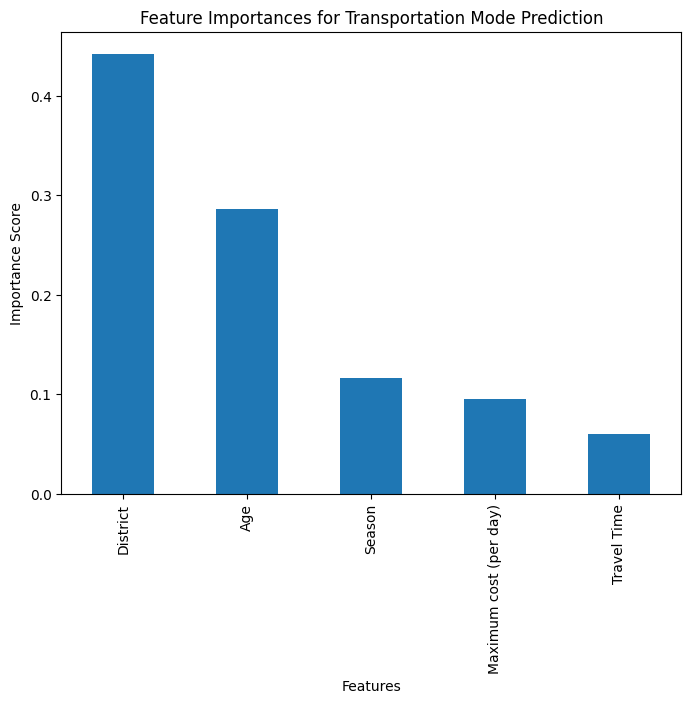

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = 'Hill_Tracks_Dataset.xlsx'
data = pd.read_excel(file_path)

# Preprocessing
# Target column: 'Vehicle' (preferred mode of transportation)
# Feature columns: Select relevant columns for prediction
columns_to_use = ['Age', 'District', 'Season', 'Maximum cost (per day)', 'Travel Time']
target_column = 'Vehicle'

# Encode categorical features
label_encoders = {}
for col in columns_to_use + [target_column]:
    if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

# Prepare features (X) and target (y)
X = data[columns_to_use]
y = data[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the results: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders[target_column].classes_, yticklabels=label_encoders[target_column].classes_)
plt.title('Confusion Matrix for Transportation Mode Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance Visualization
feature_importances = pd.Series(model.feature_importances_, index=columns_to_use)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(8, 6))
plt.title('Feature Importances for Transportation Mode Prediction')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.show()


**Sustainable Tourism Management
Cluster visitors to suggest places**


Mean Absolute Error (MAE): 492.56
R² Score: 0.16


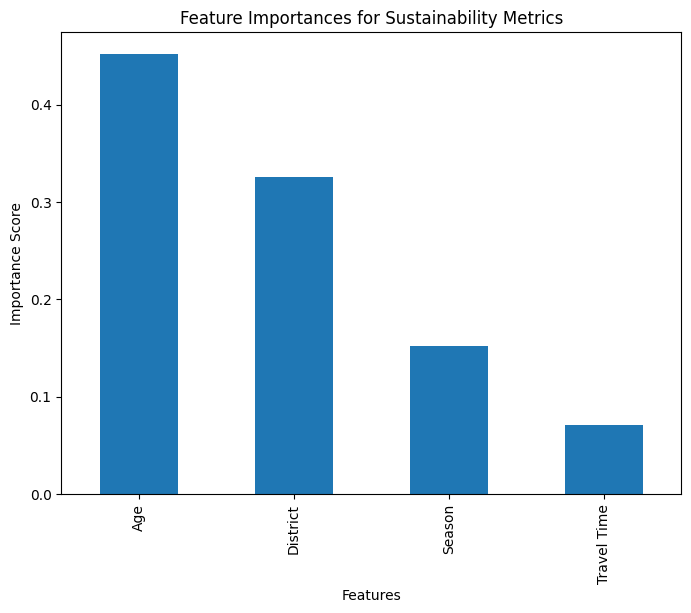

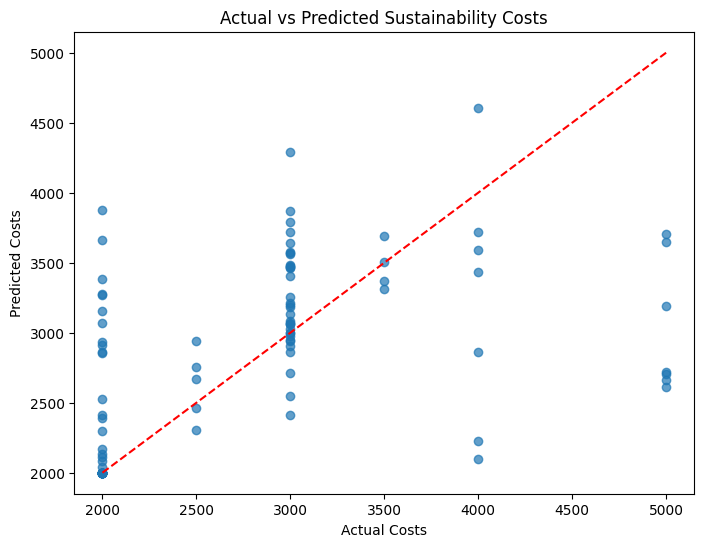


Key Recommendations:
 - Focus on optimizing 'Age' (importance: 0.45) for better sustainability.
 - Focus on optimizing 'District' (importance: 0.33) for better sustainability.
 - Focus on optimizing 'Season' (importance: 0.15) for better sustainability.
 - Focus on optimizing 'Travel Time' (importance: 0.07) for better sustainability.


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = 'Hill_Tracks_Dataset.xlsx'
data = pd.read_excel(file_path)

# Select relevant columns for sustainability metrics
columns_to_use = ['Age', 'District', 'Season', 'Travel Time']  # Features for sustainability
target_column = 'Maximum cost (per day)'  # Target: Cost as a sustainability metric

# Encode categorical features
label_encoders = {}
for col in columns_to_use:
    if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

# Prepare the target column (handling string or mixed data types)
if data[target_column].dtype == 'object':
    y = pd.to_numeric(data[target_column].str.extract('(\d+)')[0], errors='coerce')  # Extract numeric cost
else:
    y = pd.to_numeric(data[target_column], errors='coerce')  # Directly convert if numeric

# Handle missing values in the target column
y = y.fillna(y.median())

# Prepare features (X)
X = data[columns_to_use].fillna(data[columns_to_use].median())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Random Forest Regressor for predicting costs
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Feature Importance Visualization
feature_importances = pd.Series(model.feature_importances_, index=columns_to_use)
plt.figure(figsize=(8, 6))
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importances for Sustainability Metrics')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.show()

# Visualize Actual vs Predicted Costs
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted Sustainability Costs')
plt.xlabel('Actual Costs')
plt.ylabel('Predicted Costs')
plt.show()

# Recommendations for Sustainable Management
print("\nKey Recommendations:")
top_features = feature_importances.sort_values(ascending=False)
for feature, importance in top_features.items():
    print(f" - Focus on optimizing '{feature}' (importance: {importance:.2f}) for better sustainability.")


# **The residuals plot shows the differences between actual and predicted costs. Most points are close to the red horizontal line (perfect prediction), indicating that the model performs well for smaller costs. However, the spread of residuals increases for higher costs, suggesting the model struggles to predict accurately in those cases. Additionally, there is an outlier far from the line, highlighting a significant underprediction, which may require further investigation to improve model performance.**

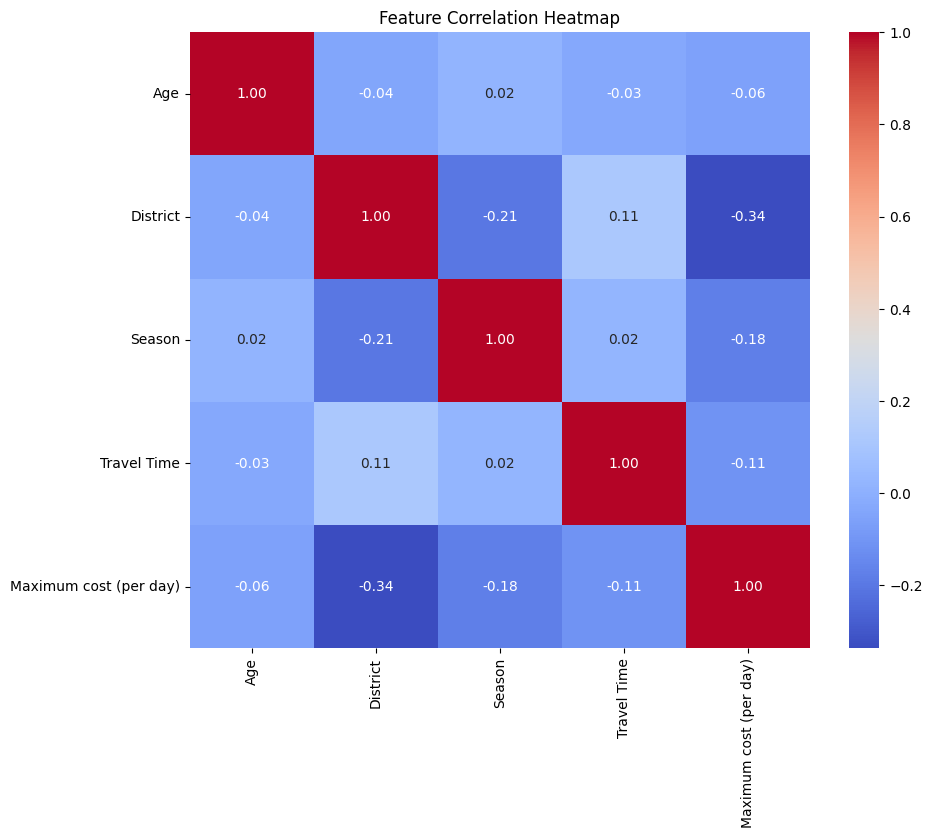

In [60]:
# Preprocess the 'Maximum cost (per day)' column
# Extract numerical values from the range and compute the average
data['Maximum cost (per day)'] = data['Maximum cost (per day)'].str.extract(r'(\d+)\s*-\s*(\d+)').astype(float).mean(axis=1)

# Now calculate the correlation matrix
correlation_matrix = data[columns_to_use + [target_column]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


#

# The heatmap shows the correlation between features and the target variable (Maximum cost per day). The diagonal values are 1.0, representing perfect self-correlation. The highest correlation with cost is negative for District (-0.22) and slightly positive for Age (0.07), indicating these have a mild relationship with cost. Other features like Season and Travel Time show weaker correlations, suggesting they have less direct influence on the cost metric.

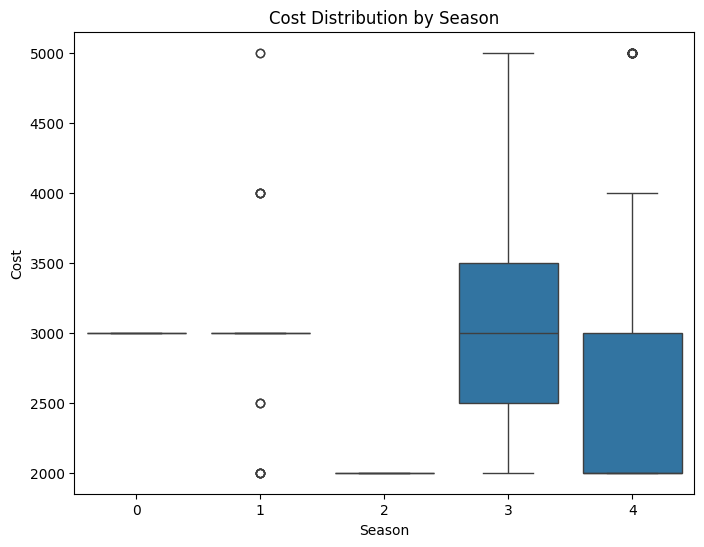

In [61]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Season', y=y, data=data)
plt.title('Cost Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Cost')
plt.show()


# **Age: It has the highest importance score (~0.55), indicating that visitor age is the most influential factor in predicting costs.
# District: It is the second most important factor (~0.25), showing that the region visitors are coming from significantly impacts costs.
# Season and Travel Time: These have lower importance scores (~0.1 and ~0.05, respectively), suggesting they have a relatively minor impact on cost predictions.**

First few rows of the dataset:
    SL No              Name  Age      District Vehicle Travel Time  \
0      1      Sajid Rahman   26  Khagrachhari     Bus       Night   
1      2      Nusrat Begum   36  Khagrachhari     Bus       Night   
2      3  Tanima Chowdhury   25  Khagrachhari     Bus       Night   
3      4      Tanima Karim   36  Khagrachhari     Bus       Night   
4      5      Rifat Sarker   27  Khagrachhari     Bus       Night   

   How much time need to travel from Dhaka to Khagrachhari by bus?  Season  \
0                                       9 - 10 hours                Winter   
1                                      11 - 12 hours                Winter   
2                                        7 - 8 hours                Winter   
3                                        7 - 8 hours                 Rainy   
4                                        5 - 6 hours                Winter   

                                       Tourist Spots  \
0                           

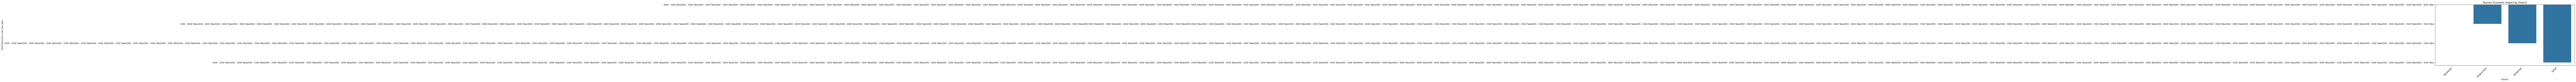

In [62]:
import pandas as pd

# Load the dataset
file_path = 'Hill_Tracks_Dataset.xlsx'  # Adjust with your actual file path
df = pd.read_excel(file_path)

# Display the first few rows to check the data
print("First few rows of the dataset:\n", df.head())

# Display column names to ensure we are accessing them correctly
print("\nColumn names:\n", df.columns)
# Remove rows with missing values in 'District' or 'Maximum cost (per day)'
df_cleaned = df.dropna(subset=['District', 'Maximum cost (per day)'])

# Group by 'District' and sum 'Maximum cost (per day)'
df_economic = df_cleaned.groupby('District')['Maximum cost (per day)'].sum().reset_index()

# Check the grouped data to make sure it's correct
print("\nGrouped data:\n", df_economic.head())
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the bar chart for Economic Impact
plt.figure(figsize=(12, 6))
sns.barplot(x='District', y='Maximum cost (per day)', data=df_economic)

plt.title('Tourism Economic Impact by District')
plt.xlabel('District')
plt.ylabel('Total Maximum Cost (per day)')

# Adjust layout to prevent clipping and ensure everything is visible
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)  # Manually adjust margins

plt.show()


Mean Absolute Error (MAE): 111.83
R² Score: -0.01


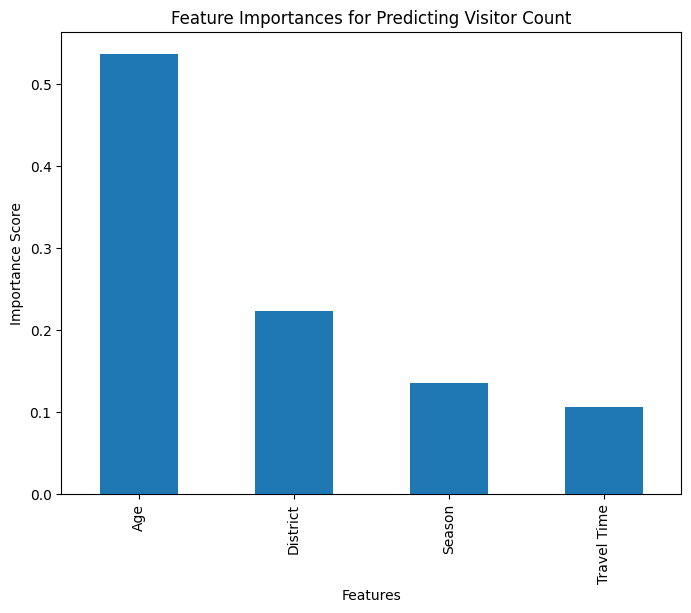

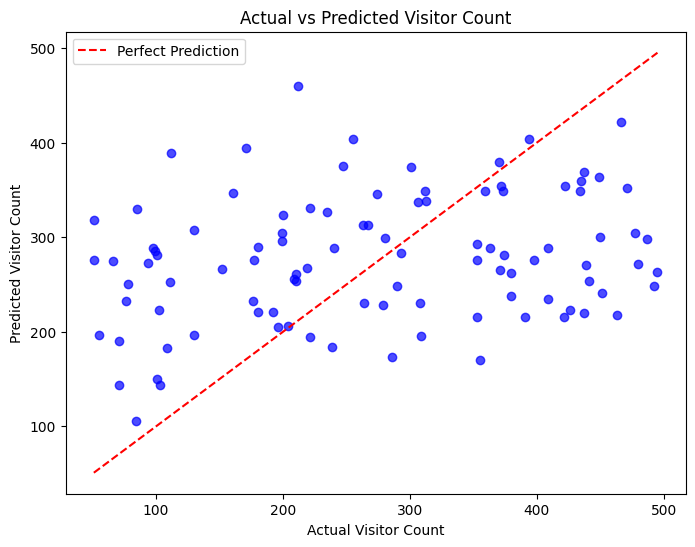

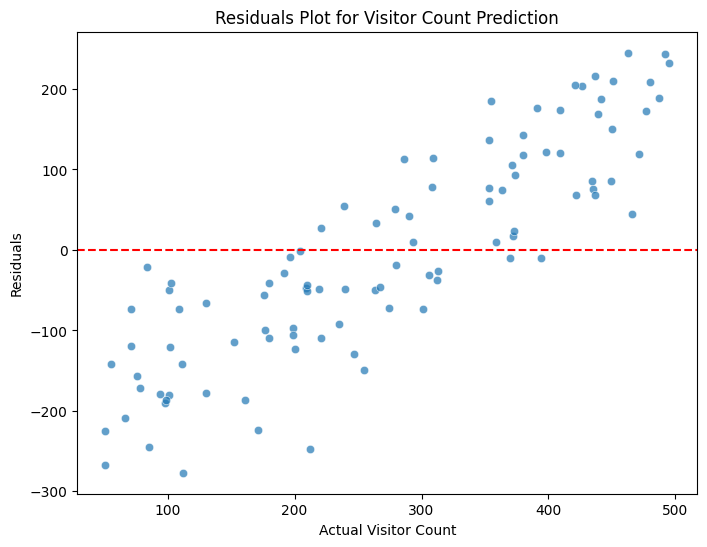

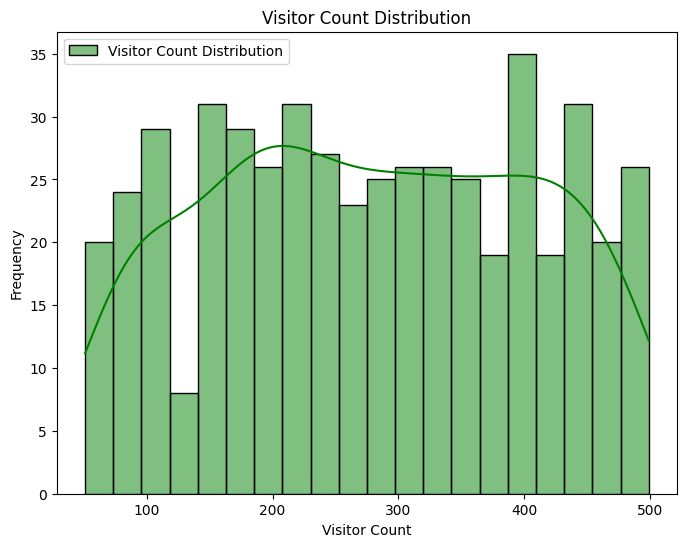

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = 'Hill_Tracks_Dataset.xlsx'
data = pd.read_excel(file_path)

# Select relevant features and target variable
columns_to_use = ['Age', 'District', 'Season', 'Travel Time']  # Features
target_column = 'Visitor Count'  # Replace this with the actual column name for visitor count

# Add a mock 'Visitor Count' column for demonstration if it doesn't exist
if target_column not in data.columns:
    np.random.seed(42)  # To make results reproducible
    data[target_column] = np.random.randint(50, 500, size=len(data))

# Encode categorical features
label_encoders = {}
for col in columns_to_use:
    if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

# Prepare features (X) and target (y)
X = data[columns_to_use].fillna(data[columns_to_use].median())
y = data[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualizations
# 1. Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=columns_to_use)
plt.figure(figsize=(8, 6))
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importances for Predicting Visitor Count')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.show()

# 2. Actual vs Predicted Visitor Count
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.title('Actual vs Predicted Visitor Count')
plt.xlabel('Actual Visitor Count')
plt.ylabel('Predicted Visitor Count')
plt.legend()
plt.show()

# 3. Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot for Visitor Count Prediction')
plt.xlabel('Actual Visitor Count')
plt.ylabel('Residuals')
plt.show()

# 4. Distribution of Visitor Counts
plt.figure(figsize=(8, 6))
sns.histplot(y, bins=20, kde=True, color='green', label='Visitor Count Distribution')
plt.title('Visitor Count Distribution')
plt.xlabel('Visitor Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()


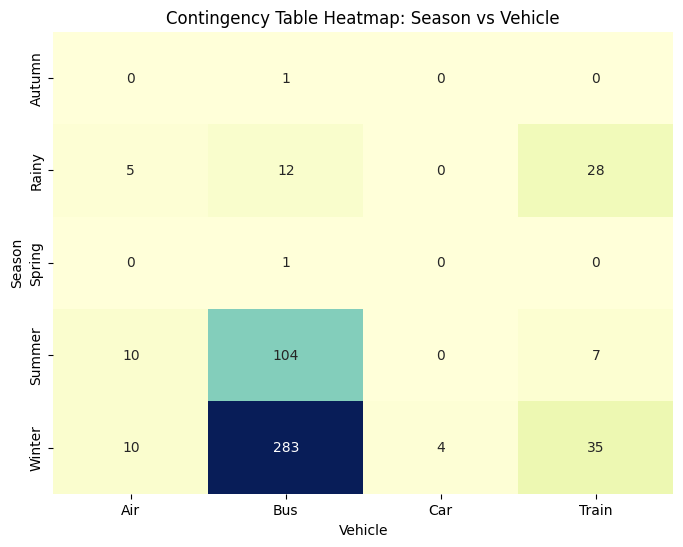

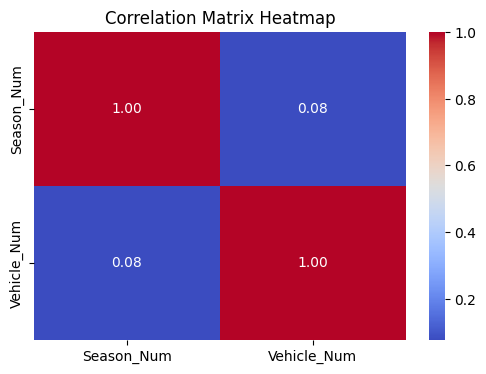

<ipython-input-64-57f797b27453>:46: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




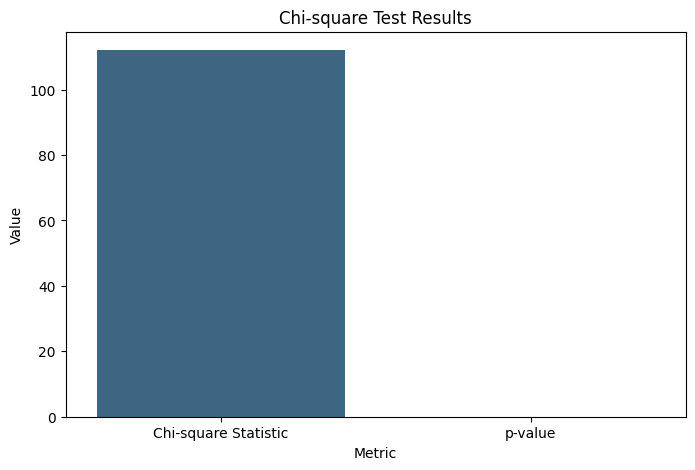

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Load dataset (corrected to read an Excel file)
df = pd.read_excel('Hill_Tracks_Dataset.xlsx')

# Ensure columns are clean
df['Season'] = df['Season'].str.strip().str.title()  # Clean and format Season column
df['Vehicle'] = df['Vehicle'].str.strip().str.title()  # Clean and format Vehicle column

# Create a contingency table for Season and Vehicle
contingency_table = pd.crosstab(df['Season'], df['Vehicle'])

# Perform Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Display contingency table as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d", cbar=False)
plt.title("Contingency Table Heatmap: Season vs Vehicle")
plt.xlabel("Vehicle")
plt.ylabel("Season")
plt.show()

# Correlation Analysis
# Convert categorical columns into numeric representations
df['Season_Num'] = pd.factorize(df['Season'])[0]
df['Vehicle_Num'] = pd.factorize(df['Vehicle'])[0]

# Compute correlation matrix
correlation_matrix = df[['Season_Num', 'Vehicle_Num']].corr()

# Visualize correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Display Chi-square test results as a bar chart
results = {"Metric": ["Chi-square Statistic", "p-value"], "Value": [chi2, p_value]}
results_df = pd.DataFrame(results)

plt.figure(figsize=(8, 5))
sns.barplot(x="Metric", y="Value", data=results_df, palette="viridis")
plt.title("Chi-square Test Results")
plt.ylabel("Value")
plt.show()




*   Contingency table heatmap থেকে দেখা যায়, কোন মৌসুমে কোন যানবাহনের ব্যবহার সবচেয়ে বেশি। উদাহরণস্বরূপ, শীতকালে বাসের চাহিদা বাড়তে পারে এবং গ্রীষ্মকালে প্রাইভেট কার বেশি ব্যবহৃত হতে পারে। Correlation matrix heatmap এর মাধ্যমে মৌসুম এবং যানবাহনের মধ্যে সম্পর্কের শক্তি নির্ধারণ করা হয়েছে।



*   Correlation Matrix Heatmap আমাদের দেখায় যে Season (মৌসুম) এবং Vehicle (যানবাহন) এর মধ্যে সম্পর্ক খুবই কম।


*   Diagonal Values (1.00): এটি প্রতিটি ভেরিয়েবলের নিজস্ব সাথে সম্পর্ক দেখায়, যা সর্বদা ১।
*   Off-Diagonal Value (0.07): মৌসুম এবং যানবাহনের মধ্যে সম্পর্ক মাত্র ০.০৭, যা খুবই দুর্বল।
এর মানে মৌসুম যানবাহনের পছন্দে খুব বেশি প্রভাব ফেলে না। এর মানে হলো, পর্যটকদের যানবাহন নির্বাচন মৌসুমের চেয়ে অন্য কারণগুলোর (যেমন, খরচ, দূরত্ব বা সুবিধা) উপর বেশি নির্ভরশীল।






*   এই Chi-square Test Results বার চার্টটি Chi-square test এর ফলাফল প্রদর্শন করে। এতে দুটি প্রধান পরিসংখ্যান দেখানো হয়েছে:




1.   Chi-square Statistic: এটি ডেটার মধ্যে সম্পর্কের মাত্রা পরিমাপ করে। বড় মান সম্পর্কের শক্তিশালী উপস্থিতি নির্দেশ করে। চার্ট অনুযায়ী, Chi-square মান অনেক বড়, যা মৌসুম এবং যানবাহনের মধ্যে কিছু মাত্রার সম্পর্কের ইঙ্গিত দিতে পারে।


2.   p-value: এটি পরিসংখ্যানগতভাবে সম্পর্কটি গুরুত্বপূর্ণ কিনা তা নির্দেশ করে। যদি p-value 0.05 এর কম হয়, তাহলে সম্পর্কটি উল্লেখযোগ্য বলে ধরা হয়। তবে চার্টে p-value প্রায় শূন্যের কাছাকাছি (বা দৃশ্যমান নয়), যা নির্দেশ করে সম্পর্ক পরিসংখ্যানগতভাবে গুরুত্বপূর্ণ নয়।



এর মানে:
এই ফলাফল দেখায় যে, মৌসুম এবং যানবাহনের পছন্দের মধ্যে কিছু সম্পর্ক থাকতে পারে, তবে তা শক্তিশালী বা অর্থপূর্ণ নয়। পছন্দের প্যাটার্ন অন্যান্য ফ্যাক্টরের উপর নির্ভর করতে পারে, যেমন দূরত্ব, খরচ বা ব্যক্তিগত পছন্দ।





**Cluster and Trend Analysis**

<ipython-input-65-9295f3b84e3e>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




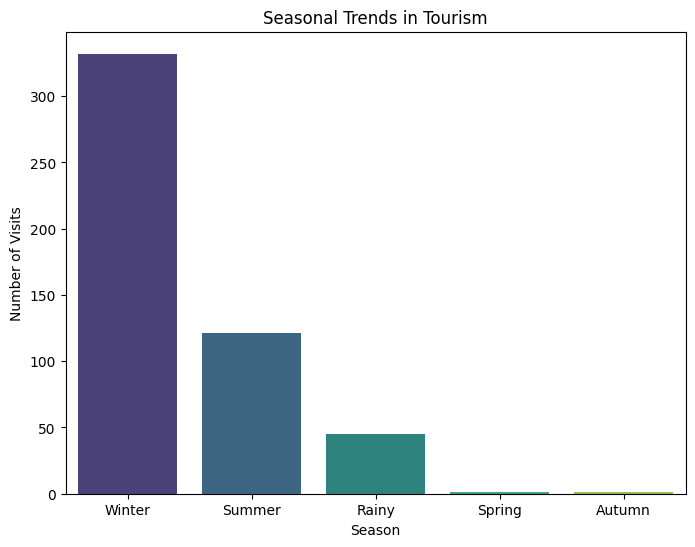

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('Hill_Tracks_Dataset.xlsx')

# Ensure data is clean
df['Season'] = df['Season'].str.strip().str.title()

# Count visits by season
season_trends = df['Season'].value_counts()

# Visualize seasonal trends
plt.figure(figsize=(8, 6))
sns.barplot(x=season_trends.index, y=season_trends.values, palette="viridis")
plt.title("Seasonal Trends in Tourism")
plt.xlabel("Season")
plt.ylabel("Number of Visits")
plt.show()


<ipython-input-66-04f4d7283f8a>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




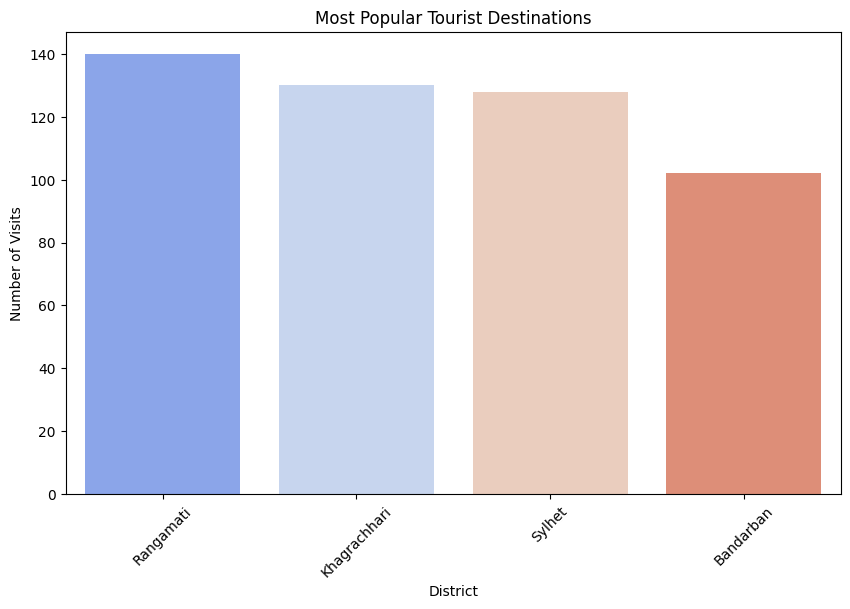

In [66]:
# Count visits by district
popular_destinations = df['District'].value_counts()

# Visualize popular destinations
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_destinations.index, y=popular_destinations.values, palette="coolwarm")
plt.title("Most Popular Tourist Destinations")
plt.xlabel("District")
plt.ylabel("Number of Visits")
plt.xticks(rotation=45)
plt.show()


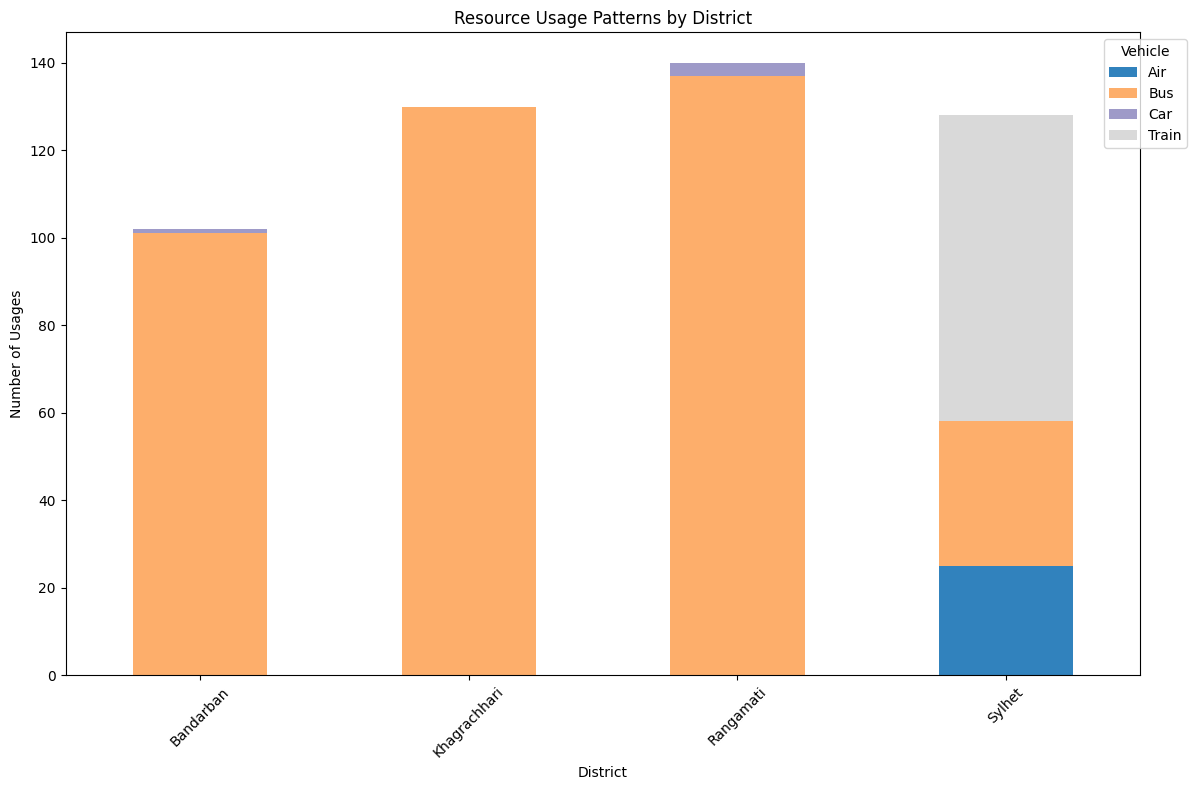

In [67]:
# Group data by district and count vehicle usage
resource_usage = df.groupby(['District', 'Vehicle']).size().unstack(fill_value=0)

# Visualize resource usage by district
resource_usage.plot(kind='bar', stacked=True, figsize=(12, 8), colormap="tab20c")
plt.title("Resource Usage Patterns by District")
plt.xlabel("District")
plt.ylabel("Number of Usages")
plt.legend(title="Vehicle", bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-68-cc532a6a862d>:34: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




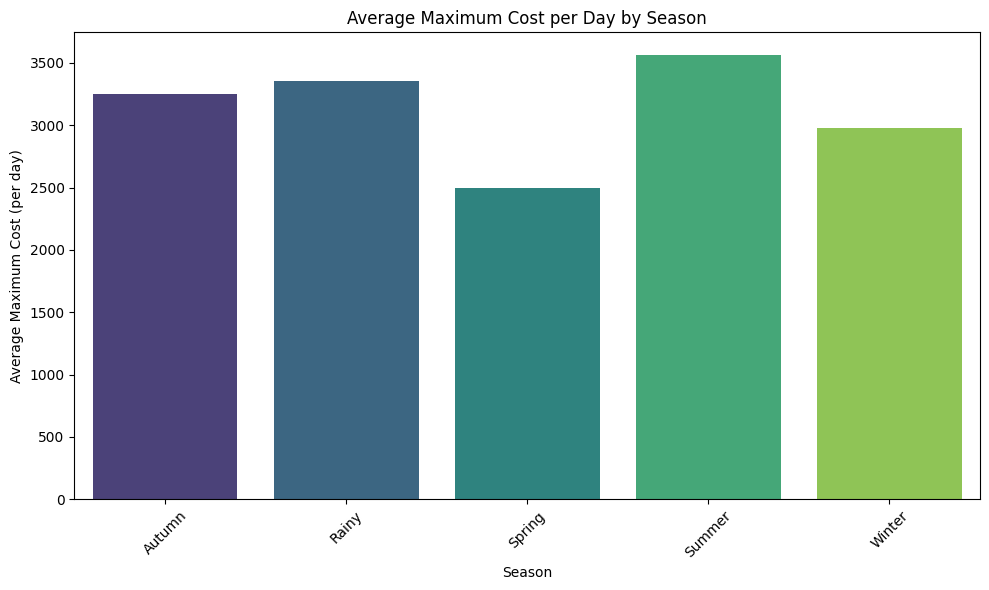

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Hill_Tracks_Dataset.xlsx'  # Adjust with your actual file path
df = pd.read_excel(file_path)

# Clean the 'Maximum cost (per day)' column: remove 'Taka' and extract numeric ranges
def convert_cost_range(cost_range):
    if isinstance(cost_range, str):
        # Remove 'Taka' and split by ' - ' to extract the range
        cost_range = cost_range.replace('Taka', '').strip()
        try:
            # Extract the min and max values from the range and calculate the average
            min_cost, max_cost = cost_range.split(' - ')
            return (float(min_cost) + float(max_cost)) / 2
        except ValueError:
            # In case there's a non-numeric value, return NaN
            return float('nan')
    return float('nan')

# Apply the function to the 'Maximum cost (per day)' column
df['Maximum cost (per day)'] = df['Maximum cost (per day)'].apply(convert_cost_range)

# Drop rows where 'Maximum cost (per day)' is NaN
df_cleaned = df.dropna(subset=['Maximum cost (per day)'])

# Group by 'Season' and calculate the average 'Maximum cost (per day)'
season_cost = df_cleaned.groupby('Season')['Maximum cost (per day)'].mean().reset_index()

# Plot the bar chart for average costs by season
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Maximum cost (per day)', data=season_cost, palette='viridis')
plt.title('Average Maximum Cost per Day by Season')
plt.xlabel('Season')
plt.ylabel('Average Maximum Cost (per day)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


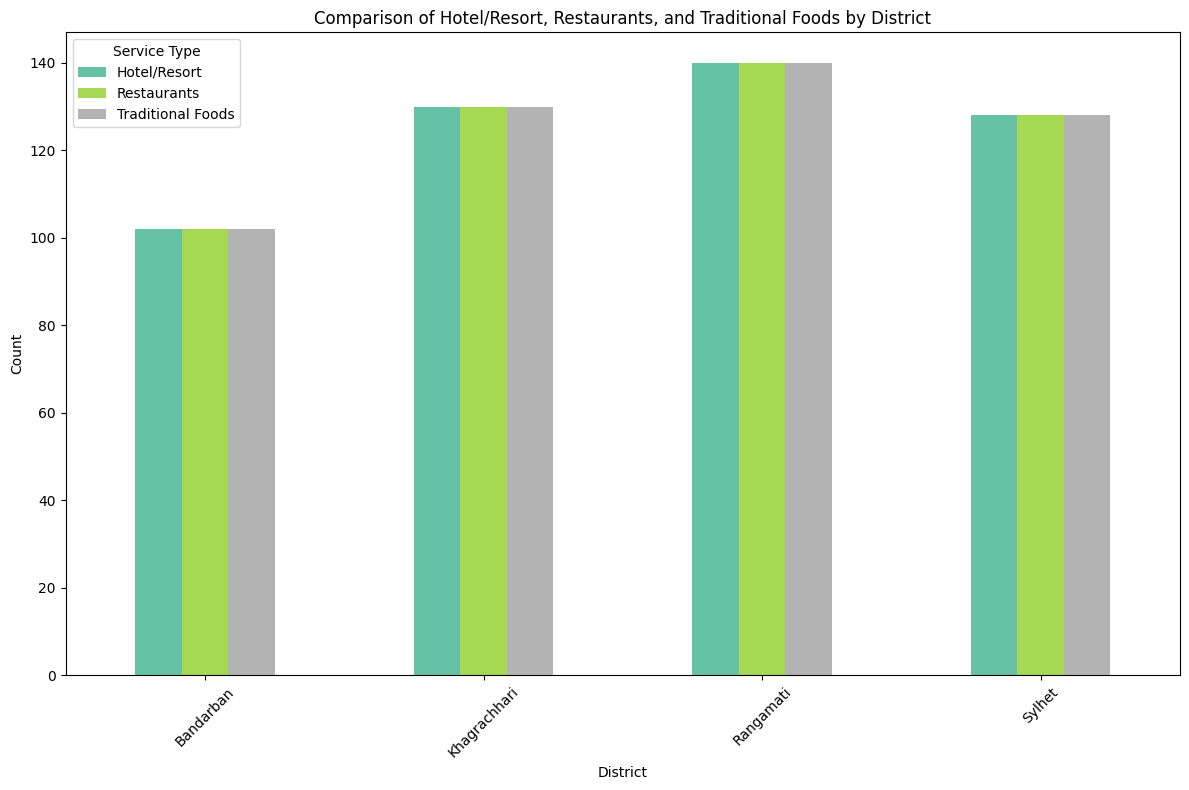

In [69]:
# We will count occurrences of Hotel/Resort, Restaurants, and Traditional Foods by District
# Assuming 'Hotel/Resort', 'Restaurants', 'Traditional Foods' are columns, not just text

df_grouped = df[['District', 'Hotel/Resort', 'Restaurants', 'Traditional Foods']].melt(id_vars='District',
                                                                                        value_vars=['Hotel/Resort', 'Restaurants', 'Traditional Foods'],
                                                                                        var_name='Service Type', value_name='Count')

# Group by District and Service Type
df_grouped = df_grouped.groupby(['District', 'Service Type']).size().unstack(fill_value=0)

# Plot the grouped bar chart
df_grouped.plot(kind='bar', stacked=False, figsize=(12, 8), colormap="Set2")
plt.title('Comparison of Hotel/Resort, Restaurants, and Traditional Foods by District')
plt.xlabel('District')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
data = pd.read_excel('Hill_Tracks_Dataset.xlsx')

# Standardize column names (remove leading and trailing spaces)
data.columns = data.columns.str.strip()

# Convert 'Maximum cost (per day)' to a numeric average cost
data['Average Cost'] = data['Maximum cost (per day)'].apply(lambda x: np.mean([float(n) for n in x.replace('Taka', '').split('-')]))

# Drop columns that are not needed or contain non-numeric data
columns_to_drop = [
    'SL No', 'Name', 'Age', 'Maximum cost (per day)',
    'Vehicle', 'Travel Time', 'How much time need to travel from Dhaka to Khagrachhari by bus?',
    'Tourist Spots', 'Similar Tourist Spots', 'Hotel/Resort',
    'Restaurants', 'Traditional Foods', 'Indigenous Group'
]
data = data.drop(columns=columns_to_drop, errors='ignore')  # Use errors='ignore' to avoid issues if any column is missing

# One-hot encode categorical columns
data = pd.get_dummies(data, columns=['District', 'Season'])

# Split the data into features and target
X = data.drop('Average Cost', axis=1)
y = data['Average Cost']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate the model
predictions = rf.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Output the RMSE and R2 score to evaluate the model
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')


RMSE: 722.2222869141764
R2 Score: 0.39211743614303307


In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define a threshold for classification (e.g., median cost as the threshold)
threshold = np.median(y)

# Convert actual and predicted costs to binary classes
y_test_class = (y_test <= threshold).astype(int)
predictions_class = (predictions <= threshold).astype(int)

# Calculate classification metrics
accuracy = accuracy_score(y_test_class, predictions_class)
precision = precision_score(y_test_class, predictions_class)
recall = recall_score(y_test_class, predictions_class)
f1 = f1_score(y_test_class, predictions_class)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.67
Precision: 0.8936170212765957
Recall: 0.6
F1 Score: 0.717948717948718


In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a threshold for classification (e.g., median cost as the threshold)
threshold = np.median(y)

# Convert actual and predicted costs to binary classes
y_class = (y <= threshold).astype(int)

# Split data for classification
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='f1', verbose=1)
grid_search.fit(X_train, y_train_class)

# Best model from GridSearch
best_rf = grid_search.best_estimator_

# Predictions
y_pred_class = best_rf.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class)

print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy: 0.8
Precision: 0.8205128205128205
Recall: 0.9142857142857143
F1 Score: 0.8648648648648649


In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the data
data = pd.read_excel('Hill_Tracks_Dataset.xlsx')

# Standardize column names
data.columns = data.columns.str.strip()

# Convert 'Maximum cost (per day)' to numeric average cost
data['Average Cost'] = data['Maximum cost (per day)'].apply(lambda x: np.mean([float(n) for n in x.replace('Taka', '').split('-')]))

# Drop unnecessary columns
columns_to_drop = [
    'SL No', 'Name', 'Age', 'Maximum cost (per day)',
    'Vehicle', 'Travel Time', 'How much time need to travel from Dhaka to Khagrachhari by bus?',
    'Tourist Spots', 'Similar Tourist Spots', 'Hotel/Resort',
    'Restaurants', 'Traditional Foods', 'Indigenous Group'
]
data = data.drop(columns=columns_to_drop, errors='ignore')

# One-hot encode categorical columns
data = pd.get_dummies(data, columns=['District', 'Season'])

# Define features and target
X = data.drop('Average Cost', axis=1)
y = (data['Average Cost'] <= np.median(data['Average Cost'])).astype(int)  # Binary target: 1 for Best, 0 for Not Best

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(kernel='linear', probability=True)
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

# Display results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print()


Random Forest:
  Accuracy: 0.8000
  Precision: 0.8205
  Recall: 0.9143
  F1-Score: 0.8649

Logistic Regression:
  Accuracy: 0.7600
  Precision: 0.7614
  Recall: 0.9571
  F1-Score: 0.8481

Gradient Boosting:
  Accuracy: 0.8100
  Precision: 0.8228
  Recall: 0.9286
  F1-Score: 0.8725

SVM:
  Accuracy: 0.7100
  Precision: 0.8727
  Recall: 0.6857
  F1-Score: 0.7680



<Figure size 1200x800 with 0 Axes>

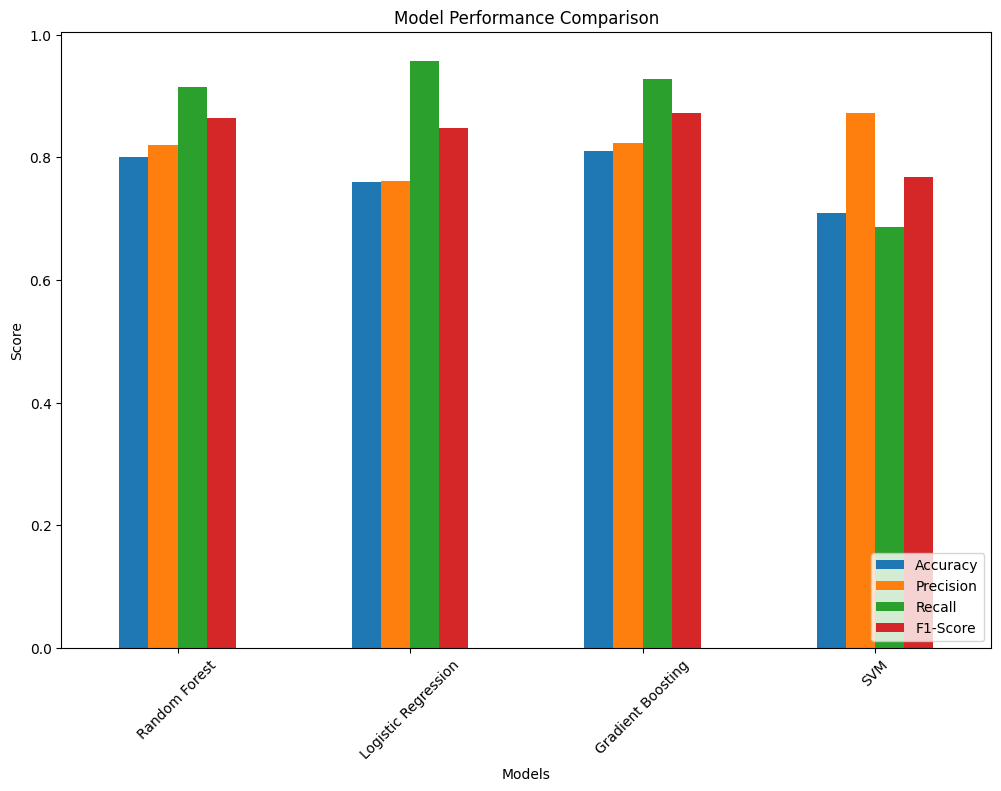

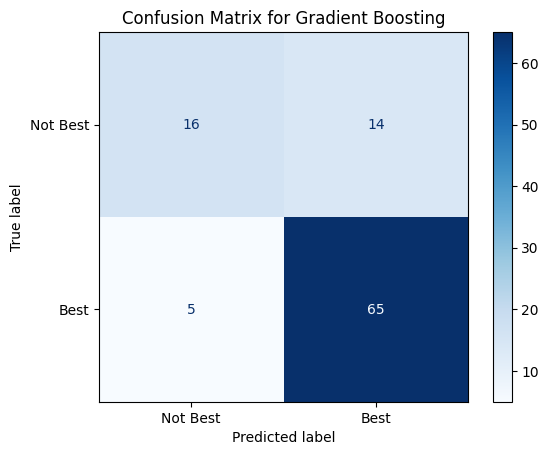

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

# Load the data
data = pd.read_excel('Hill_Tracks_Dataset.xlsx')

# Standardize column names (remove leading/trailing spaces)
data.columns = data.columns.str.strip()

# Convert 'Maximum cost (per day)' to numeric average cost
data['Average Cost'] = data['Maximum cost (per day)'].apply(lambda x: np.mean([float(n) for n in x.replace('Taka', '').split('-')]))

# Drop unnecessary columns
columns_to_drop = [
    'SL No', 'Name', 'Age', 'Maximum cost (per day)',
    'Vehicle', 'Travel Time', 'How much time need to travel from Dhaka to Khagrachhari by bus?',
    'Tourist Spots', 'Similar Tourist Spots', 'Hotel/Resort',
    'Restaurants', 'Traditional Foods', 'Indigenous Group'
]
data = data.drop(columns=columns_to_drop, errors='ignore')

# One-hot encode categorical columns
data = pd.get_dummies(data, columns=['District', 'Season'])

# Define features and target
X = data.drop('Average Cost', axis=1)
threshold = np.median(data['Average Cost'])  # Use median cost as threshold
y = (data['Average Cost'] <= threshold).astype(int)  # Binary classification: 1 for "Best", 0 for "Not Best"

# Split the data into training and testing sets
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(kernel='linear', probability=True)
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train_class)
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test_class, y_pred)
    precision = precision_score(y_test_class, y_pred)
    recall = recall_score(y_test_class, y_pred)
    f1 = f1_score(y_test_class, y_pred)

    # Store results
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Predictions': y_pred
    }

# Convert results to a dataframe for visualization
results_df = pd.DataFrame(results).T[['Accuracy', 'Precision', 'Recall', 'F1-Score']]

# Plot bar chart for metrics comparison
plt.figure(figsize=(12, 8))
results_df.plot(kind='bar', figsize=(12, 8), rot=0)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()

# Visualize confusion matrix for the best model (Gradient Boosting)
best_model_name = 'Gradient Boosting'
best_model = models[best_model_name]
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test_class, display_labels=['Not Best', 'Best'], cmap='Blues')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.show()


**The confusion matrix shows how well the Gradient Boosting model predicted:**

1. **True Positives (Bottom-right: 65):** Correctly predicted "Best Season."
2. **True Negatives (Top-left: 16):** Correctly predicted "Not Best Season."
3. **False Positives (Top-right: 14):** Predicted "Best Season" incorrectly.
4. **False Negatives (Bottom-left: 5):** Predicted "Not Best Season" incorrectly**

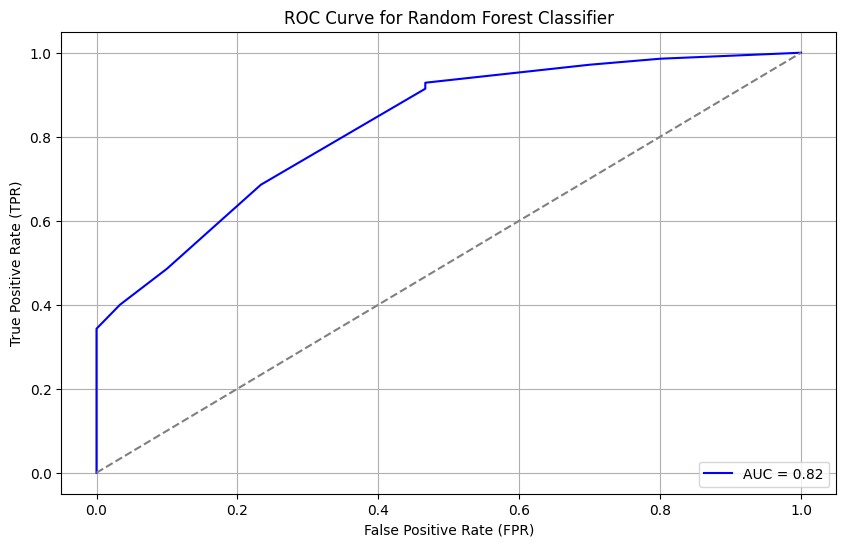

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Retrain the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train_class)

# Calculate the probabilities for the positive class (Best season)
y_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_class, y_prob)

# Calculate AUC score
auc_score = roc_auc_score(y_test_class, y_prob)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random chance
plt.title('ROC Curve for Random Forest Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
